In [2]:
import SimDAT2D.SimDAT2D_MDK as sim
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import IsoDAT2D.IsoDAT2D_MDK as iso
from PIL import Image
import pyFAI, fabio
from pyFAI.gui import jupyter
import pyFAI
import os
import matplotlib.pyplot as plt
from tifffile import imread
from SimDAT2D import masking
import pyFAI.azimuthalIntegrator as AI
from scipy.ndimage import shift
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score

In [3]:
# to reload iterative changes to the code, uncomment the following lines
os.chdir(r'C:\Users\kelleymarisa\PythonProjects\ProcessDAT\ProcessDAT')
import importlib
pd = importlib.reload(sim)

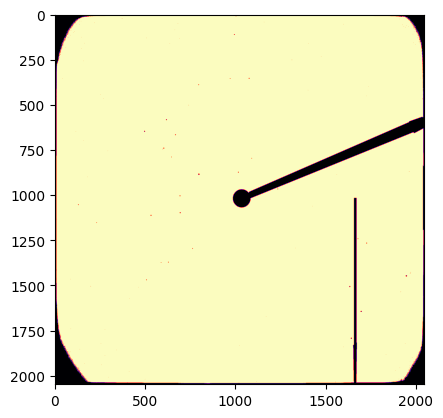

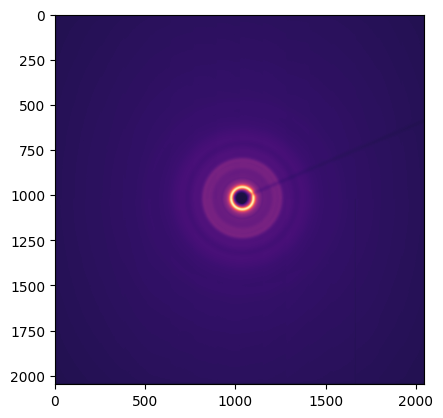

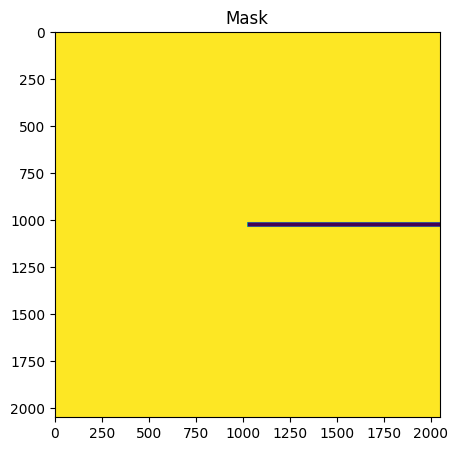

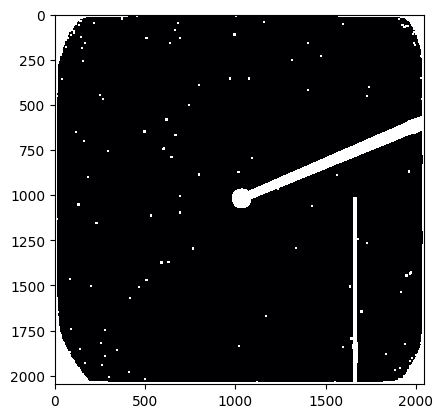

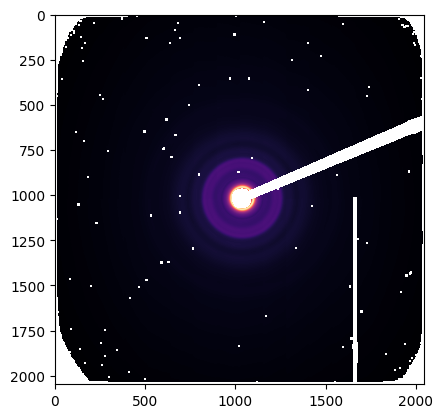

In [4]:
tm_mask_path = r'C:\Users\kelleymarisa\UFL Dropbox\Marisa Kelley\DNA&MDKShare\copy_data_isodat\perkin\masks\tm_mask_whole.npy'
tm_mask = np.load(tm_mask_path)
tm_inverted_mask = 1 - tm_mask
plt.imshow(tm_inverted_mask, cmap = 'magma')
plt.show()

tm_cryst_C_GST_SiO2 = r'C:\Users\kelleymarisa\UFL Dropbox\Marisa Kelley\DNA&MDKShare\copy_data_isodat\perkin\da_8_cryst_C_GST_SiO2-00008\da_8_cryst_C_GST_SiO2-00008.tiff'
tm_cryst_C_GST_SiO2_image = imread(tm_cryst_C_GST_SiO2)
plt.imshow(tm_cryst_C_GST_SiO2_image, cmap = 'magma')
plt.show()

#create integration mask
mask_12 = sim.create_mask_for_tiff(tm_cryst_C_GST_SiO2, 12)


tm_mask_with_nan = tm_inverted_mask.astype(float)
tm_mask_with_nan[tm_inverted_mask == 0] = np.nan
plt.imshow(tm_mask_with_nan, cmap = 'magma')
plt.show()

tm_combined_image = tm_cryst_C_GST_SiO2_image + tm_mask_with_nan
plt.imshow(tm_combined_image, cmap = 'magma')
plt.show() 

Found NaN values in original image, replacing with 0
Cleaned image:
Shape: (2048, 2048)
Min value: 0.0
Max value: 12681062.0
Number of non-zero pixels: 3996053

Shifted image:
Shape: (2048, 2048)
Min value: 0.0
Max value: 12681062.0
Number of non-zero pixels: 3995326


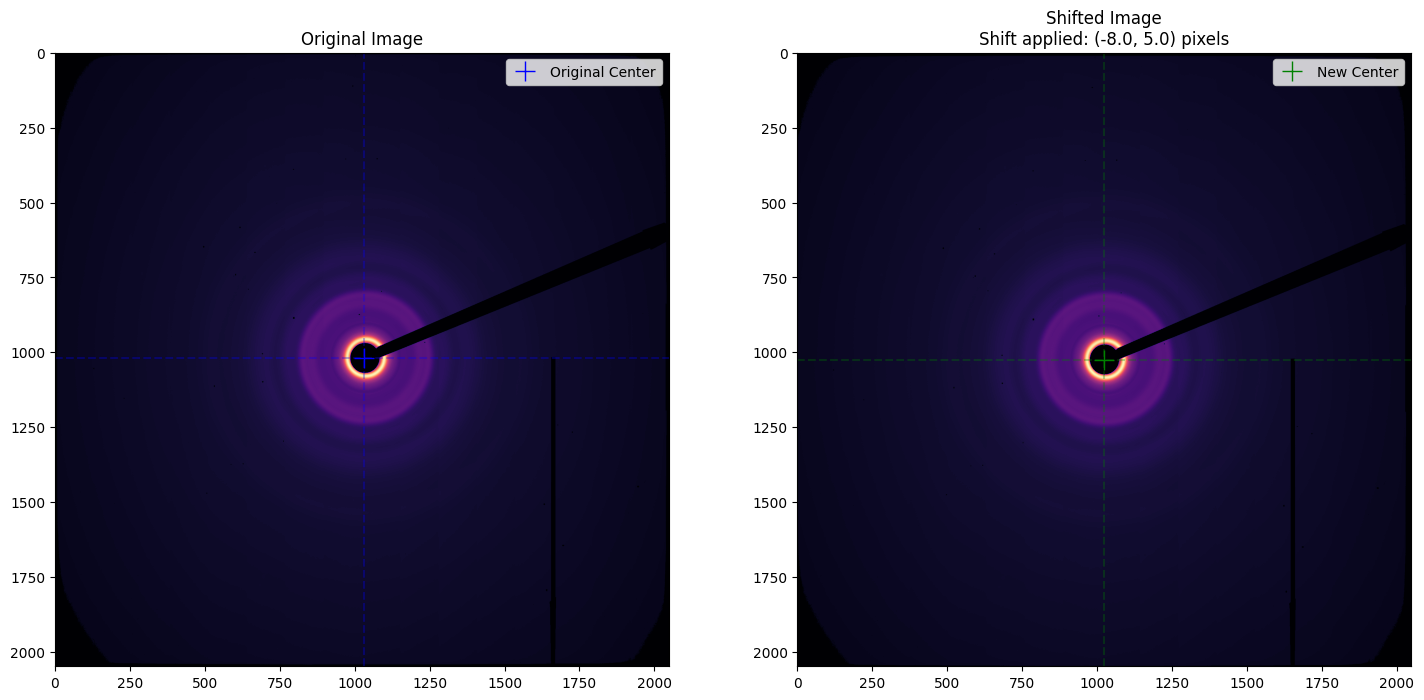

Shift applied: dx=-8.0, dy=5.0 pixels
(2048, 2048)


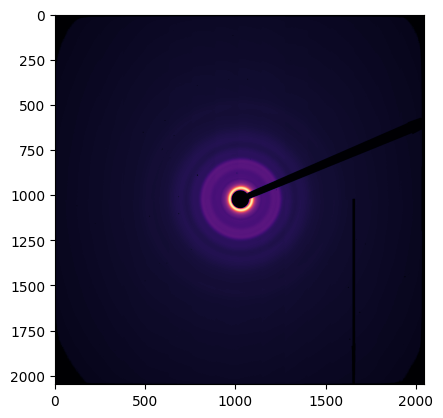

In [5]:
# Define current beam center
current_center = (1032, 1019)  
# Apply the shift
tm_shifted_image, shift_applied = sim.center_shift_image(image=tm_combined_image, current_center=current_center, target_center=(1024, 1024))
print(tm_combined_image.shape)
plt.imshow(tm_shifted_image, cmap = 'magma')
plt.show()

(2048, 2048)


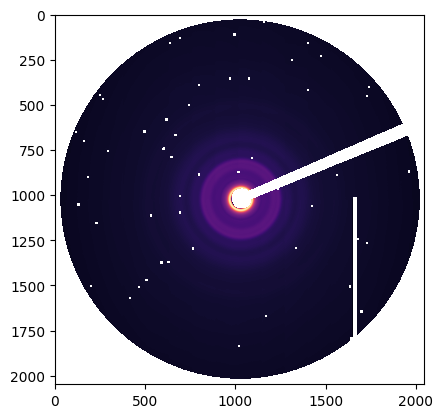

(2048, 2048)


In [6]:
print(tm_shifted_image.shape)
tm_shifted_image_masked = tm_shifted_image + + tm_mask_with_nan
tm_circle = sim.mask_circle_nan_edge(tm_shifted_image_masked, radius = 1000, center = (1024, 1024))
plt.imshow(tm_circle, cmap = 'magma')
plt.show()
print(tm_circle.shape)

Starting rotate_and_integrate function
Will show visualizations every 4 steps

Processing angle 1/72: 0.000 degrees


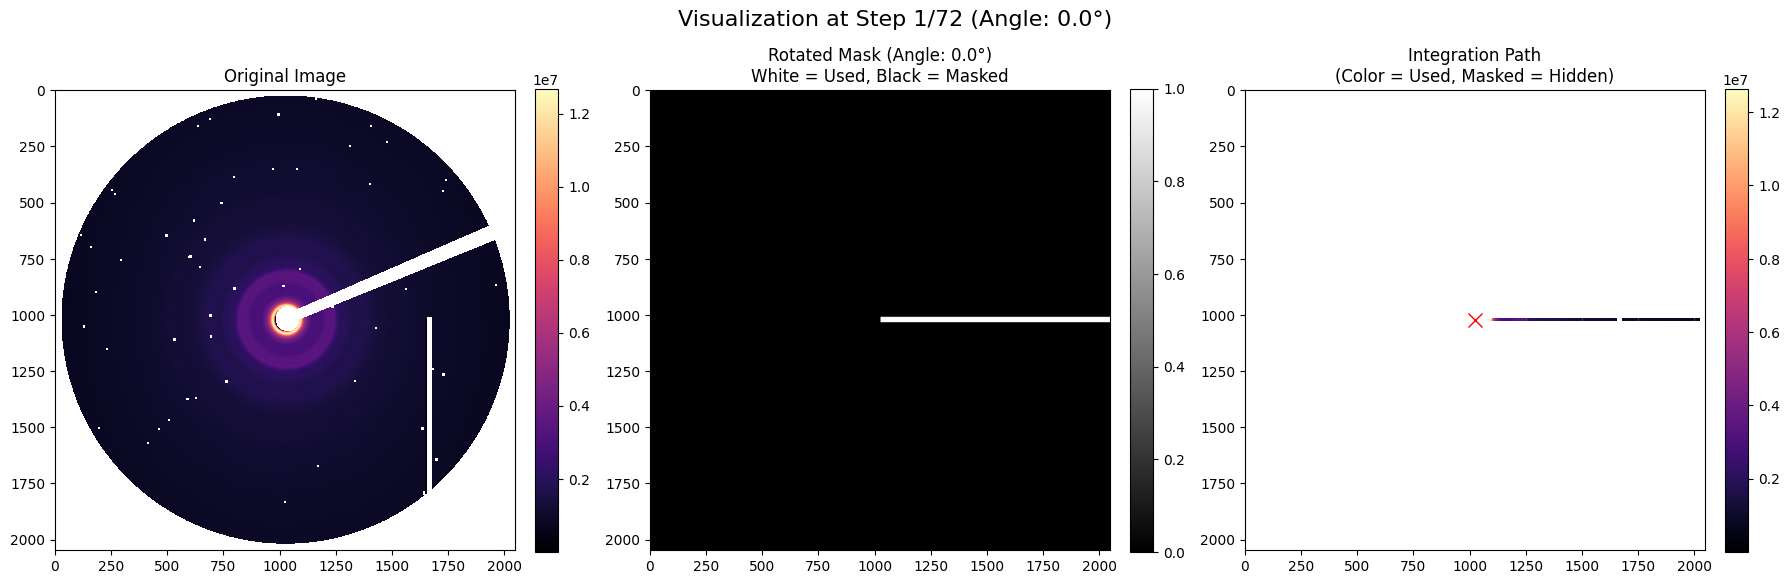


Processing angle 2/72: 5.000 degrees

Processing angle 3/72: 10.000 degrees

Processing angle 4/72: 15.000 degrees

Processing angle 5/72: 20.000 degrees


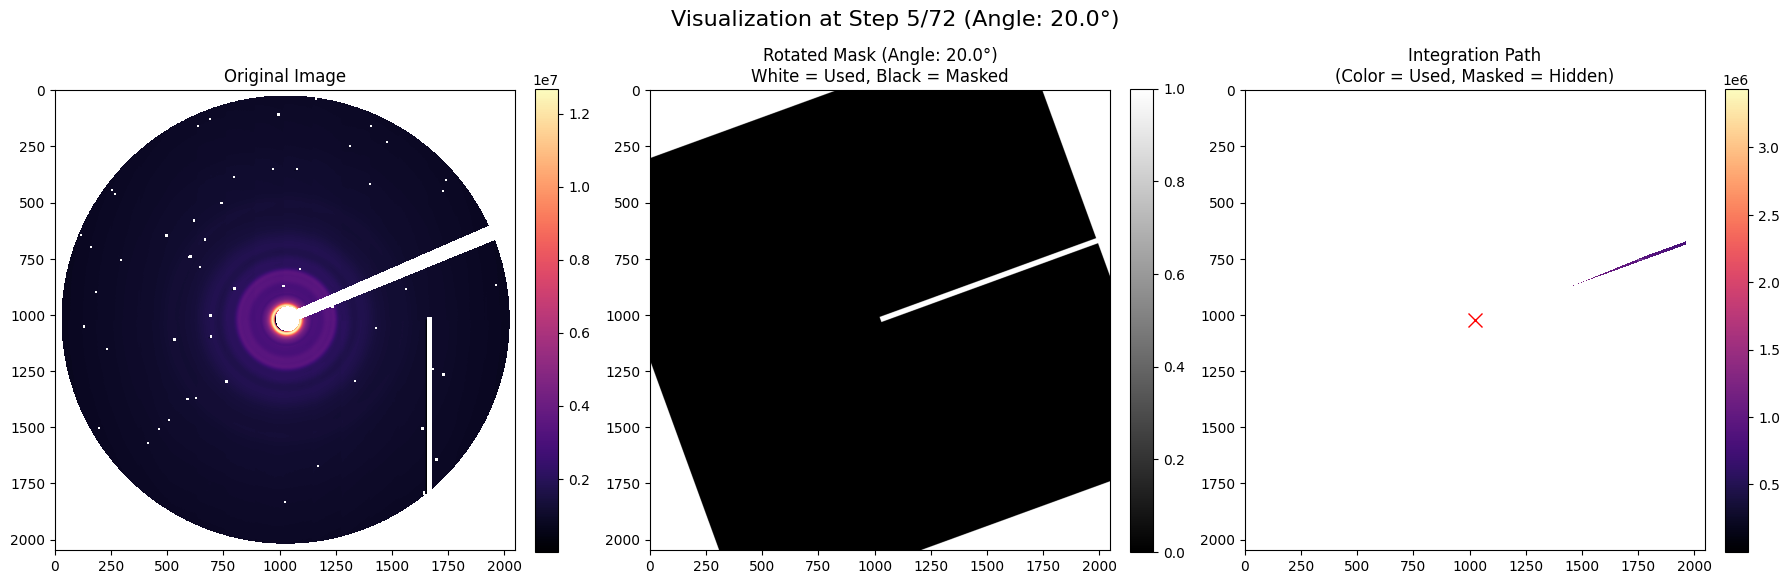


Processing angle 6/72: 25.000 degrees

Processing angle 7/72: 30.000 degrees
Completed 7/72 integrations (9.7%)

Processing angle 8/72: 35.000 degrees

Processing angle 9/72: 40.000 degrees


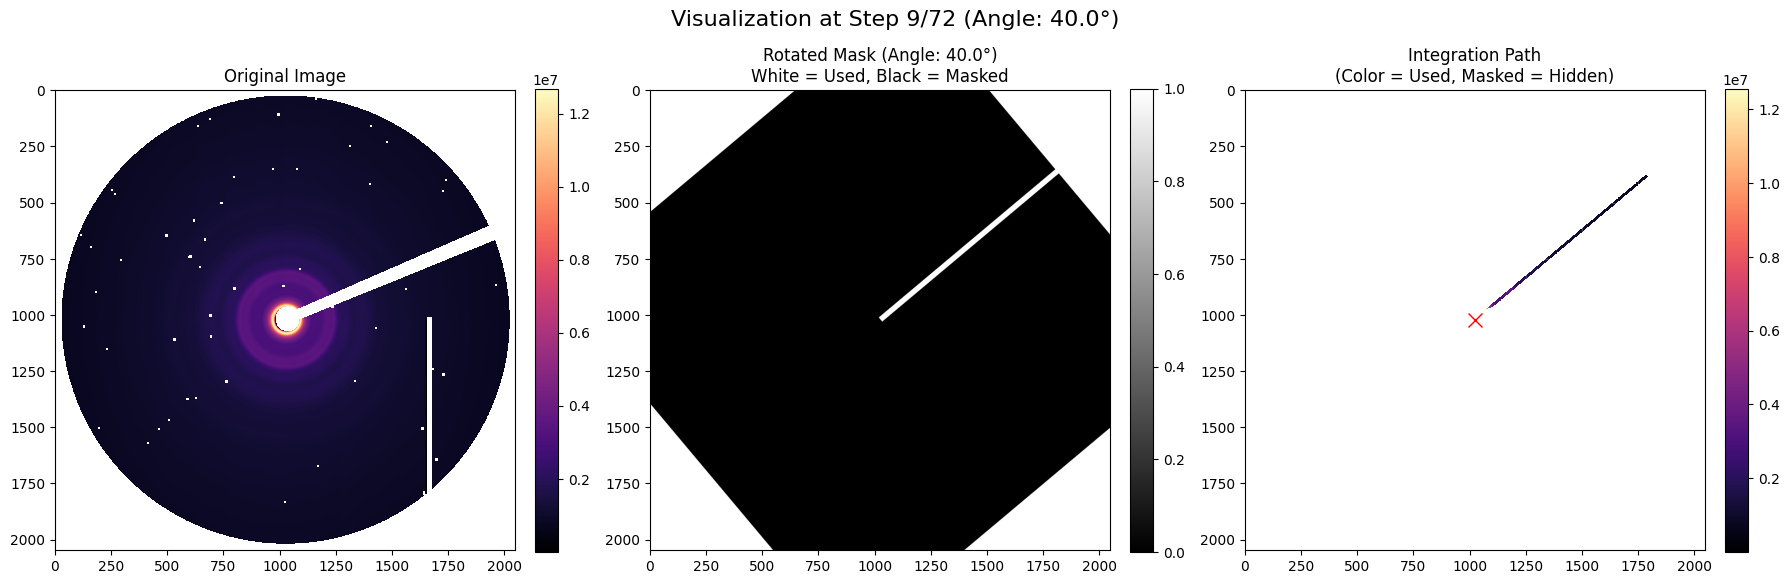


Processing angle 10/72: 45.000 degrees

Processing angle 11/72: 50.000 degrees

Processing angle 12/72: 55.000 degrees

Processing angle 13/72: 60.000 degrees


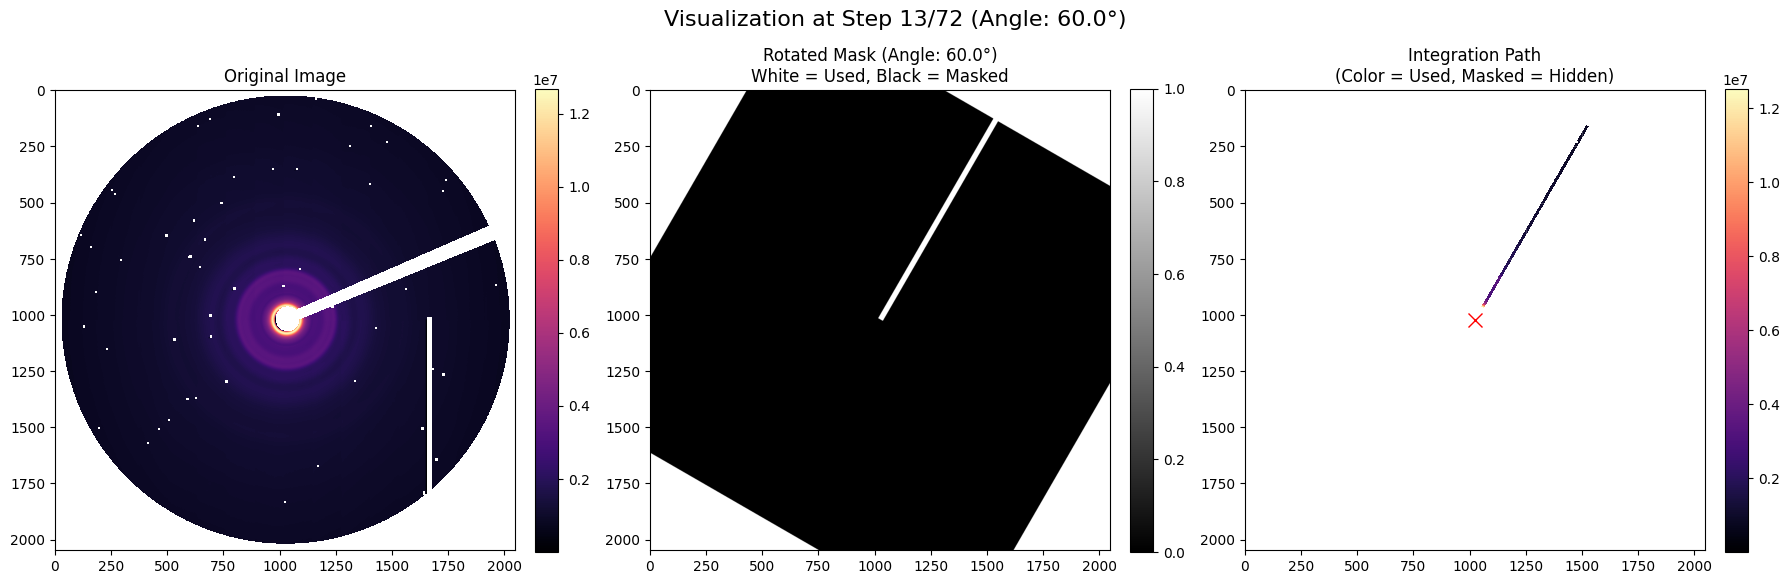


Processing angle 14/72: 65.000 degrees
Completed 14/72 integrations (19.4%)

Processing angle 15/72: 70.000 degrees

Processing angle 16/72: 75.000 degrees

Processing angle 17/72: 80.000 degrees


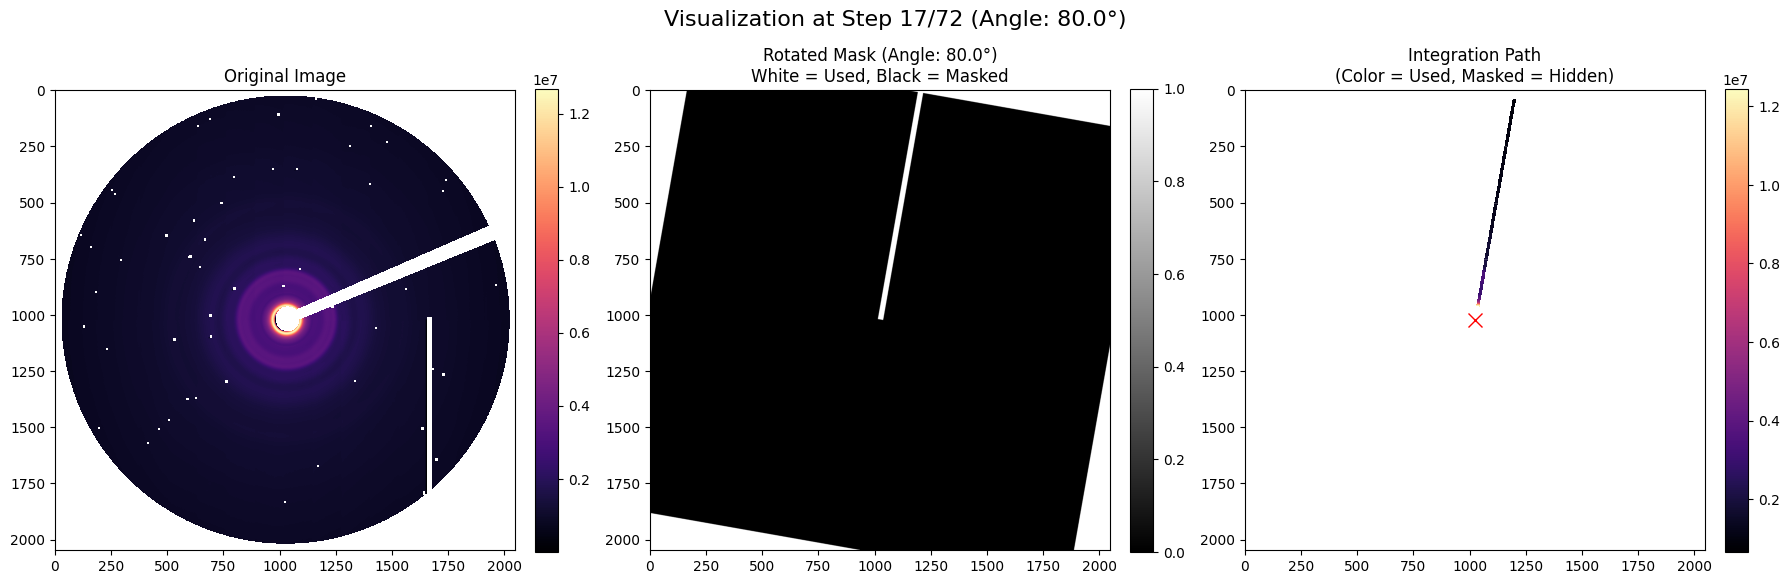


Processing angle 18/72: 85.000 degrees

Processing angle 19/72: 90.000 degrees

Processing angle 20/72: 95.000 degrees

Processing angle 21/72: 100.000 degrees


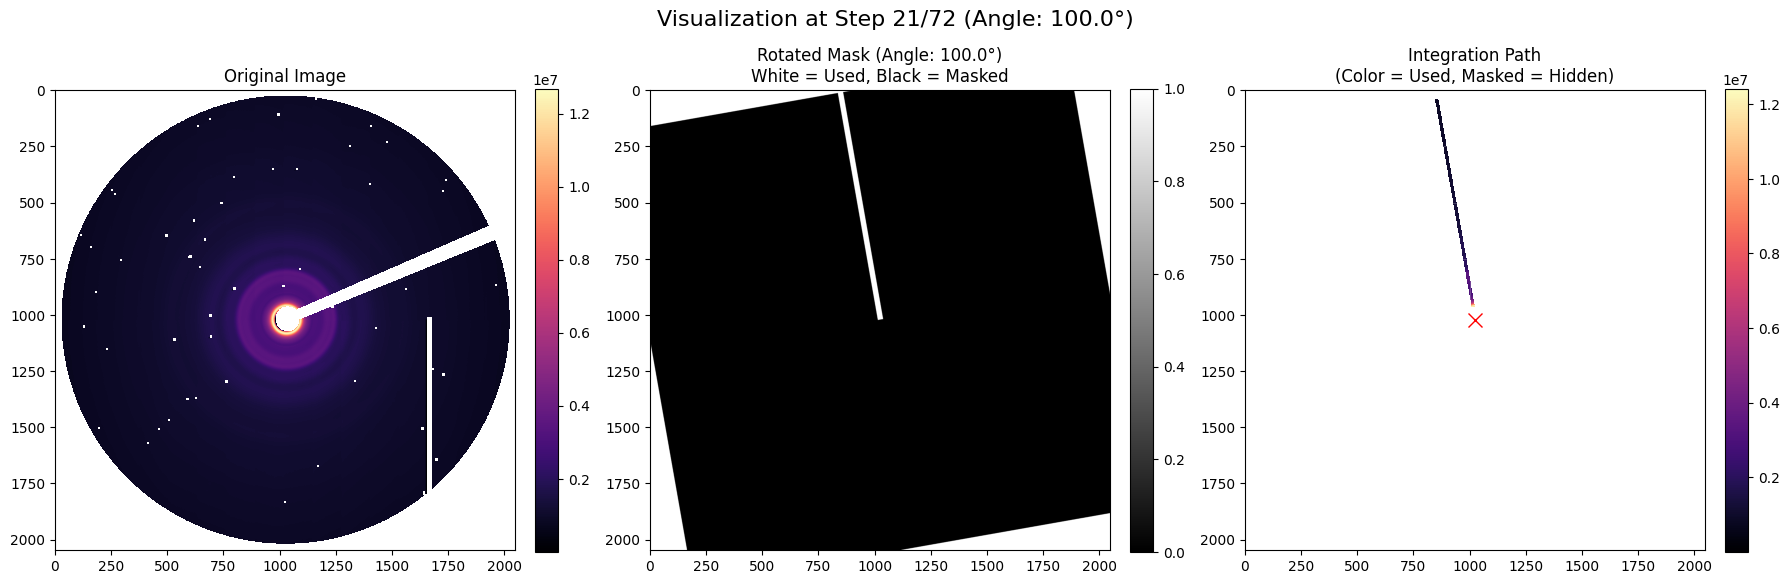

Completed 21/72 integrations (29.2%)

Processing angle 22/72: 105.000 degrees

Processing angle 23/72: 110.000 degrees

Processing angle 24/72: 115.000 degrees

Processing angle 25/72: 120.000 degrees


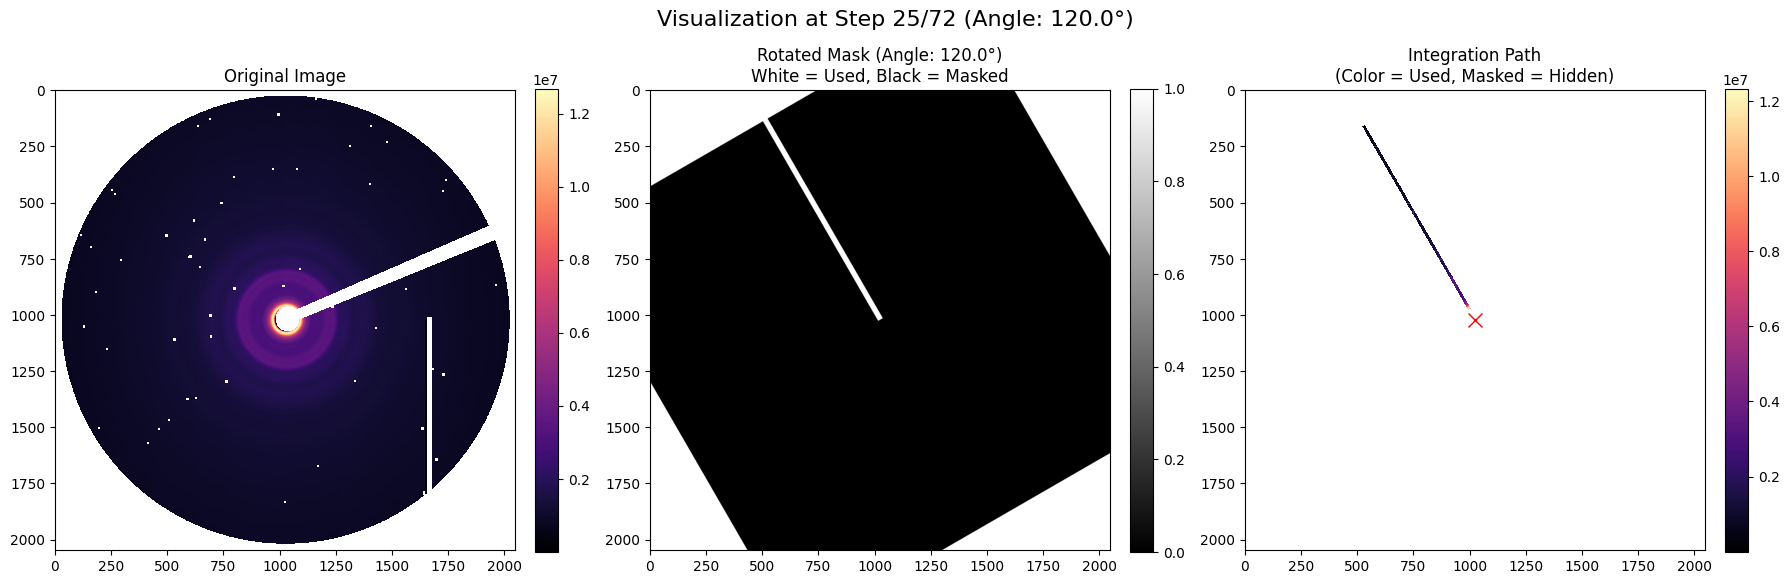


Processing angle 26/72: 125.000 degrees

Processing angle 27/72: 130.000 degrees

Processing angle 28/72: 135.000 degrees
Completed 28/72 integrations (38.9%)

Processing angle 29/72: 140.000 degrees


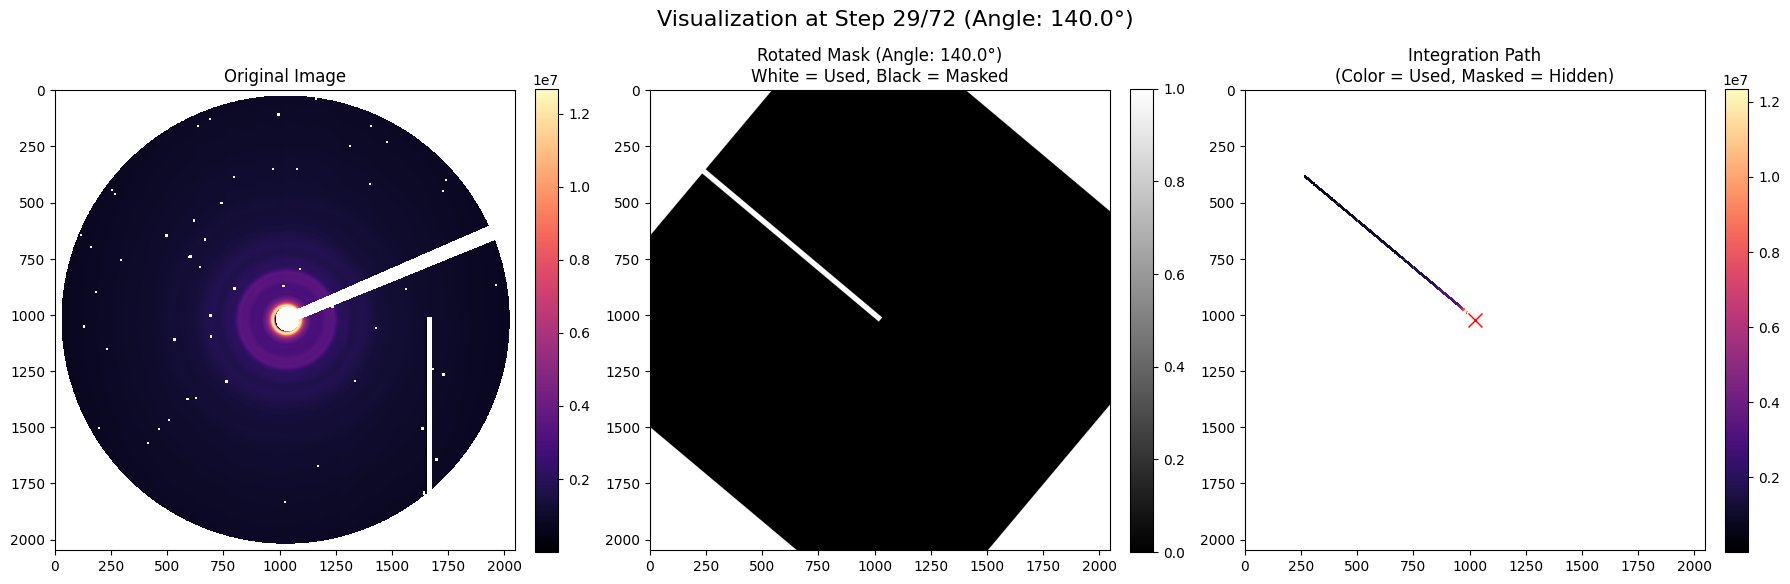


Processing angle 30/72: 145.000 degrees

Processing angle 31/72: 150.000 degrees

Processing angle 32/72: 155.000 degrees

Processing angle 33/72: 160.000 degrees


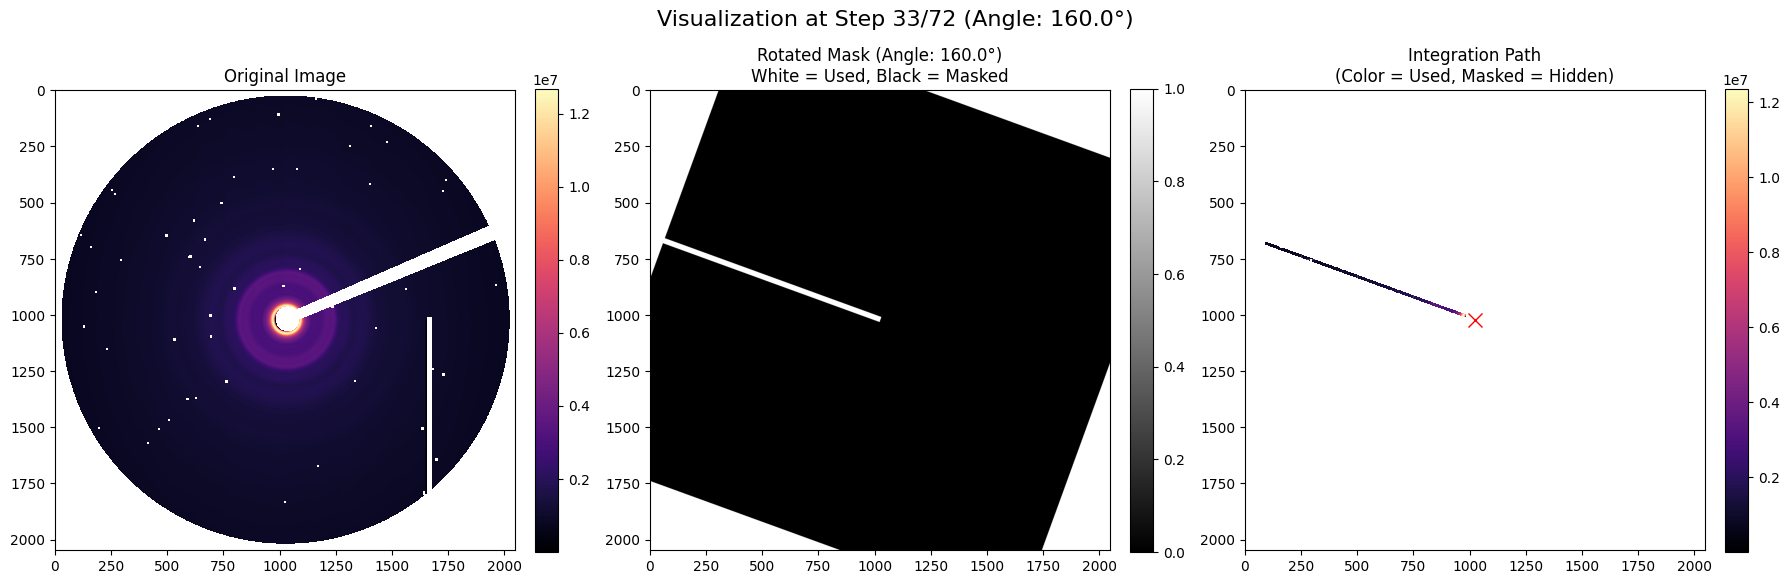


Processing angle 34/72: 165.000 degrees

Processing angle 35/72: 170.000 degrees
Completed 35/72 integrations (48.6%)

Processing angle 36/72: 175.000 degrees

Processing angle 37/72: 180.000 degrees


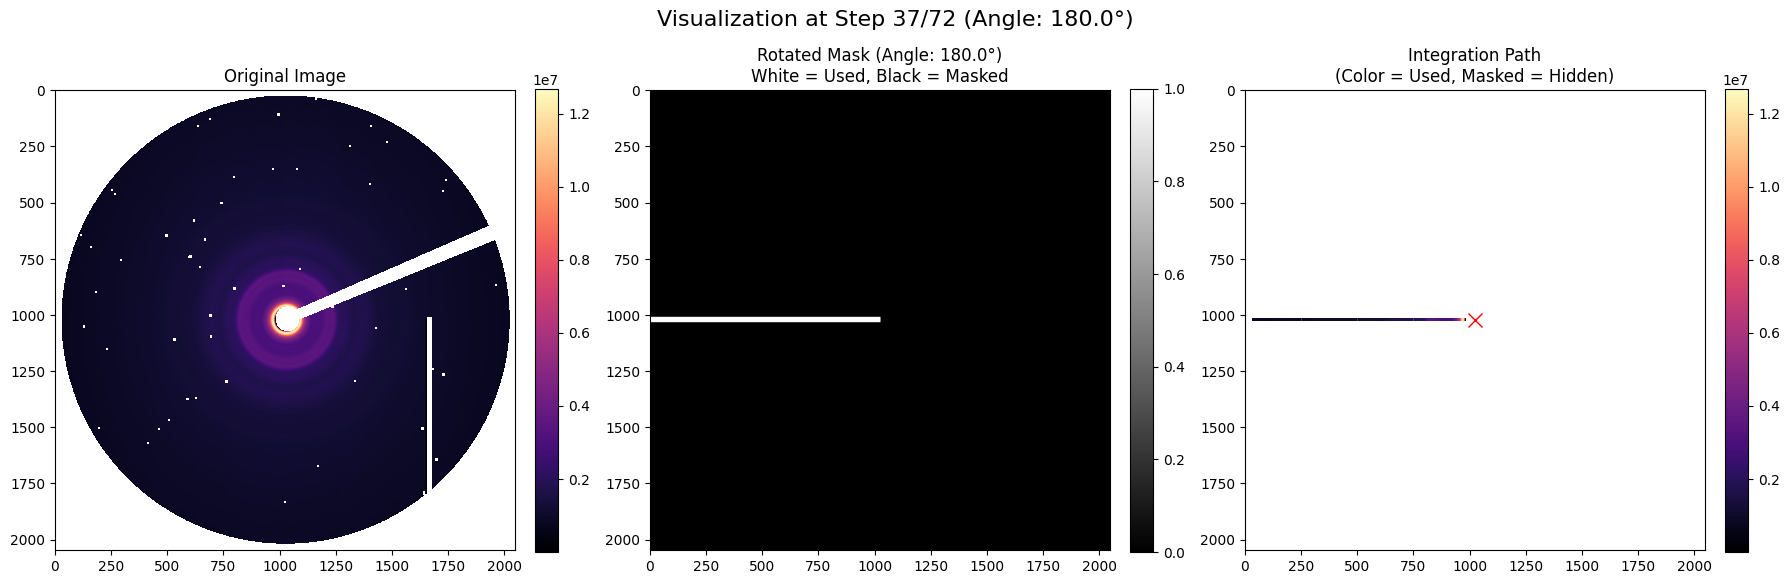


Processing angle 38/72: 185.000 degrees

Processing angle 39/72: 190.000 degrees

Processing angle 40/72: 195.000 degrees

Processing angle 41/72: 200.000 degrees


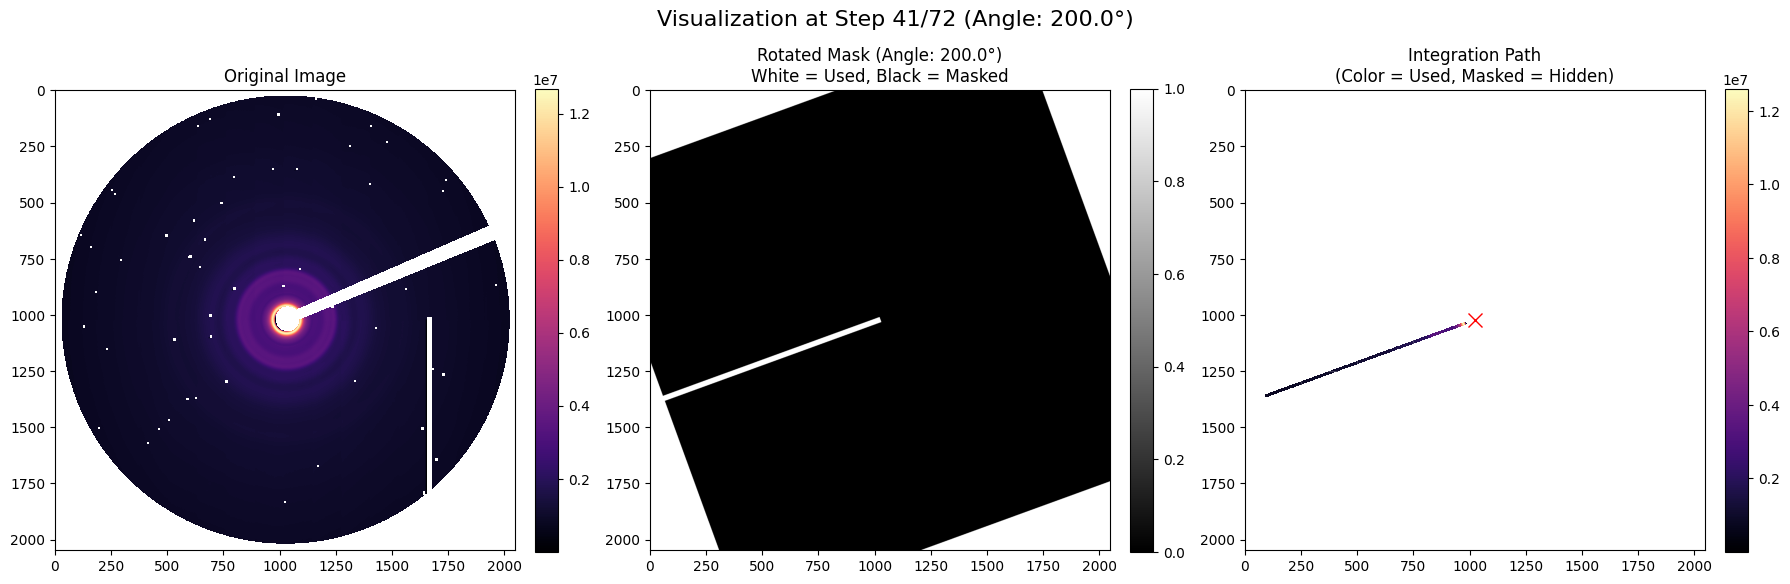


Processing angle 42/72: 205.000 degrees
Completed 42/72 integrations (58.3%)

Processing angle 43/72: 210.000 degrees

Processing angle 44/72: 215.000 degrees

Processing angle 45/72: 220.000 degrees


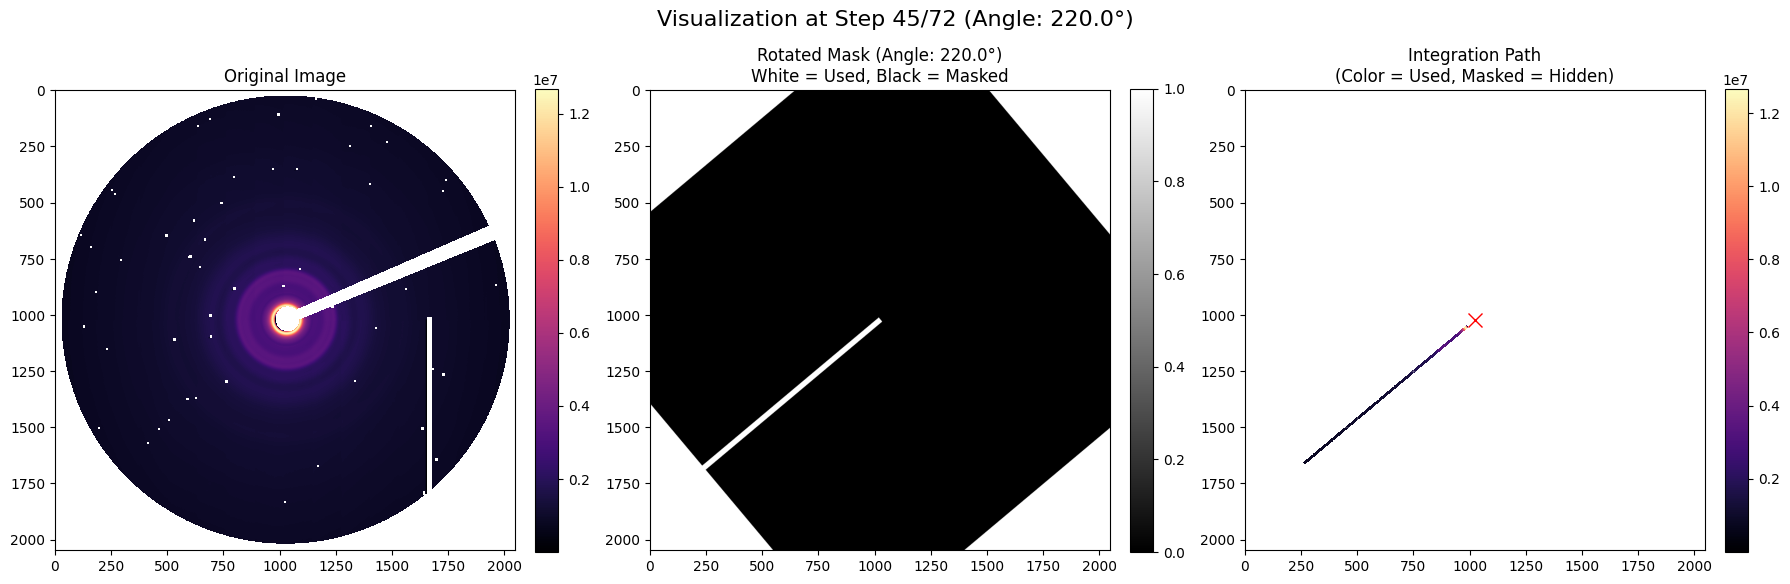


Processing angle 46/72: 225.000 degrees

Processing angle 47/72: 230.000 degrees

Processing angle 48/72: 235.000 degrees

Processing angle 49/72: 240.000 degrees


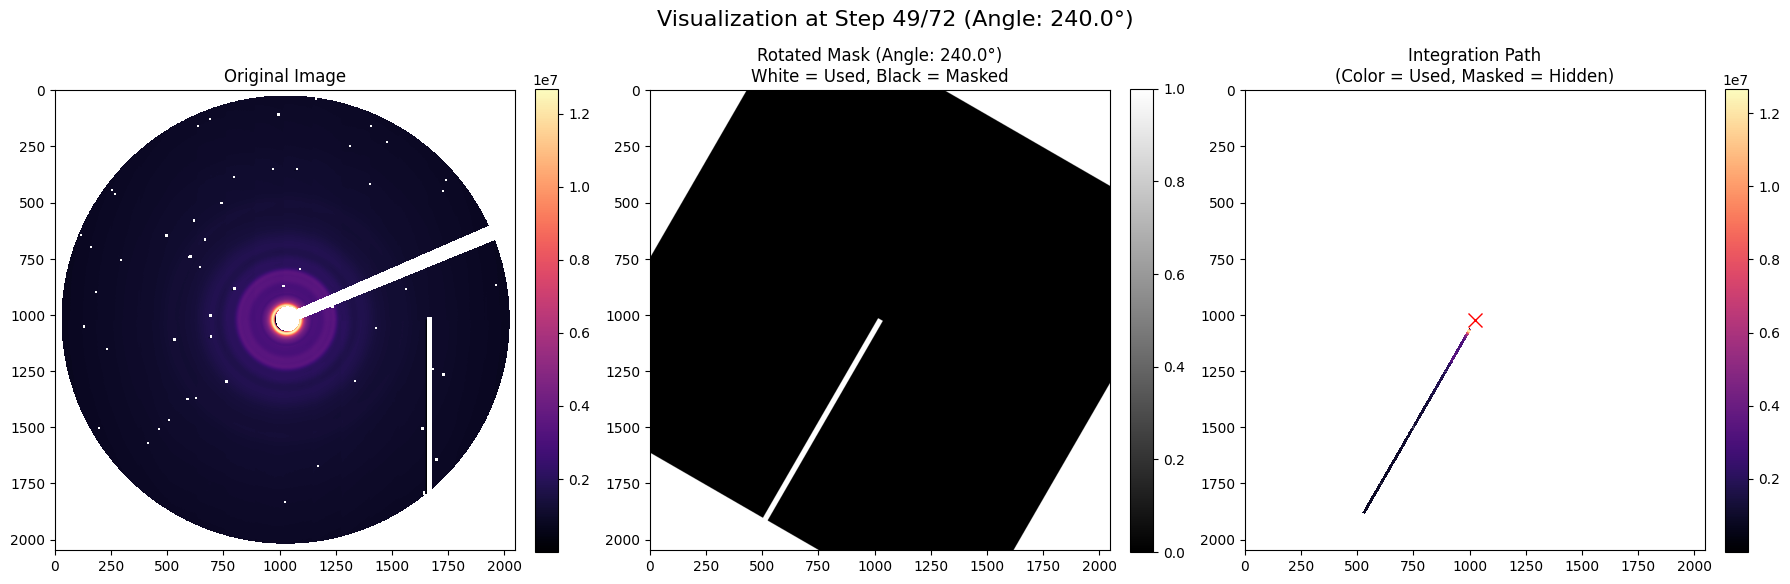

Completed 49/72 integrations (68.1%)

Processing angle 50/72: 245.000 degrees

Processing angle 51/72: 250.000 degrees

Processing angle 52/72: 255.000 degrees

Processing angle 53/72: 260.000 degrees


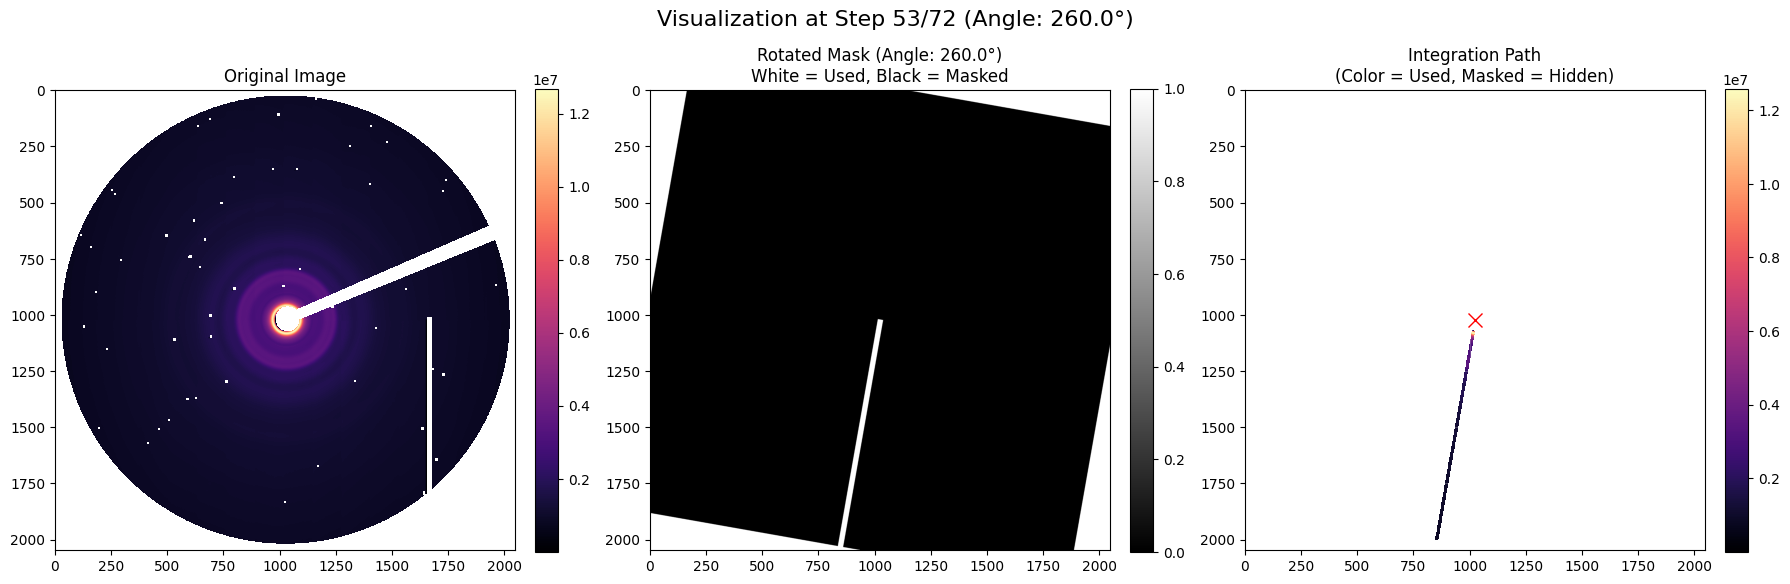


Processing angle 54/72: 265.000 degrees

Processing angle 55/72: 270.000 degrees

Processing angle 56/72: 275.000 degrees
Completed 56/72 integrations (77.8%)

Processing angle 57/72: 280.000 degrees


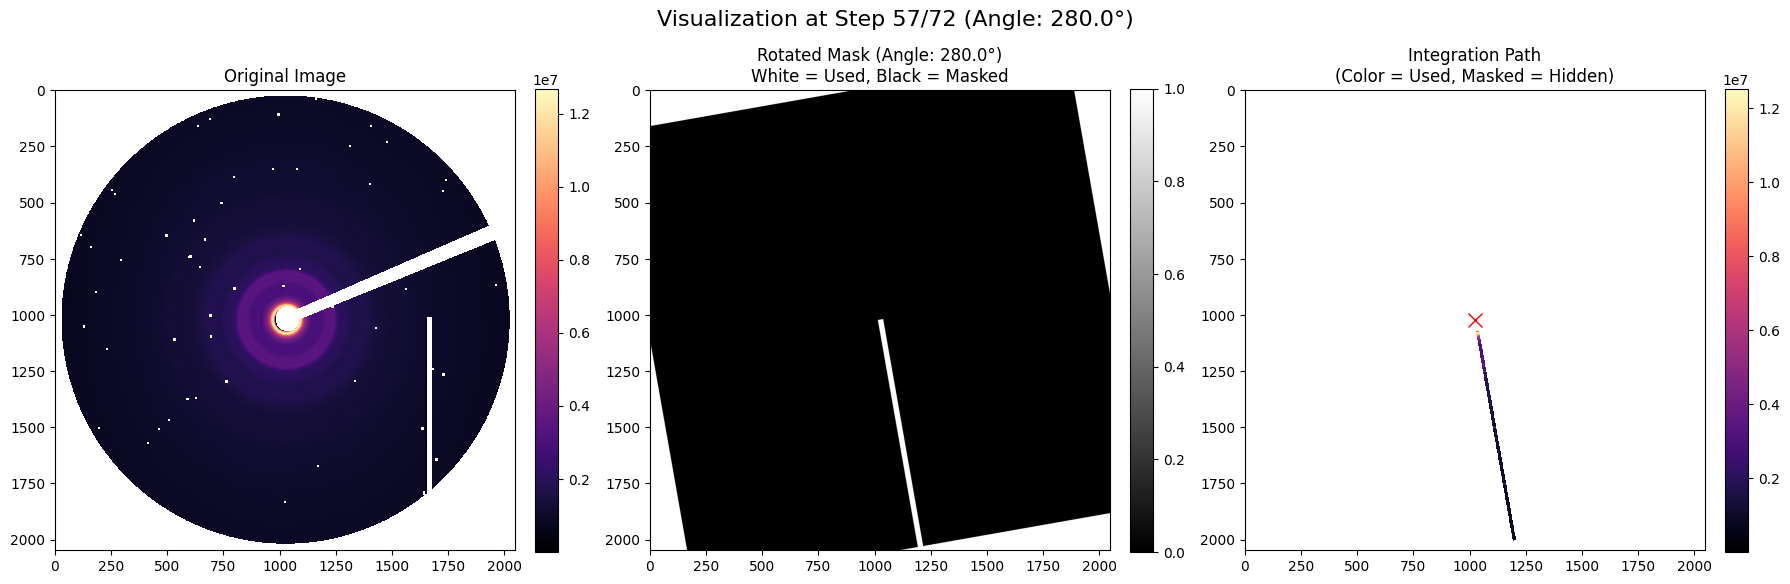


Processing angle 58/72: 285.000 degrees

Processing angle 59/72: 290.000 degrees

Processing angle 60/72: 295.000 degrees

Processing angle 61/72: 300.000 degrees


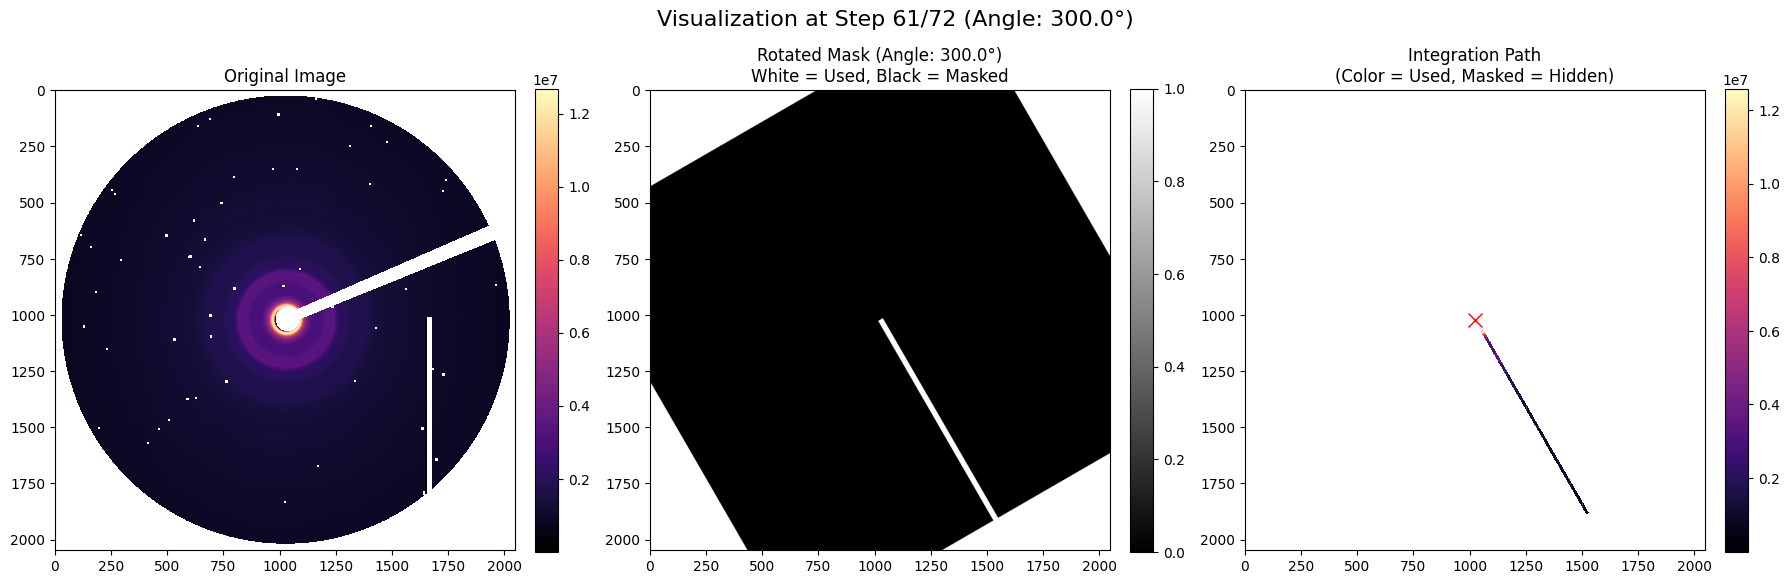


Processing angle 62/72: 305.000 degrees

Processing angle 63/72: 310.000 degrees
Completed 63/72 integrations (87.5%)

Processing angle 64/72: 315.000 degrees

Processing angle 65/72: 320.000 degrees


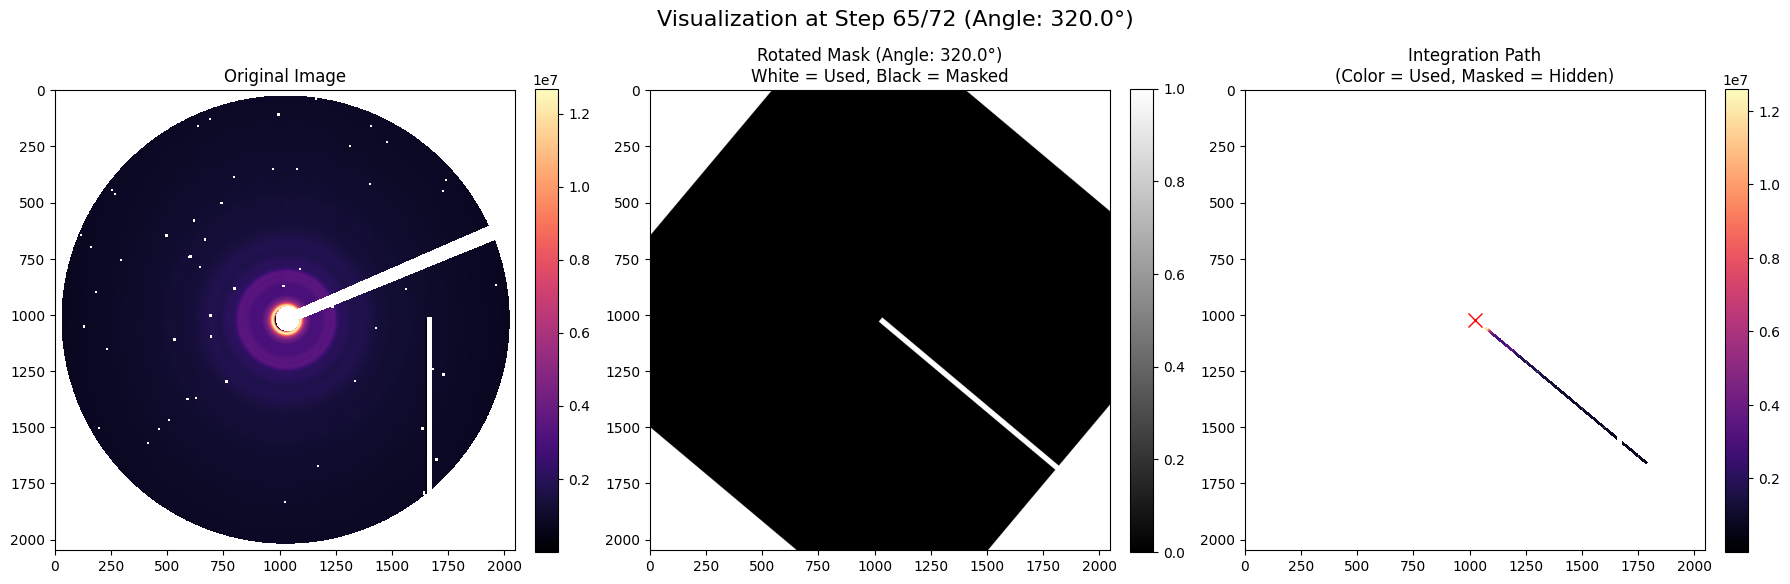


Processing angle 66/72: 325.000 degrees

Processing angle 67/72: 330.000 degrees

Processing angle 68/72: 335.000 degrees

Processing angle 69/72: 340.000 degrees


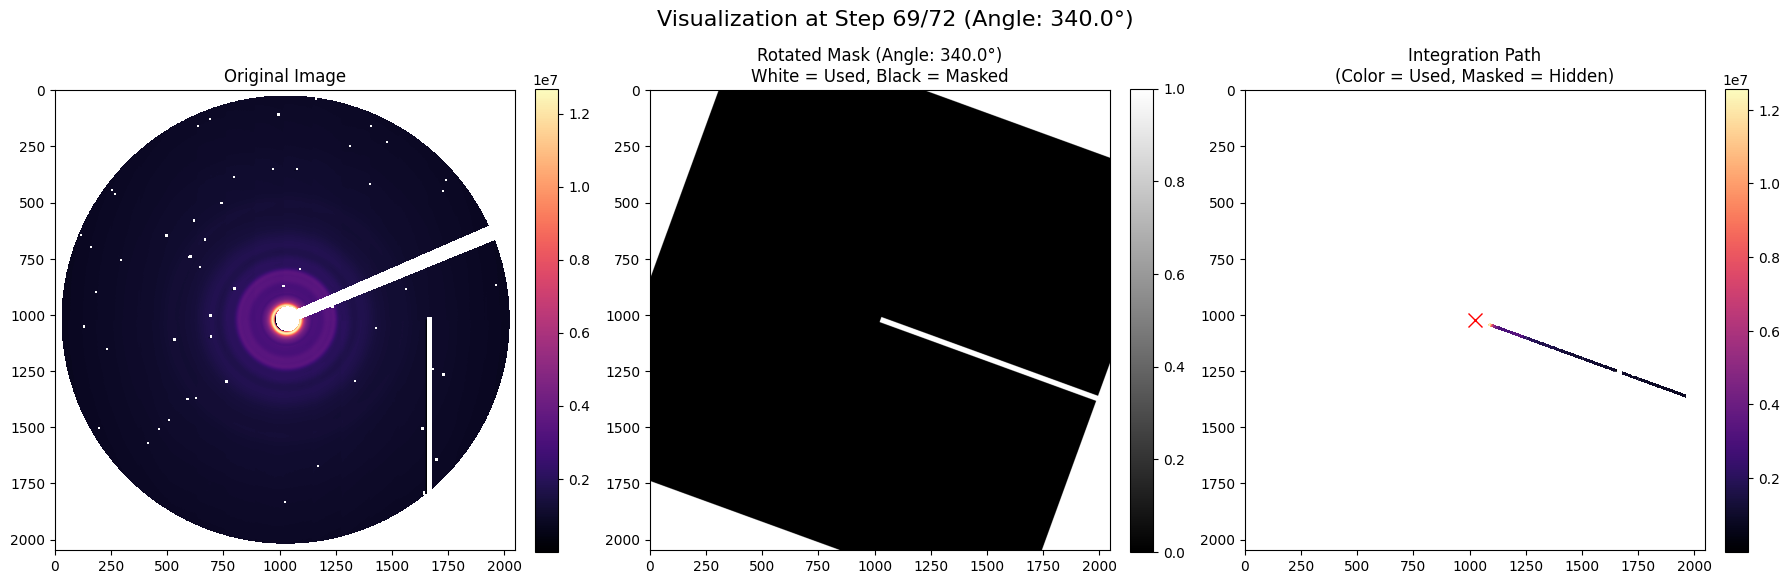


Processing angle 70/72: 345.000 degrees
Completed 70/72 integrations (97.2%)

Processing angle 71/72: 350.000 degrees

Processing angle 72/72: 355.000 degrees


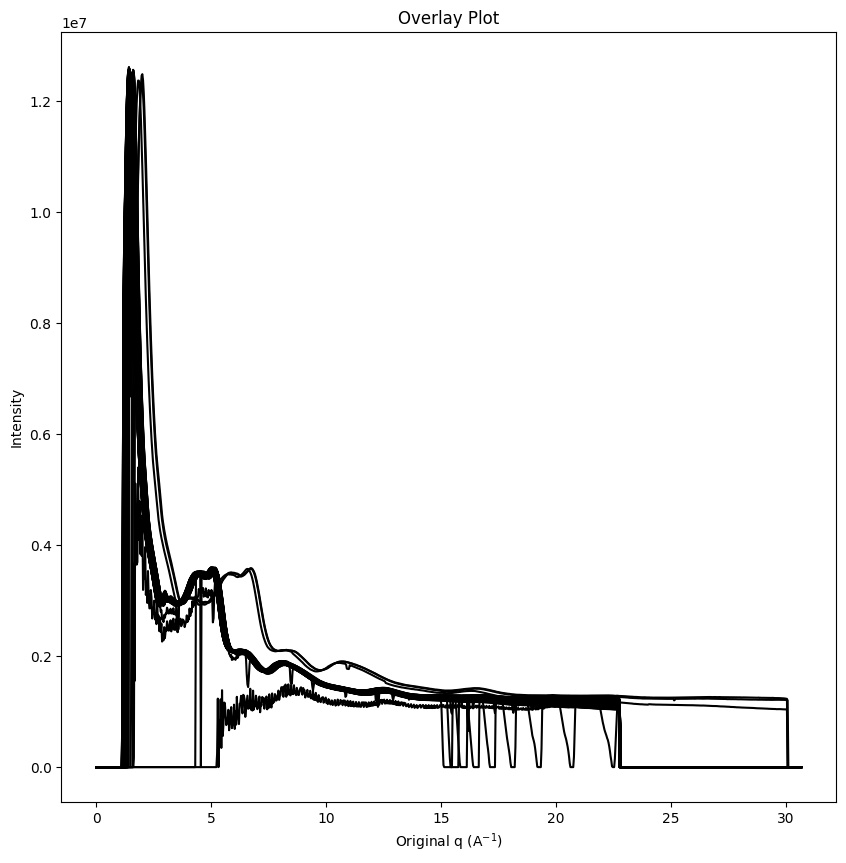

In [7]:
q, cryst_C_GST_SiO2_TM_mask = sim.rotate_and_integrate_mask_printout(tm_circle, 5, .41794313, 1.22224e-11, resolution = 1000, mask = mask_12, intermediate_steps = 18)

(2048, 2048)


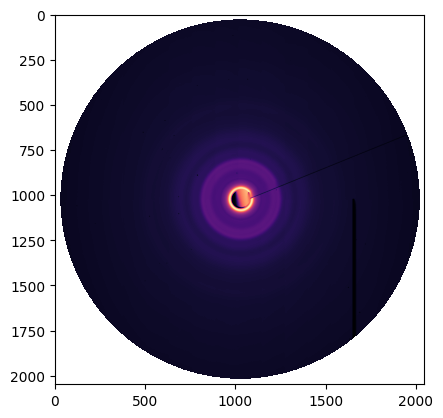

(2048, 2048)


In [8]:
print(tm_shifted_image.shape)
tm_shifted_image_masked = tm_shifted_image + + tm_mask_with_nan
tm_circle_filled = sim.fill_nan_with_neighbor_mean_circle(tm_shifted_image_masked, radius = 1000, center = (1024, 1024))
plt.imshow(tm_circle_filled, cmap = 'magma')
plt.show()
print(tm_circle_filled.shape)

Starting rotate_and_integrate function
Will show visualizations every 4 steps

Processing angle 1/72: 0.000 degrees


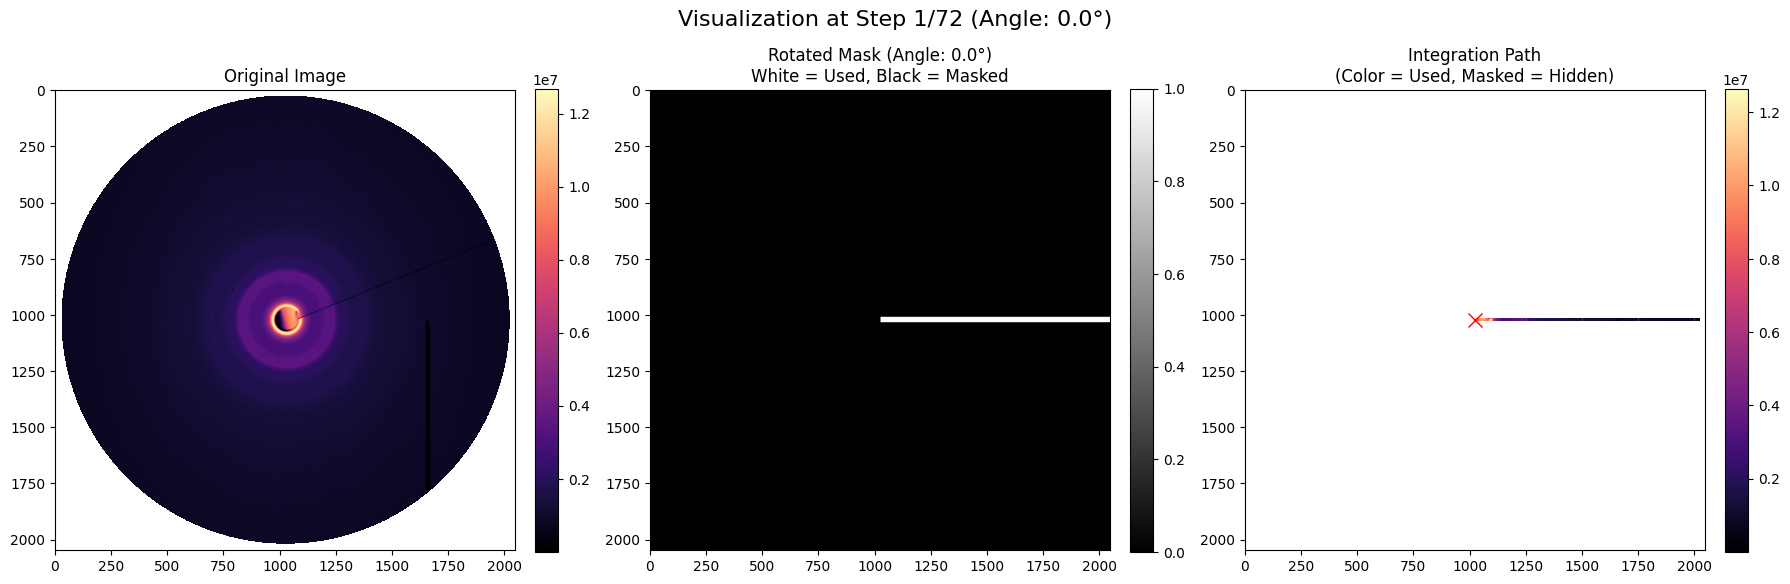


Processing angle 2/72: 5.000 degrees

Processing angle 3/72: 10.000 degrees

Processing angle 4/72: 15.000 degrees

Processing angle 5/72: 20.000 degrees


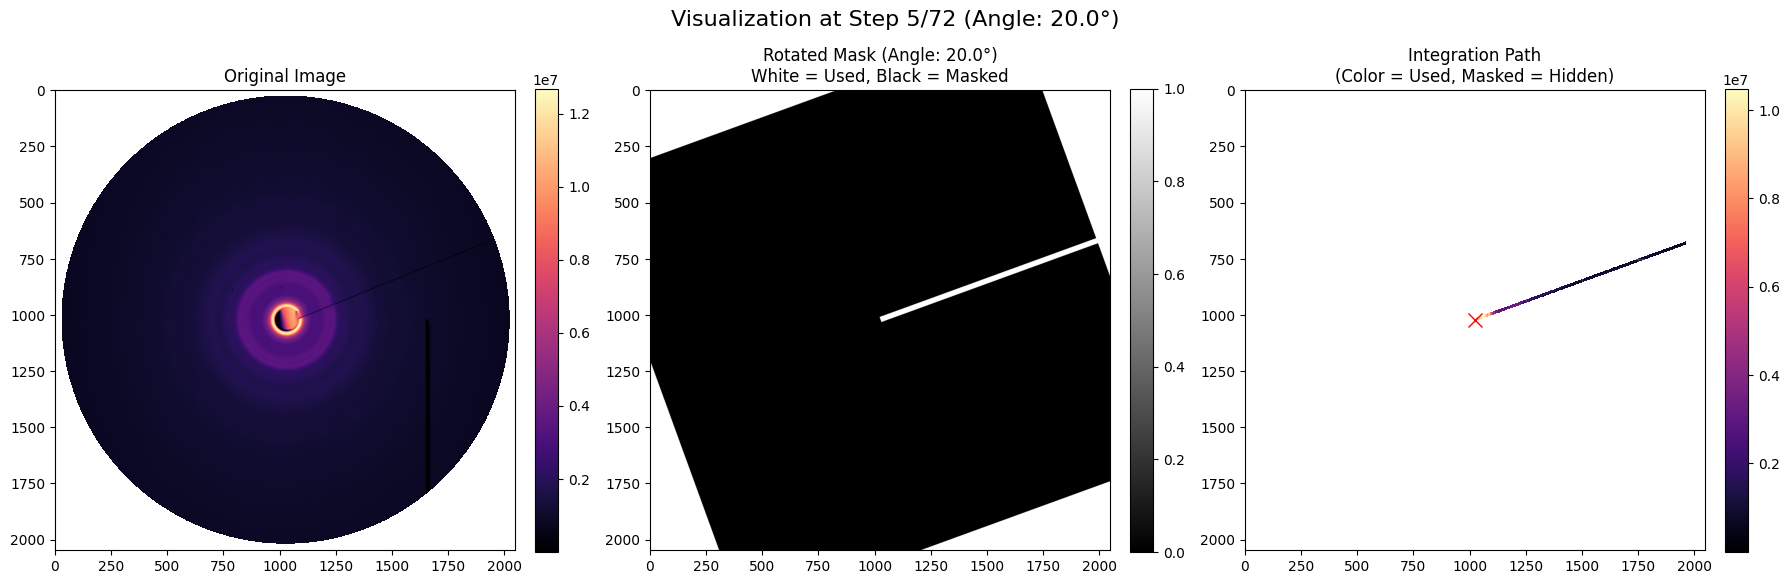


Processing angle 6/72: 25.000 degrees

Processing angle 7/72: 30.000 degrees
Completed 7/72 integrations (9.7%)

Processing angle 8/72: 35.000 degrees

Processing angle 9/72: 40.000 degrees


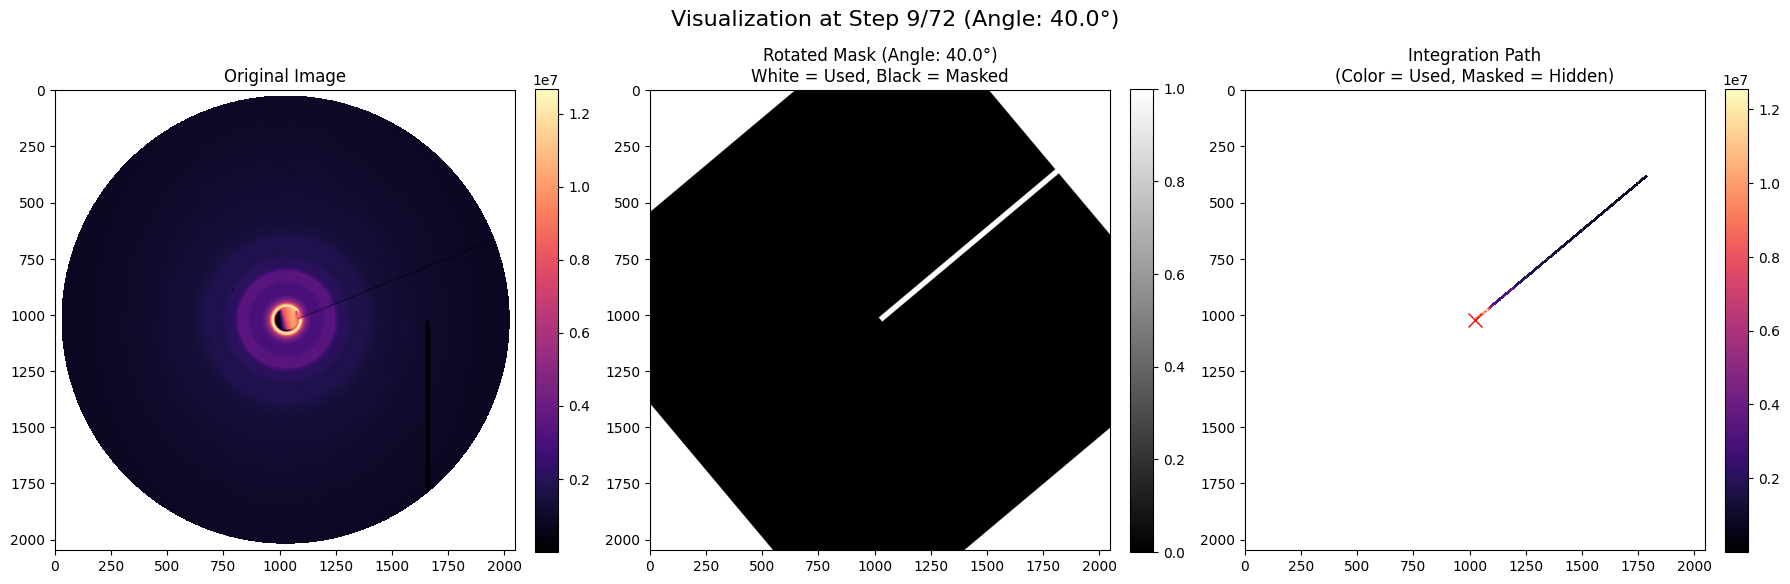


Processing angle 10/72: 45.000 degrees

Processing angle 11/72: 50.000 degrees

Processing angle 12/72: 55.000 degrees

Processing angle 13/72: 60.000 degrees


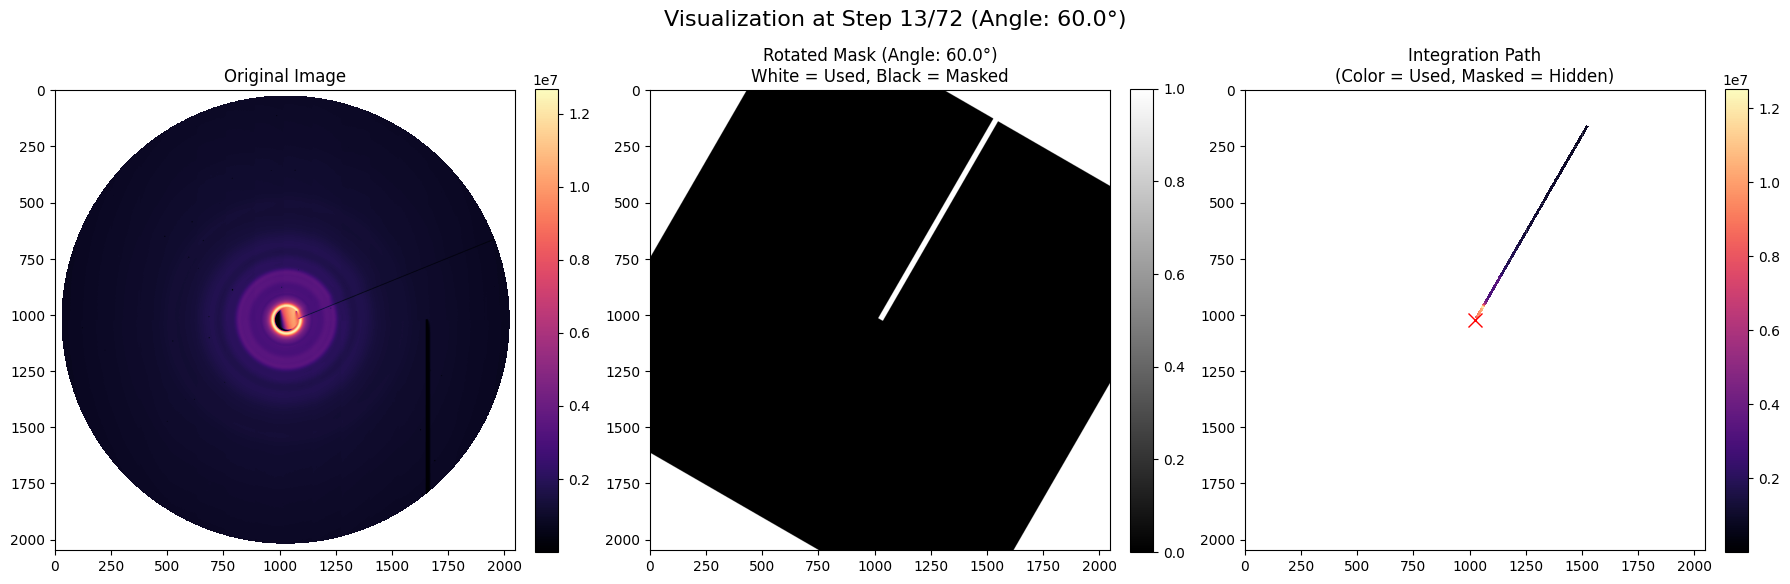


Processing angle 14/72: 65.000 degrees
Completed 14/72 integrations (19.4%)

Processing angle 15/72: 70.000 degrees

Processing angle 16/72: 75.000 degrees

Processing angle 17/72: 80.000 degrees


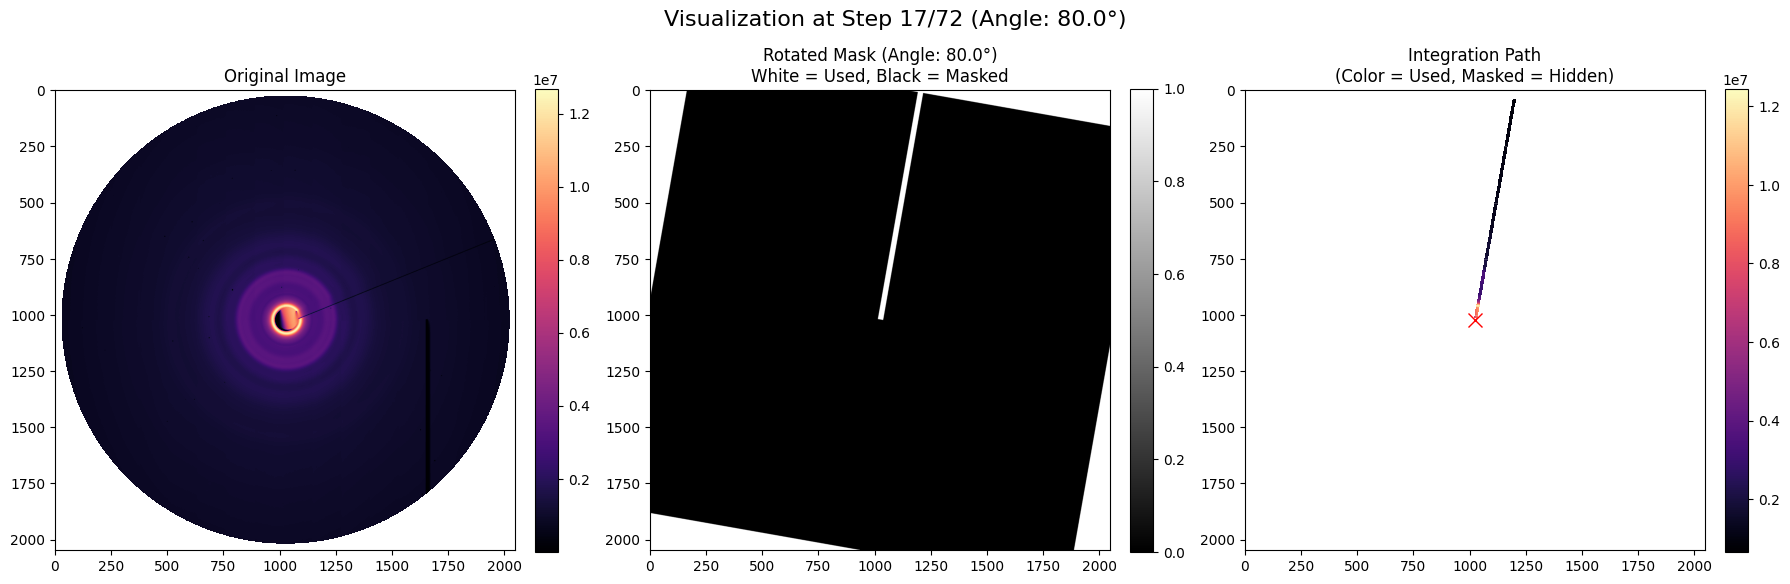


Processing angle 18/72: 85.000 degrees

Processing angle 19/72: 90.000 degrees

Processing angle 20/72: 95.000 degrees

Processing angle 21/72: 100.000 degrees


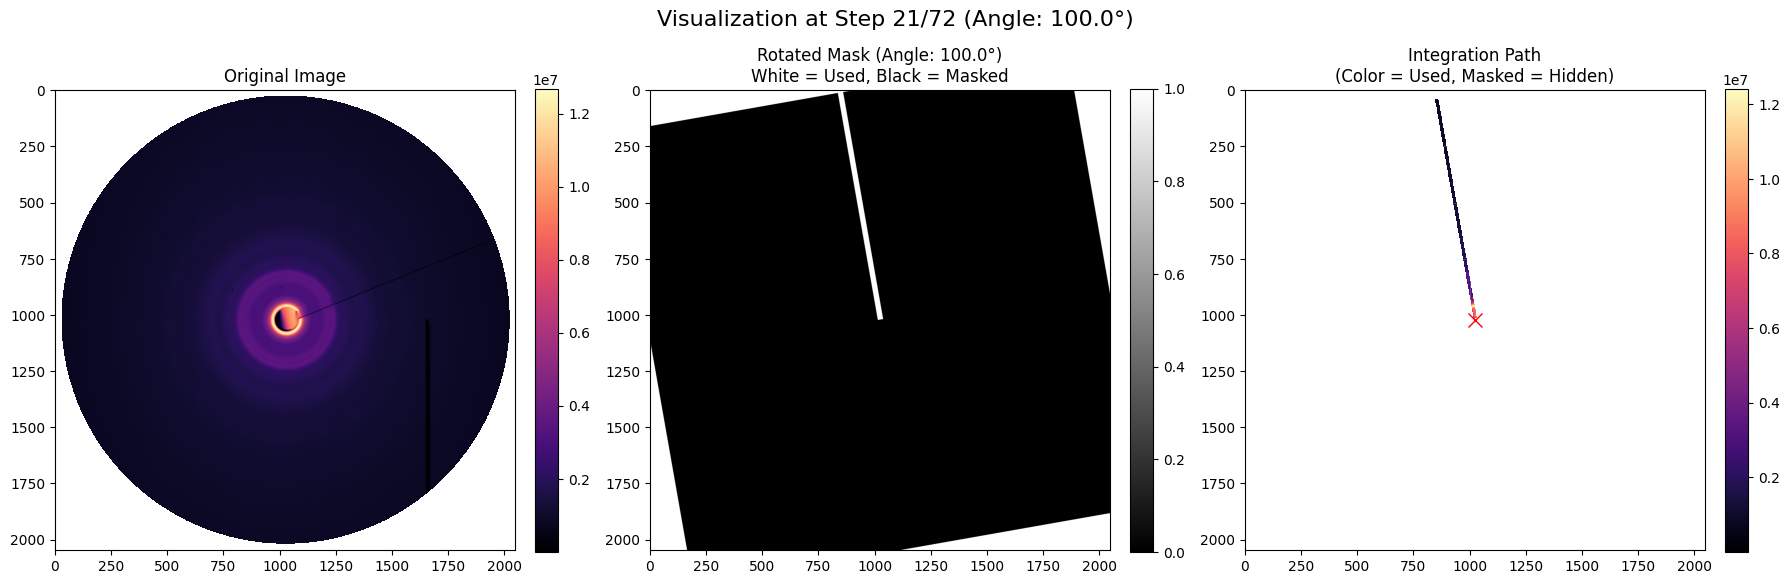

Completed 21/72 integrations (29.2%)

Processing angle 22/72: 105.000 degrees

Processing angle 23/72: 110.000 degrees

Processing angle 24/72: 115.000 degrees

Processing angle 25/72: 120.000 degrees


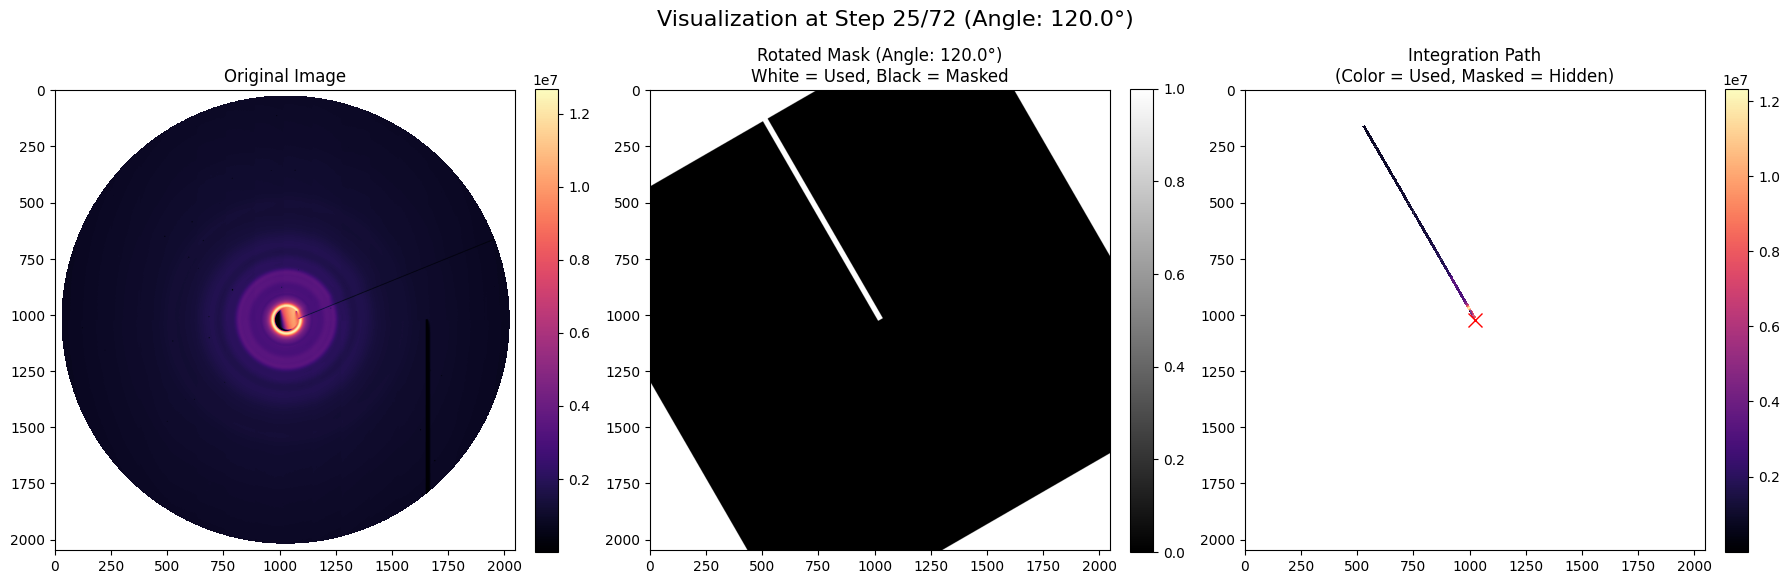


Processing angle 26/72: 125.000 degrees

Processing angle 27/72: 130.000 degrees

Processing angle 28/72: 135.000 degrees
Completed 28/72 integrations (38.9%)

Processing angle 29/72: 140.000 degrees


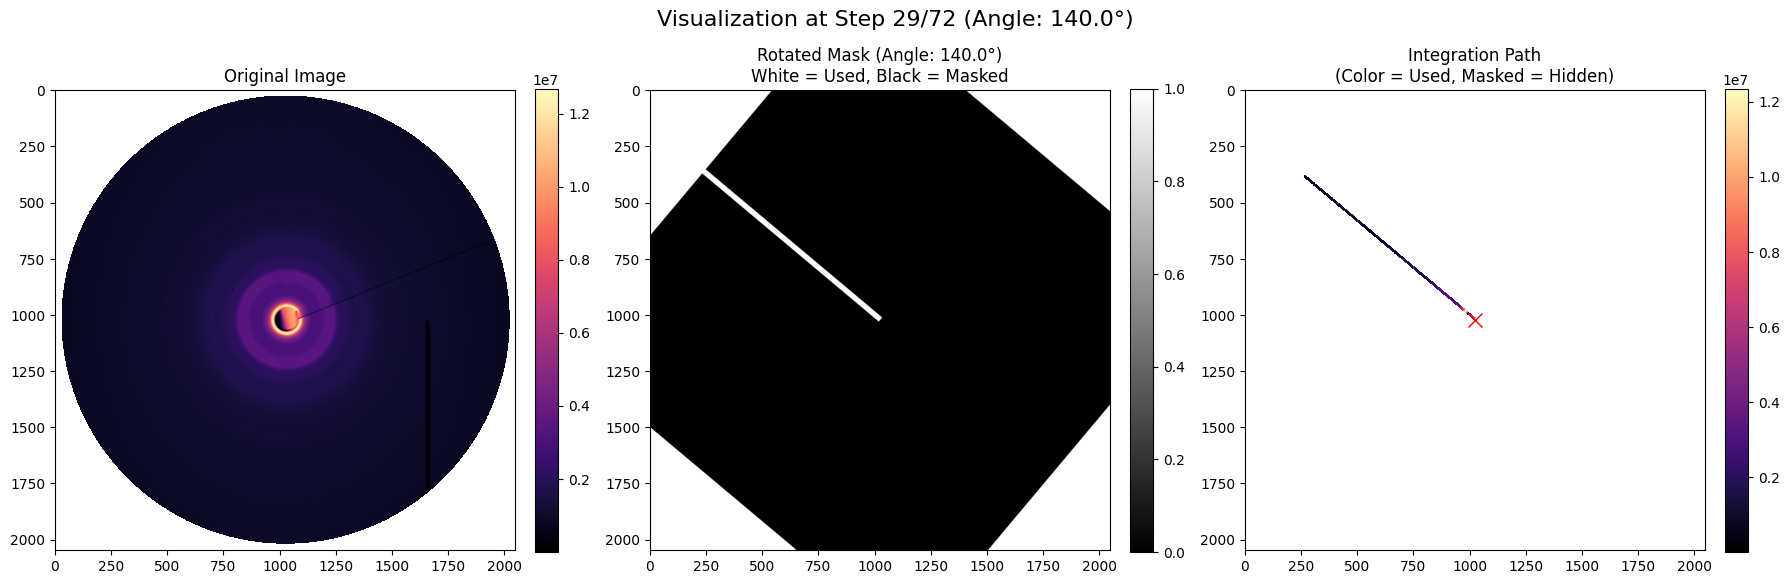


Processing angle 30/72: 145.000 degrees

Processing angle 31/72: 150.000 degrees

Processing angle 32/72: 155.000 degrees

Processing angle 33/72: 160.000 degrees


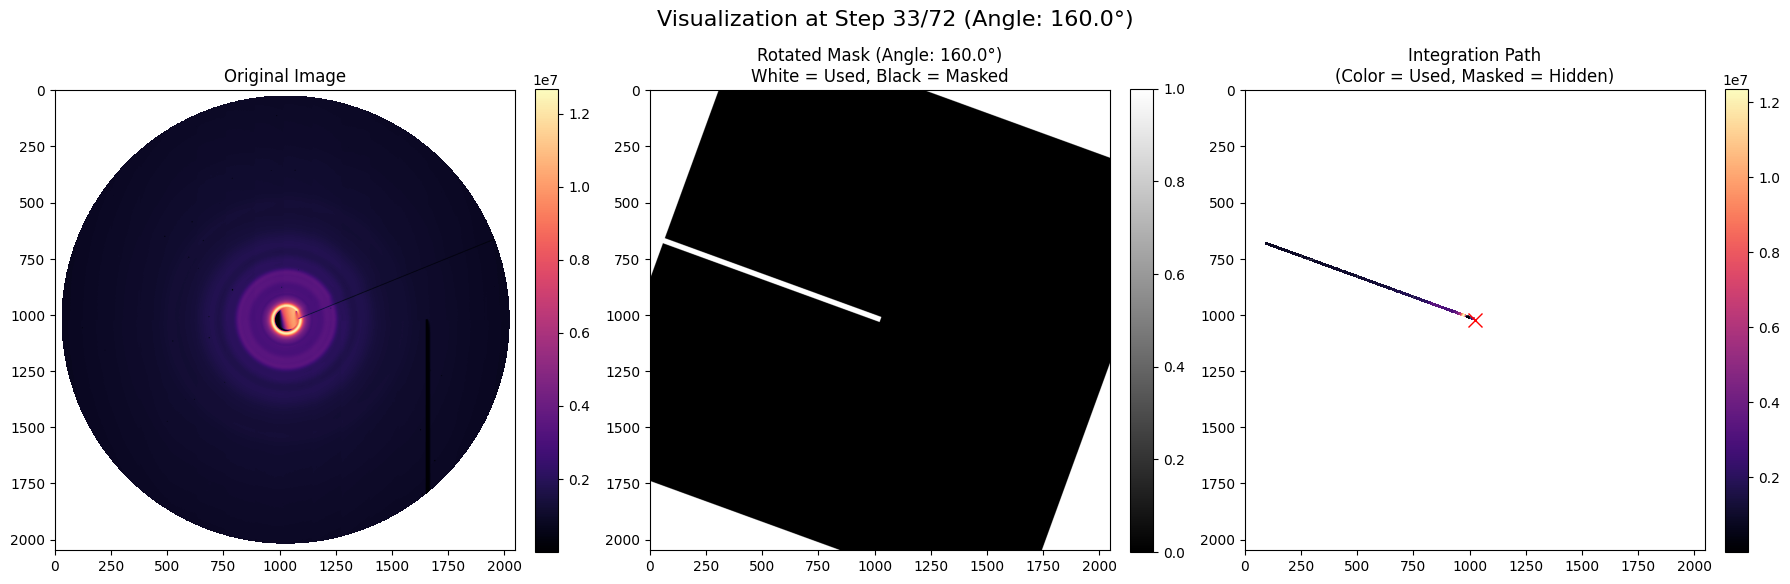


Processing angle 34/72: 165.000 degrees

Processing angle 35/72: 170.000 degrees
Completed 35/72 integrations (48.6%)

Processing angle 36/72: 175.000 degrees

Processing angle 37/72: 180.000 degrees


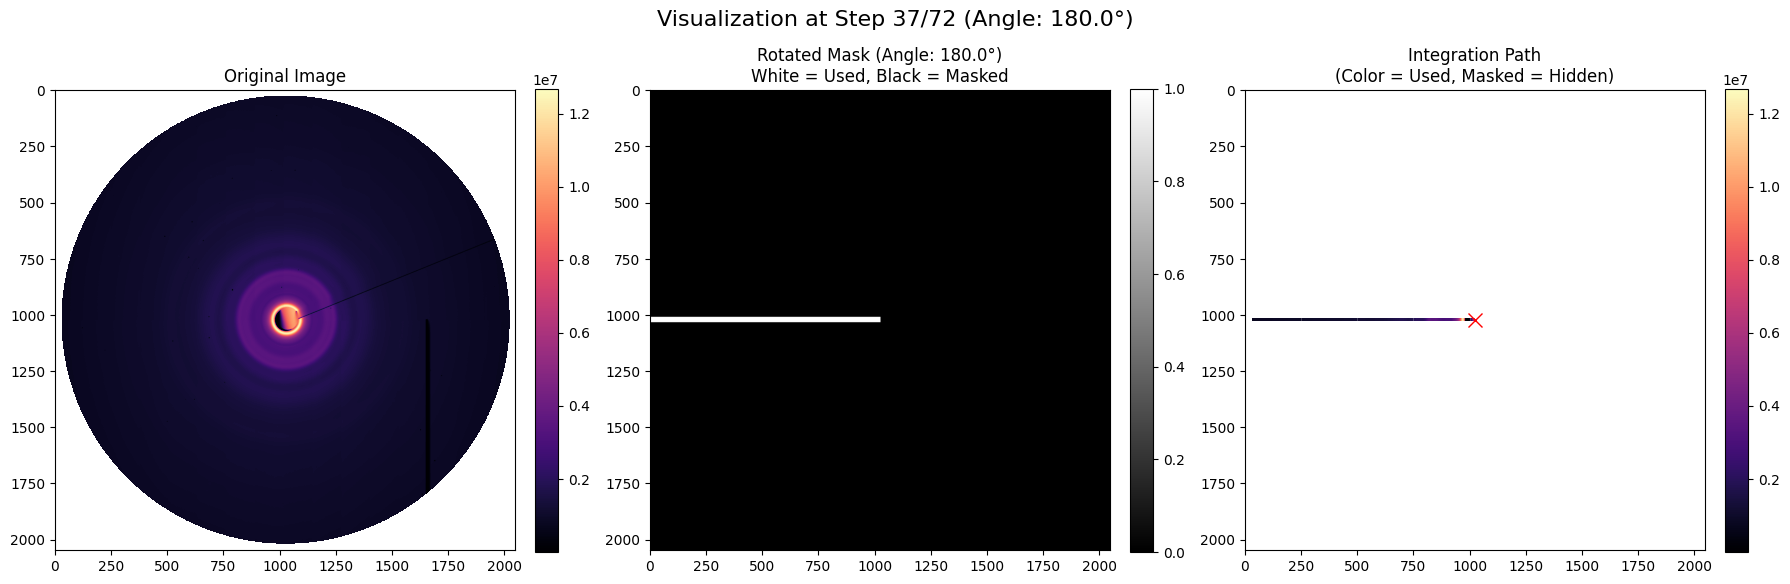


Processing angle 38/72: 185.000 degrees

Processing angle 39/72: 190.000 degrees

Processing angle 40/72: 195.000 degrees

Processing angle 41/72: 200.000 degrees


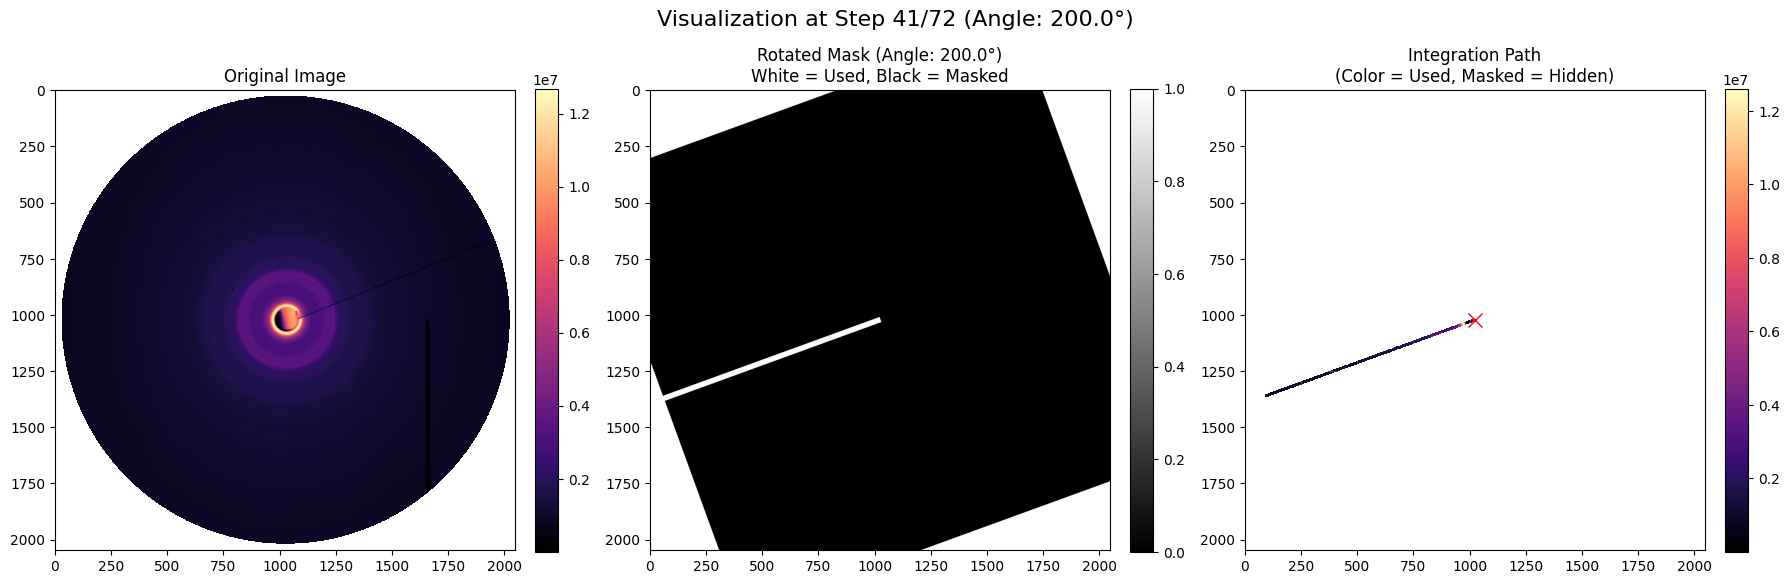


Processing angle 42/72: 205.000 degrees
Completed 42/72 integrations (58.3%)

Processing angle 43/72: 210.000 degrees

Processing angle 44/72: 215.000 degrees

Processing angle 45/72: 220.000 degrees


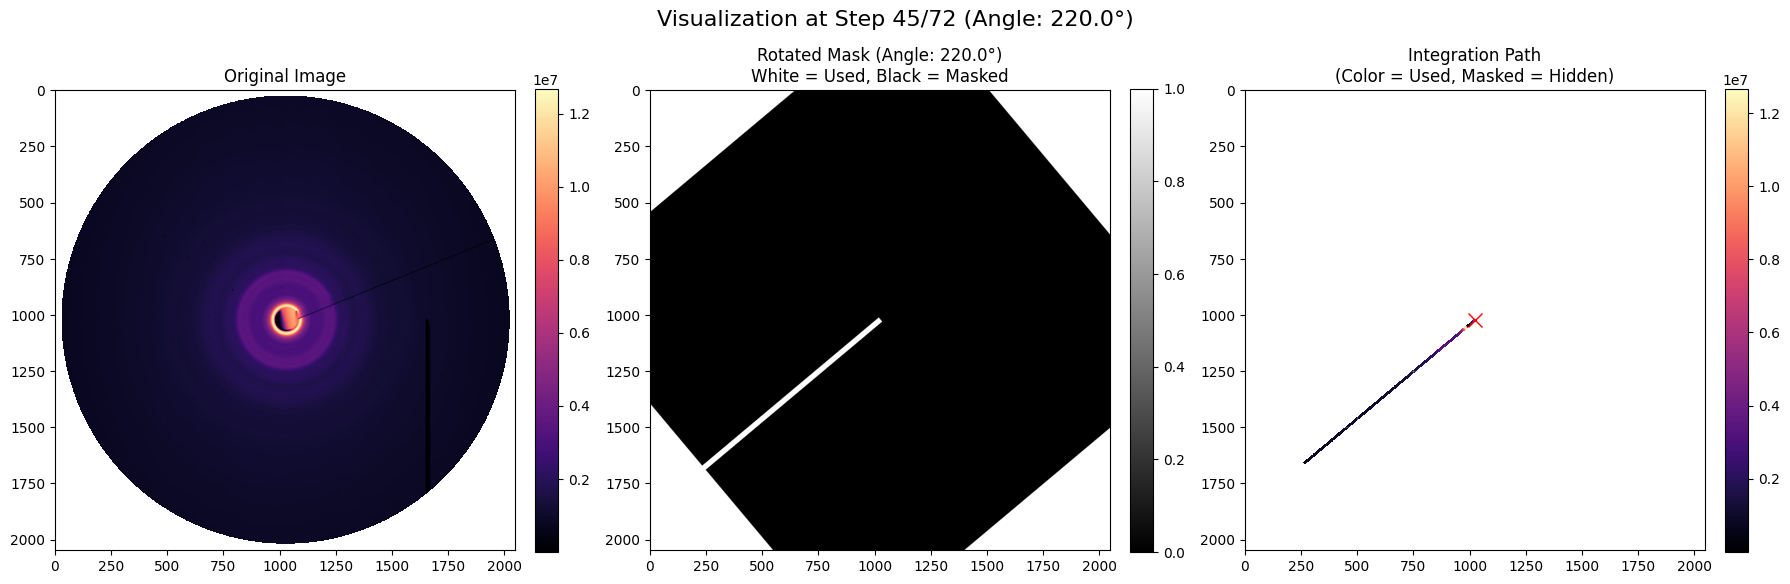


Processing angle 46/72: 225.000 degrees

Processing angle 47/72: 230.000 degrees

Processing angle 48/72: 235.000 degrees

Processing angle 49/72: 240.000 degrees


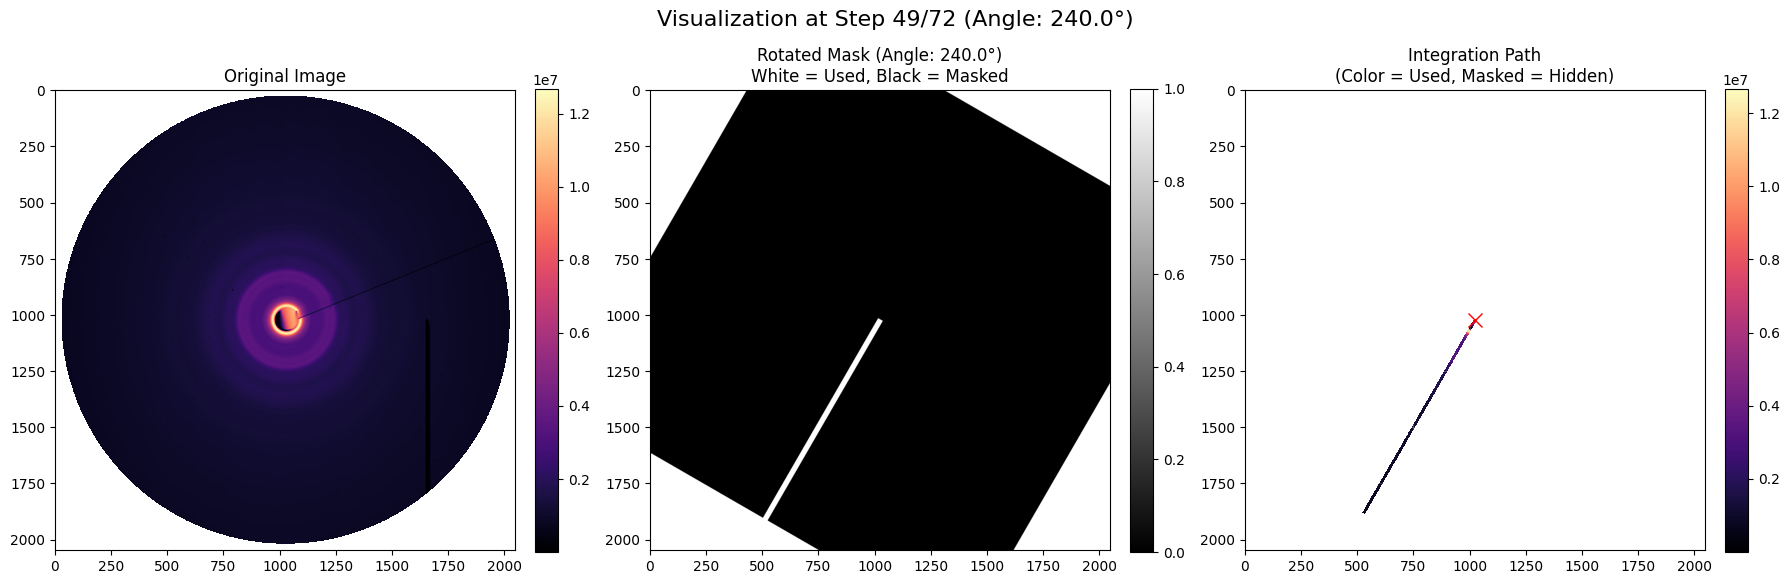

Completed 49/72 integrations (68.1%)

Processing angle 50/72: 245.000 degrees

Processing angle 51/72: 250.000 degrees

Processing angle 52/72: 255.000 degrees

Processing angle 53/72: 260.000 degrees


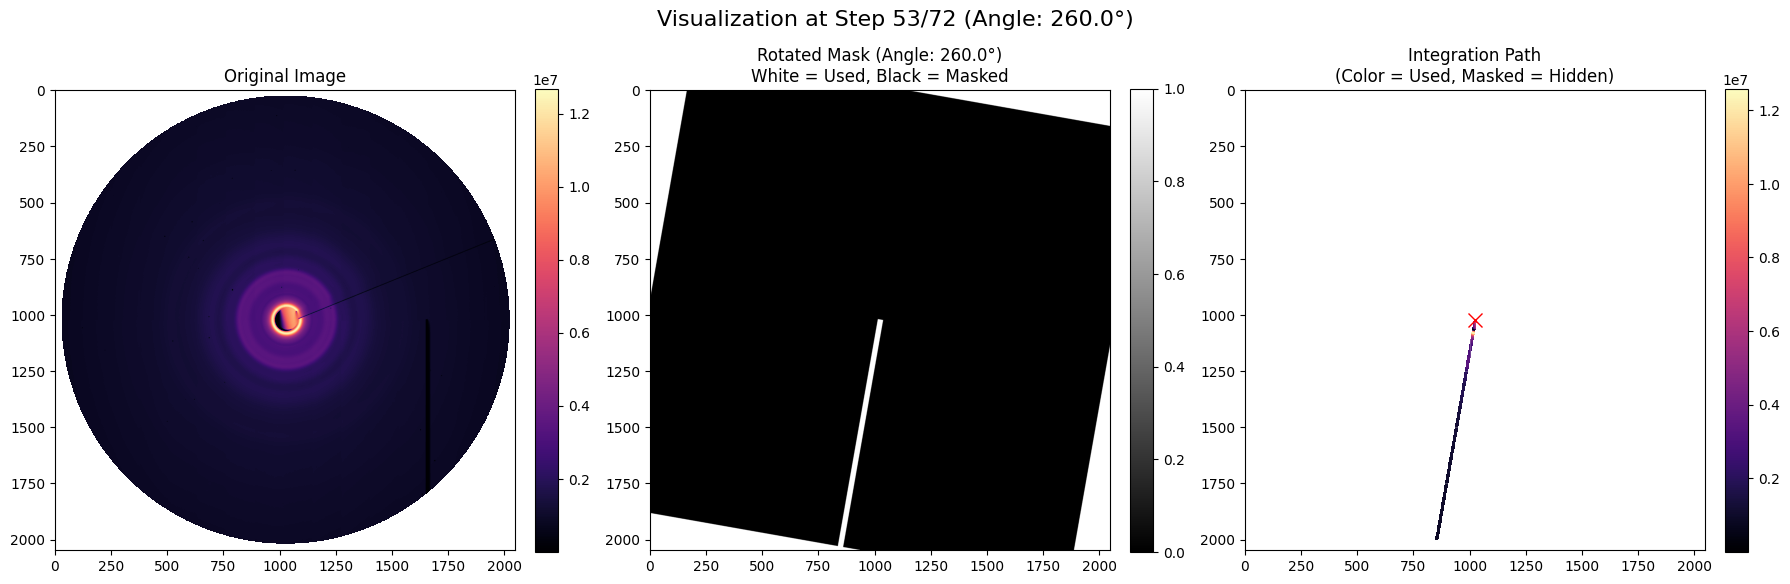


Processing angle 54/72: 265.000 degrees

Processing angle 55/72: 270.000 degrees

Processing angle 56/72: 275.000 degrees
Completed 56/72 integrations (77.8%)

Processing angle 57/72: 280.000 degrees


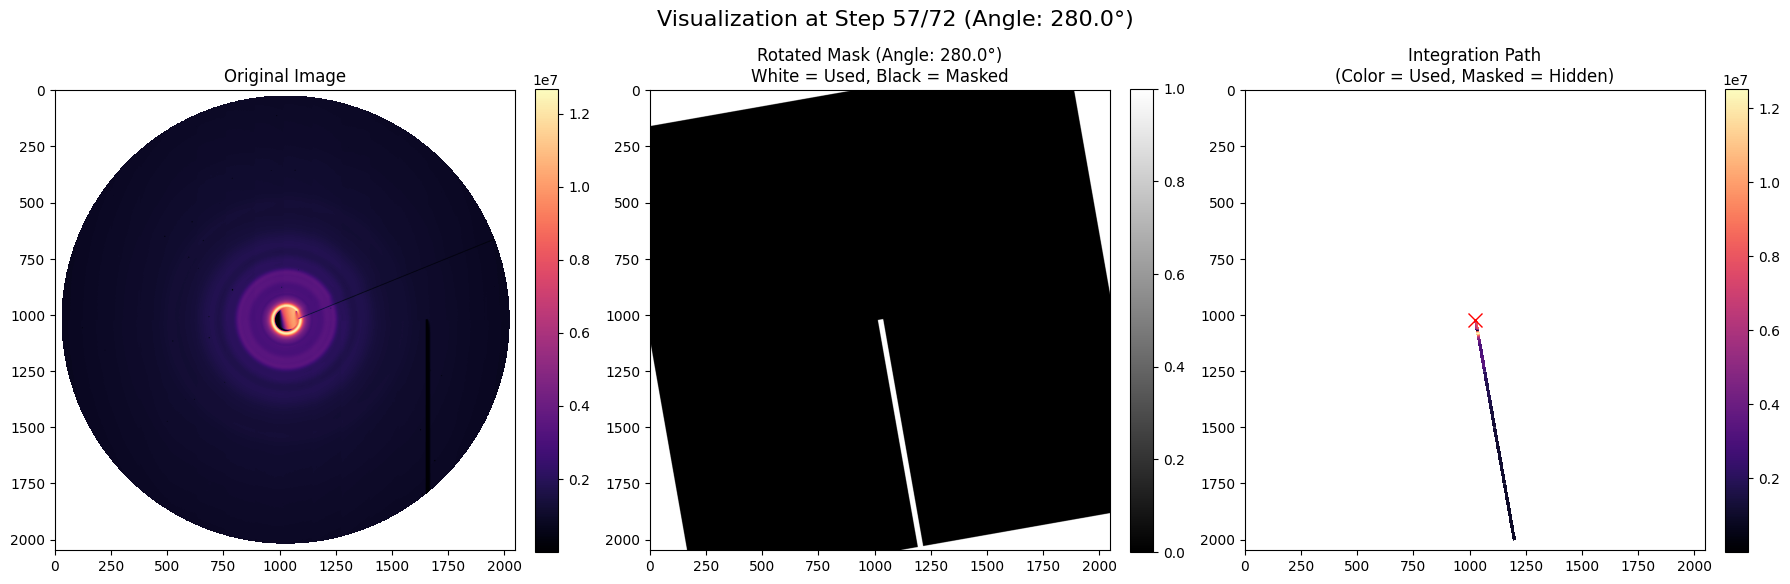


Processing angle 58/72: 285.000 degrees

Processing angle 59/72: 290.000 degrees

Processing angle 60/72: 295.000 degrees

Processing angle 61/72: 300.000 degrees


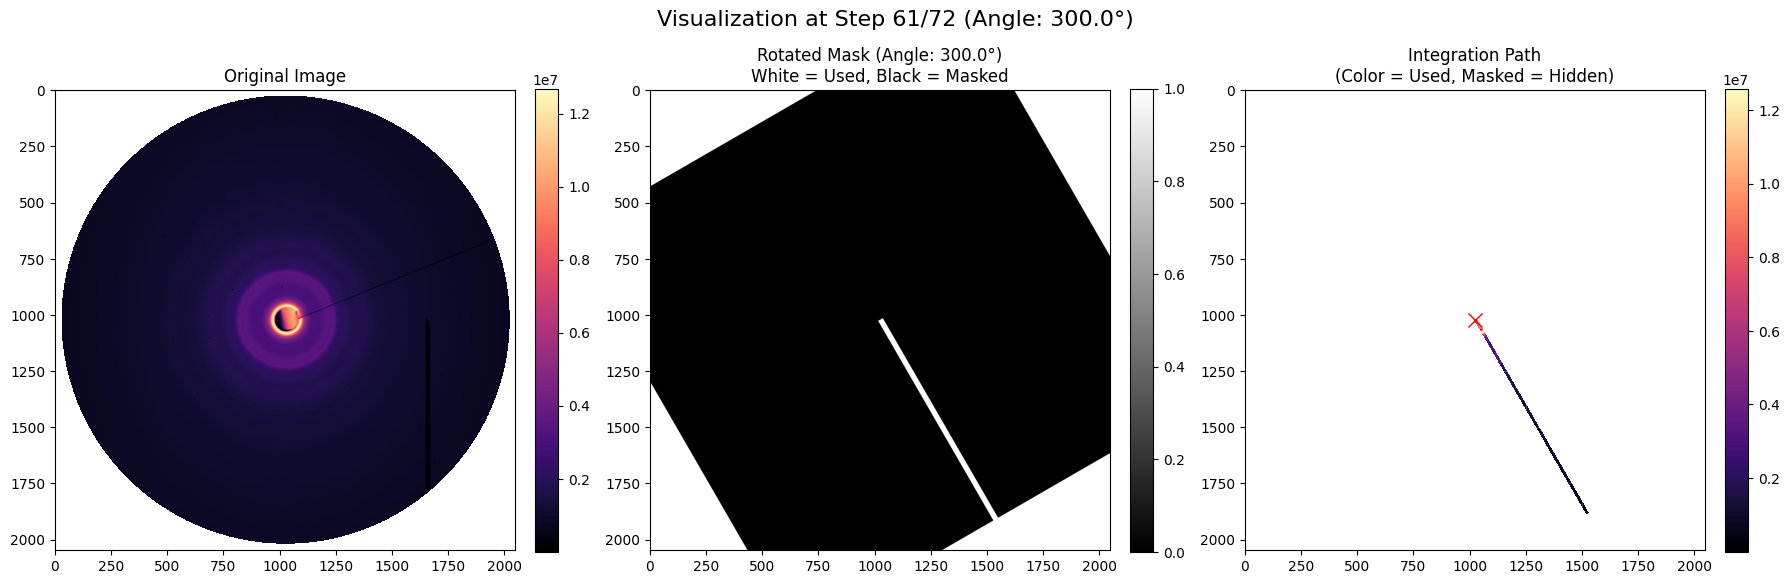


Processing angle 62/72: 305.000 degrees

Processing angle 63/72: 310.000 degrees
Completed 63/72 integrations (87.5%)

Processing angle 64/72: 315.000 degrees

Processing angle 65/72: 320.000 degrees


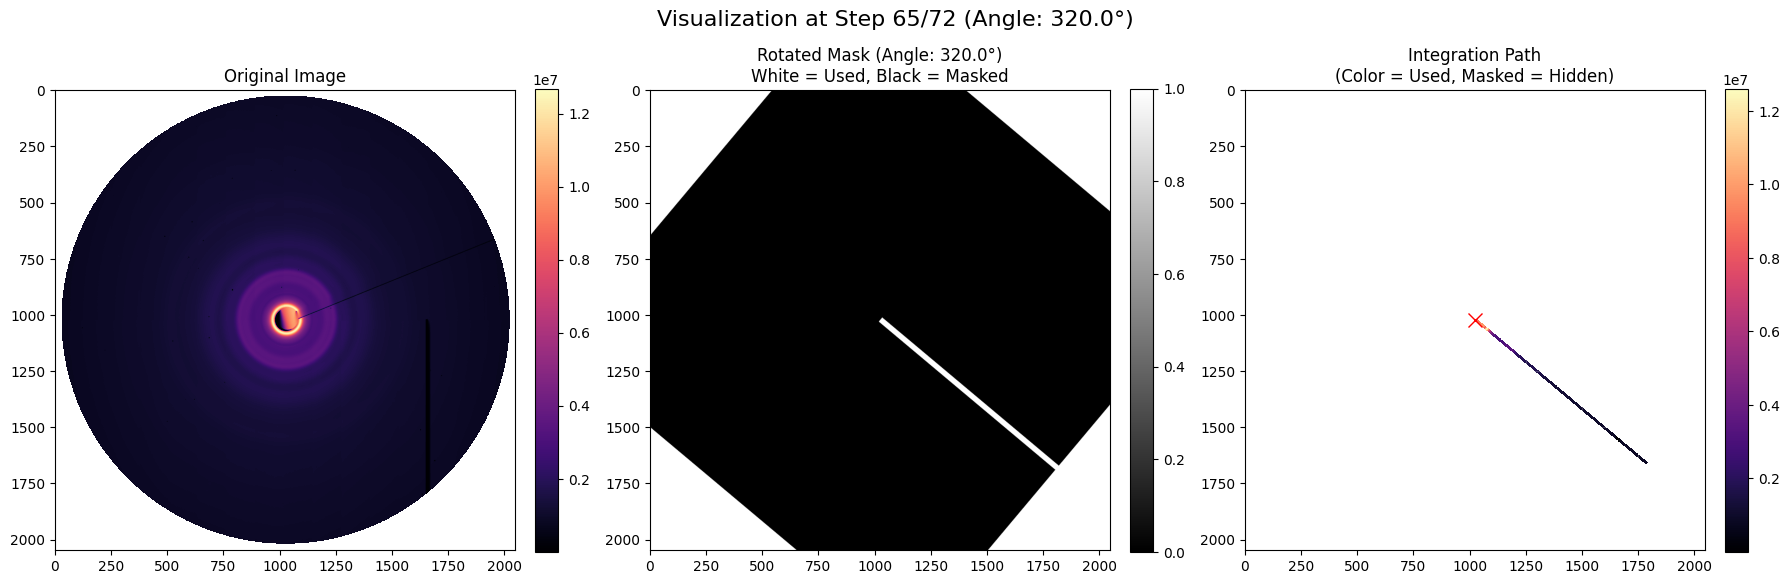


Processing angle 66/72: 325.000 degrees

Processing angle 67/72: 330.000 degrees

Processing angle 68/72: 335.000 degrees

Processing angle 69/72: 340.000 degrees


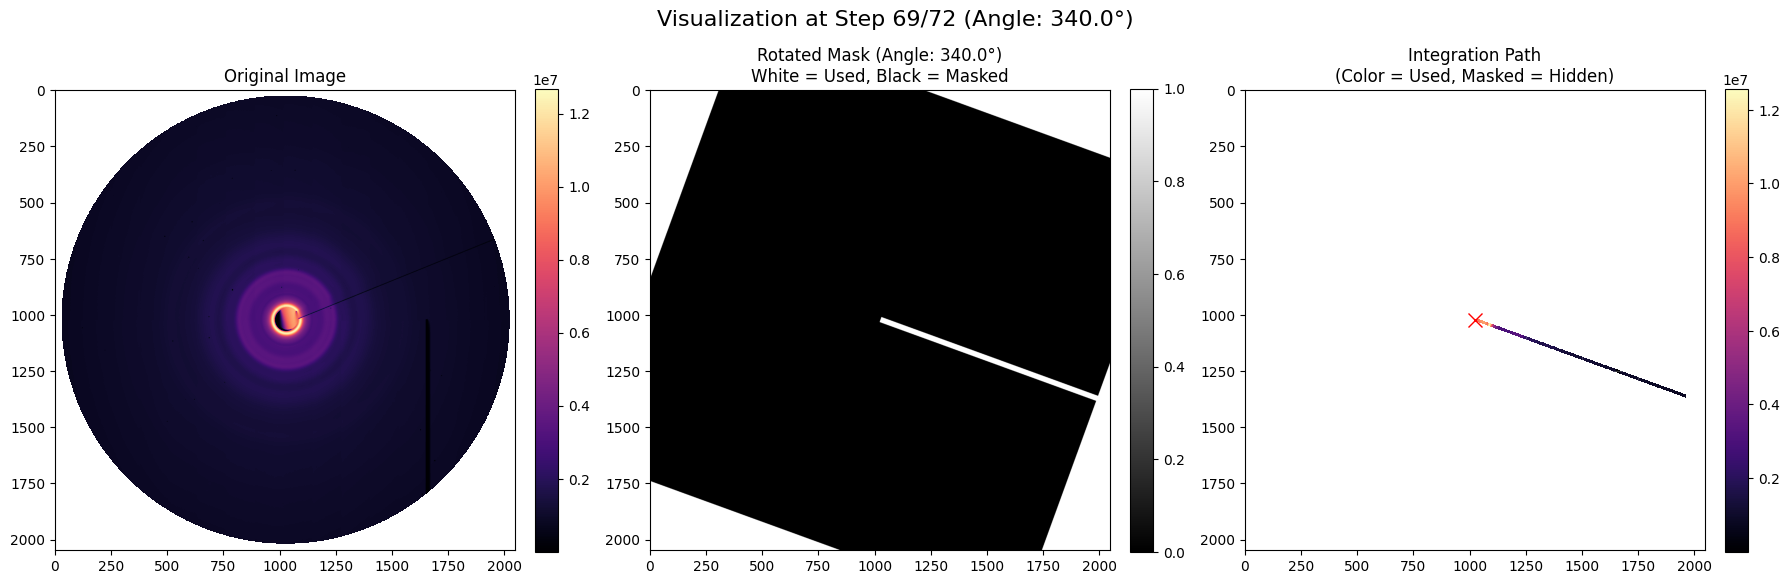


Processing angle 70/72: 345.000 degrees
Completed 70/72 integrations (97.2%)

Processing angle 71/72: 350.000 degrees

Processing angle 72/72: 355.000 degrees


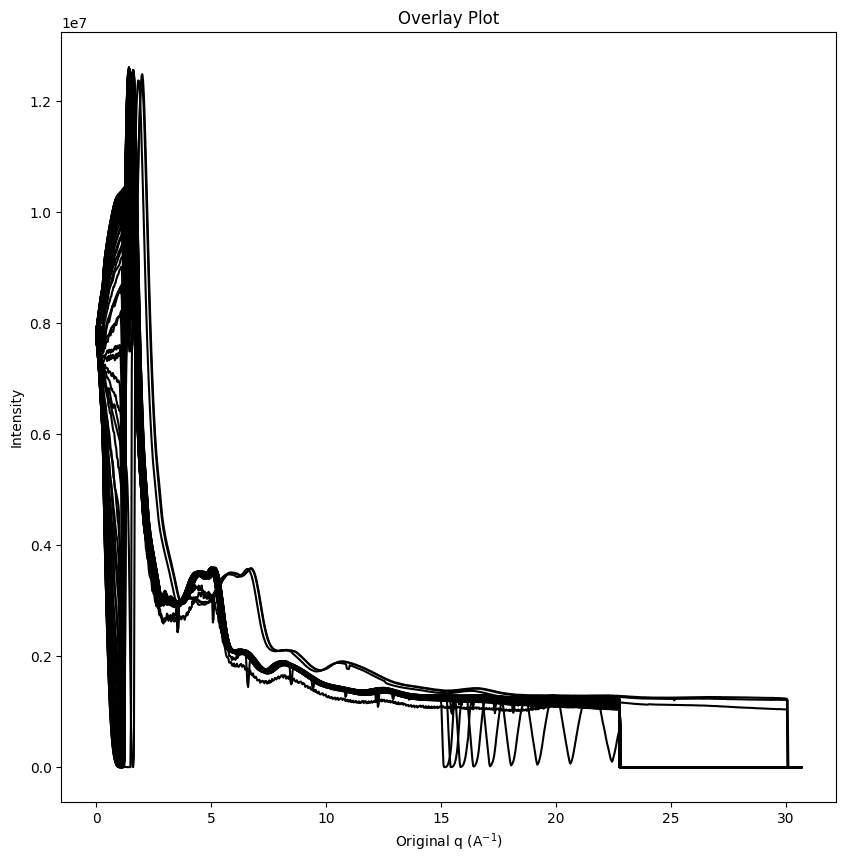

In [9]:
q, cryst_C_GST_SiO2_TM_mask_fill = sim.rotate_and_integrate_mask_printout(tm_circle_filled, 5, .41794313, 1.22224e-11, resolution = 1000, mask = mask_12, intermediate_steps = 18)

Starting rotate_and_integrate function
Will show visualizations every 12 steps

Processing angle 1/120: 0.000 degrees


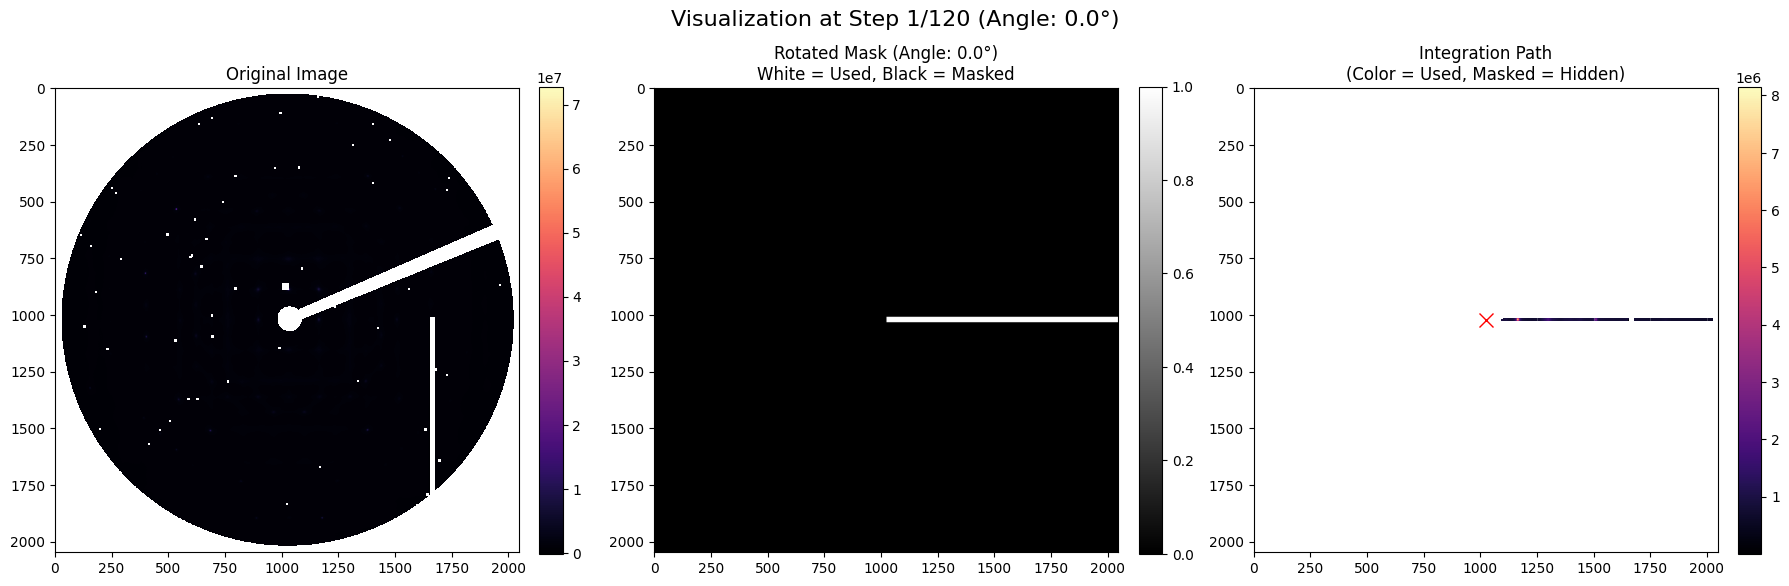


Processing angle 2/120: 3.000 degrees

Processing angle 3/120: 6.000 degrees

Processing angle 4/120: 9.000 degrees

Processing angle 5/120: 12.000 degrees

Processing angle 6/120: 15.000 degrees

Processing angle 7/120: 18.000 degrees

Processing angle 8/120: 21.000 degrees

Processing angle 9/120: 24.000 degrees

Processing angle 10/120: 27.000 degrees

Processing angle 11/120: 30.000 degrees

Processing angle 12/120: 33.000 degrees
Completed 12/120 integrations (10.0%)

Processing angle 13/120: 36.000 degrees


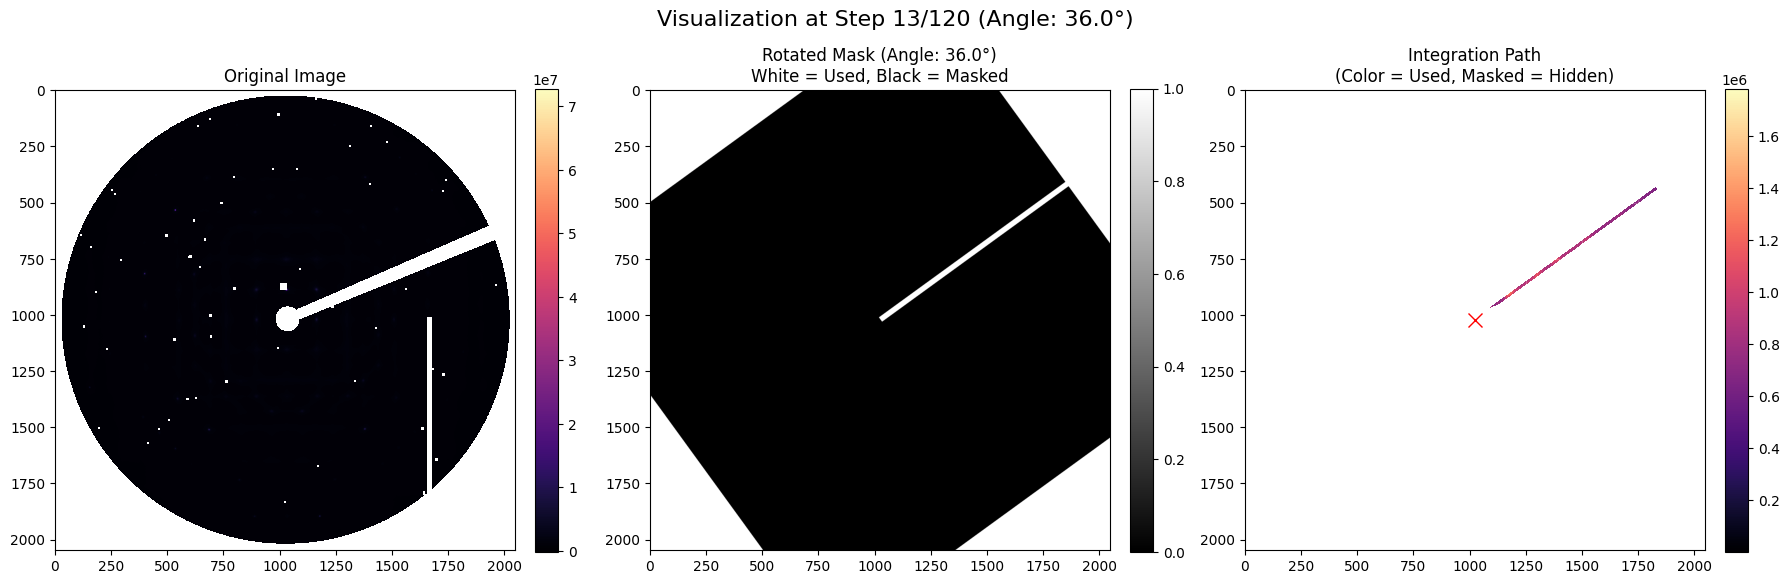


Processing angle 14/120: 39.000 degrees

Processing angle 15/120: 42.000 degrees

Processing angle 16/120: 45.000 degrees

Processing angle 17/120: 48.000 degrees

Processing angle 18/120: 51.000 degrees

Processing angle 19/120: 54.000 degrees

Processing angle 20/120: 57.000 degrees

Processing angle 21/120: 60.000 degrees

Processing angle 22/120: 63.000 degrees

Processing angle 23/120: 66.000 degrees

Processing angle 24/120: 69.000 degrees
Completed 24/120 integrations (20.0%)

Processing angle 25/120: 72.000 degrees


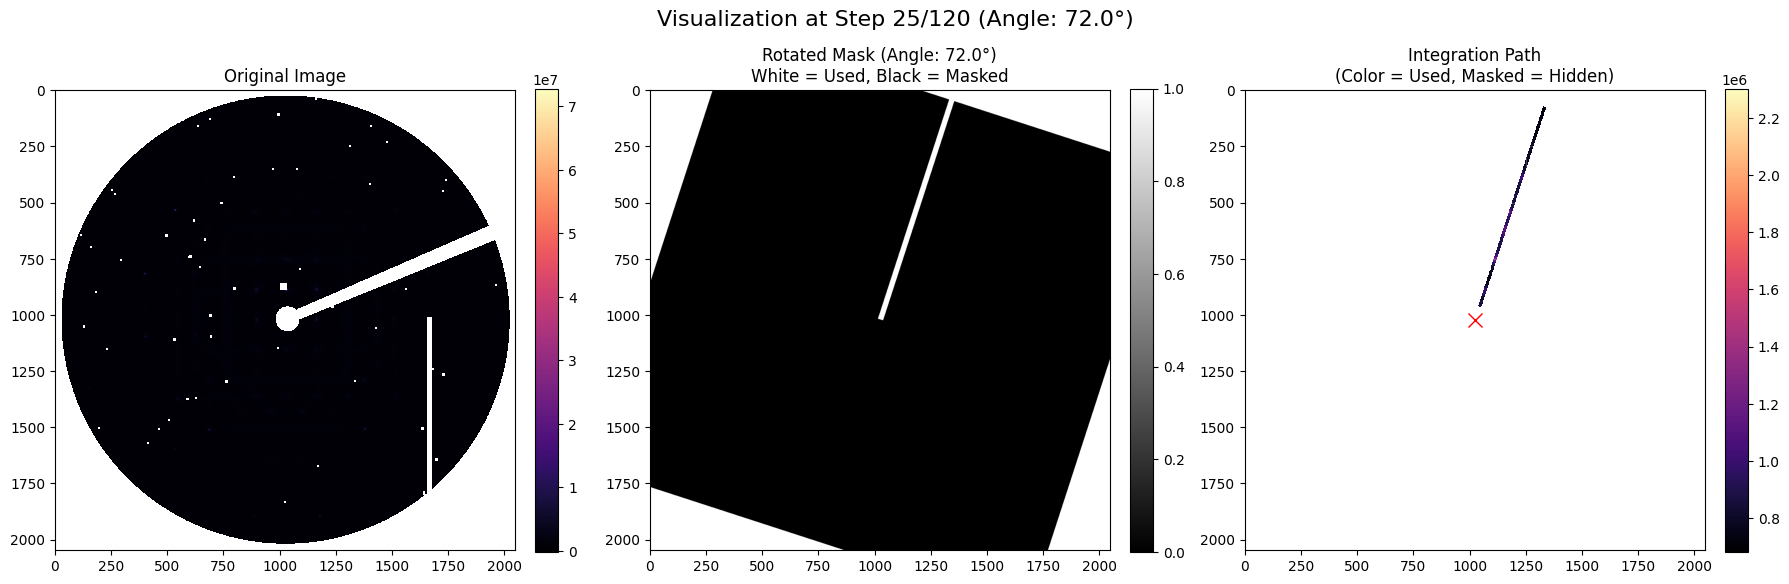


Processing angle 26/120: 75.000 degrees

Processing angle 27/120: 78.000 degrees

Processing angle 28/120: 81.000 degrees

Processing angle 29/120: 84.000 degrees

Processing angle 30/120: 87.000 degrees

Processing angle 31/120: 90.000 degrees

Processing angle 32/120: 93.000 degrees

Processing angle 33/120: 96.000 degrees

Processing angle 34/120: 99.000 degrees

Processing angle 35/120: 102.000 degrees

Processing angle 36/120: 105.000 degrees
Completed 36/120 integrations (30.0%)

Processing angle 37/120: 108.000 degrees


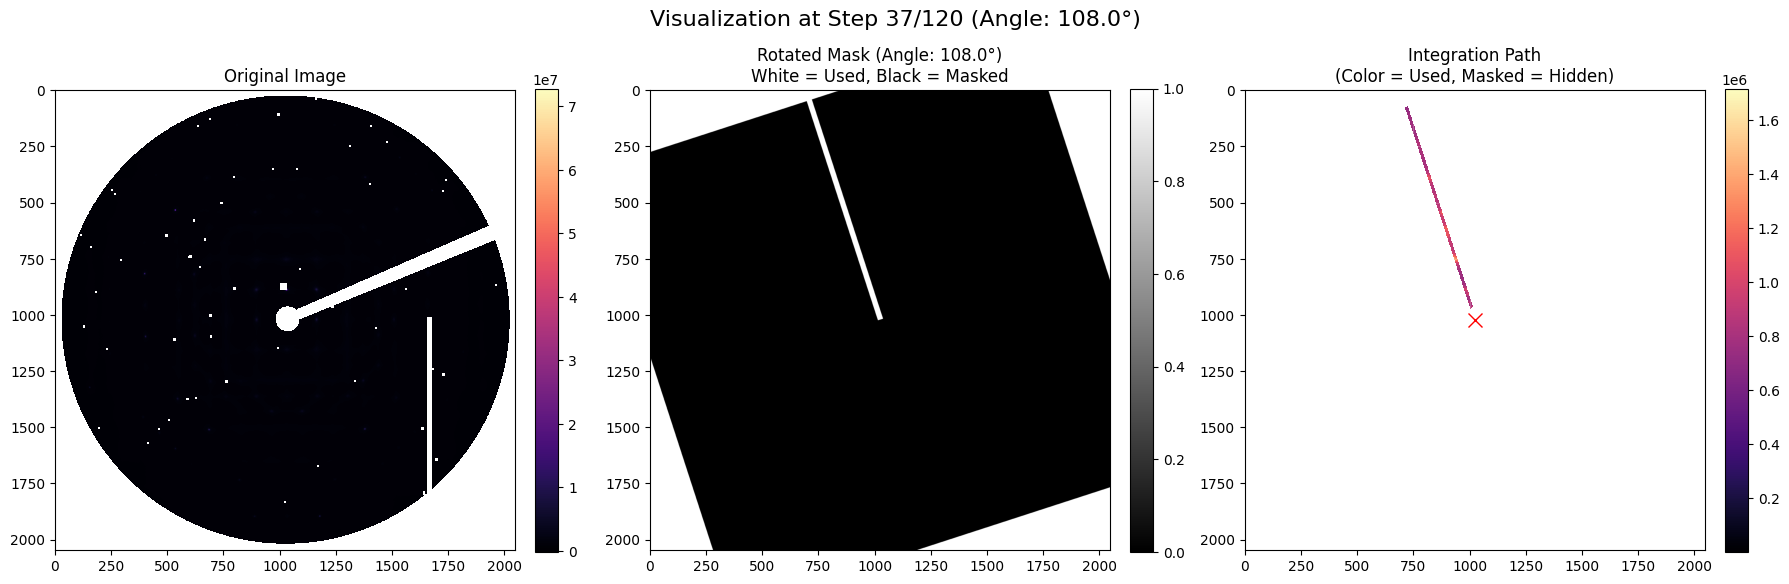


Processing angle 38/120: 111.000 degrees

Processing angle 39/120: 114.000 degrees

Processing angle 40/120: 117.000 degrees

Processing angle 41/120: 120.000 degrees

Processing angle 42/120: 123.000 degrees

Processing angle 43/120: 126.000 degrees

Processing angle 44/120: 129.000 degrees

Processing angle 45/120: 132.000 degrees

Processing angle 46/120: 135.000 degrees

Processing angle 47/120: 138.000 degrees

Processing angle 48/120: 141.000 degrees
Completed 48/120 integrations (40.0%)

Processing angle 49/120: 144.000 degrees


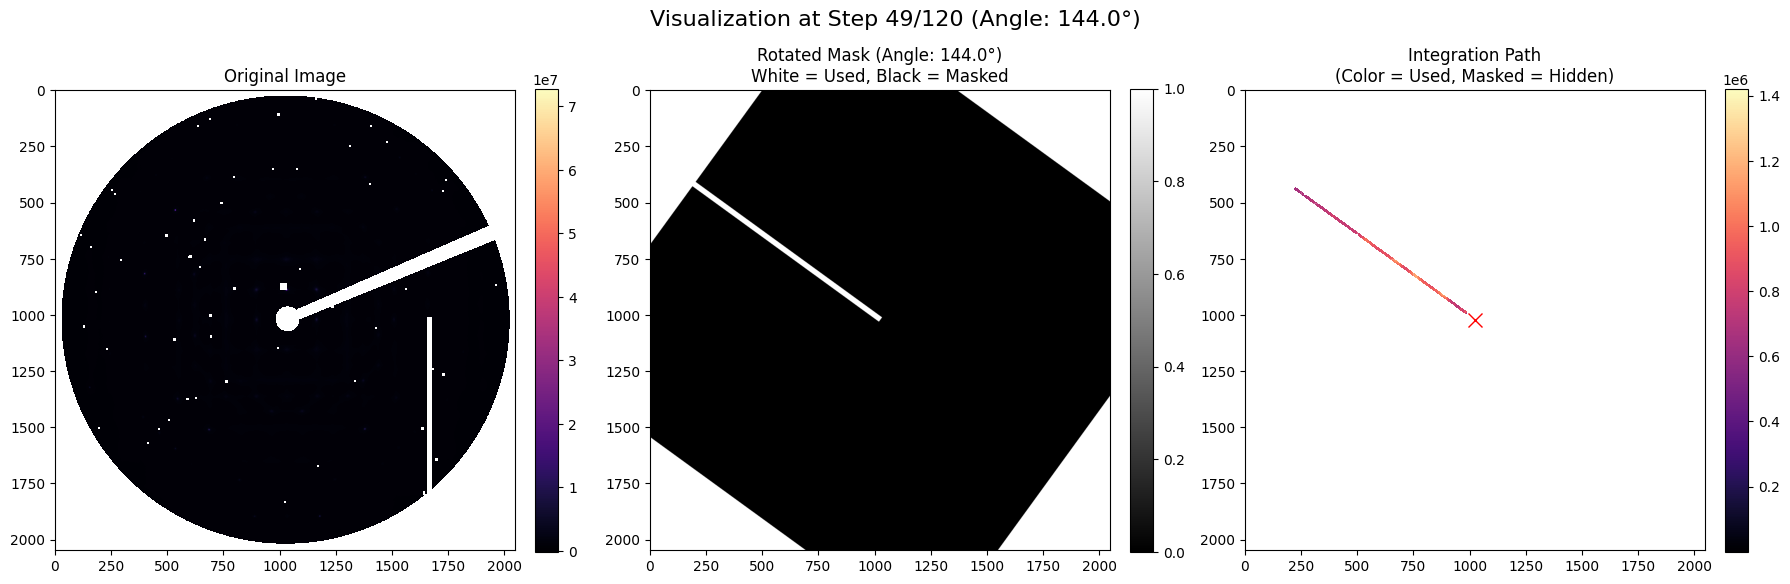


Processing angle 50/120: 147.000 degrees

Processing angle 51/120: 150.000 degrees

Processing angle 52/120: 153.000 degrees

Processing angle 53/120: 156.000 degrees

Processing angle 54/120: 159.000 degrees

Processing angle 55/120: 162.000 degrees

Processing angle 56/120: 165.000 degrees

Processing angle 57/120: 168.000 degrees

Processing angle 58/120: 171.000 degrees

Processing angle 59/120: 174.000 degrees

Processing angle 60/120: 177.000 degrees
Completed 60/120 integrations (50.0%)

Processing angle 61/120: 180.000 degrees


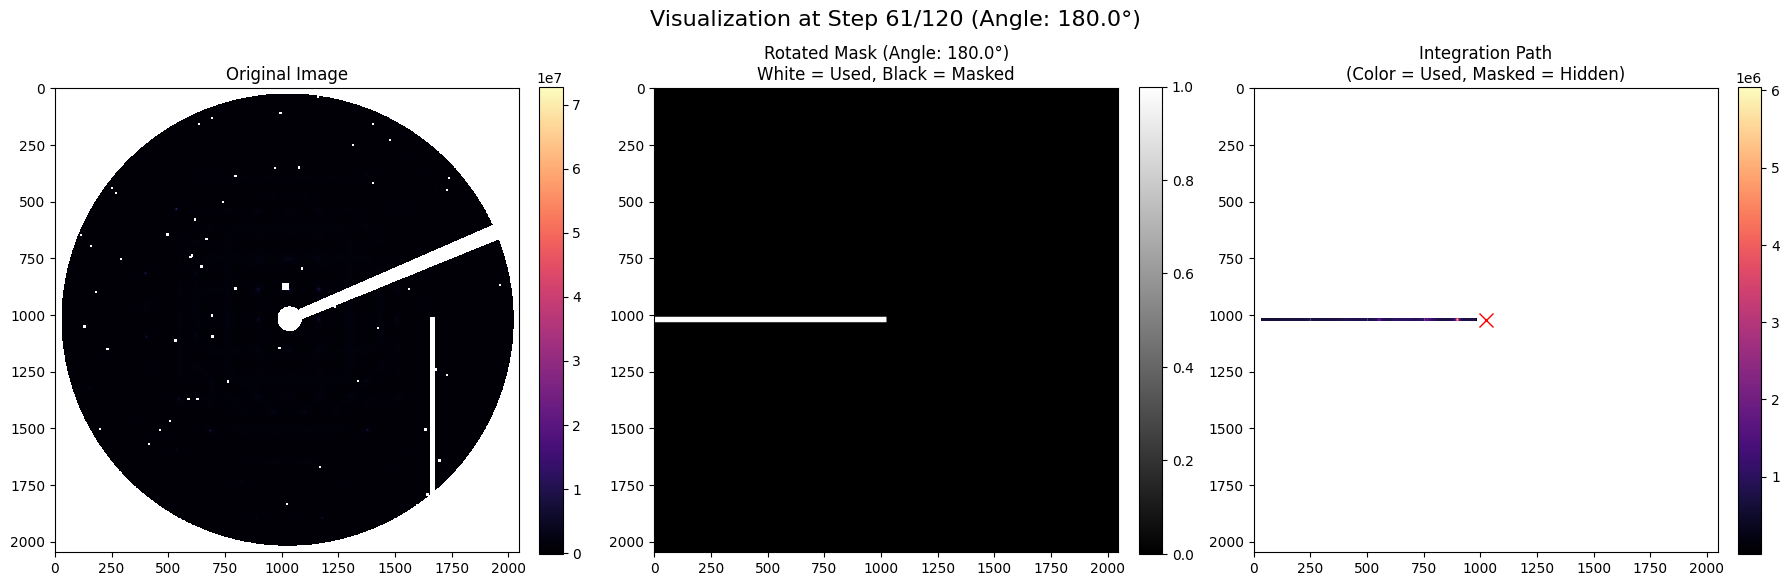


Processing angle 62/120: 183.000 degrees

Processing angle 63/120: 186.000 degrees

Processing angle 64/120: 189.000 degrees

Processing angle 65/120: 192.000 degrees

Processing angle 66/120: 195.000 degrees

Processing angle 67/120: 198.000 degrees

Processing angle 68/120: 201.000 degrees

Processing angle 69/120: 204.000 degrees

Processing angle 70/120: 207.000 degrees

Processing angle 71/120: 210.000 degrees

Processing angle 72/120: 213.000 degrees
Completed 72/120 integrations (60.0%)

Processing angle 73/120: 216.000 degrees


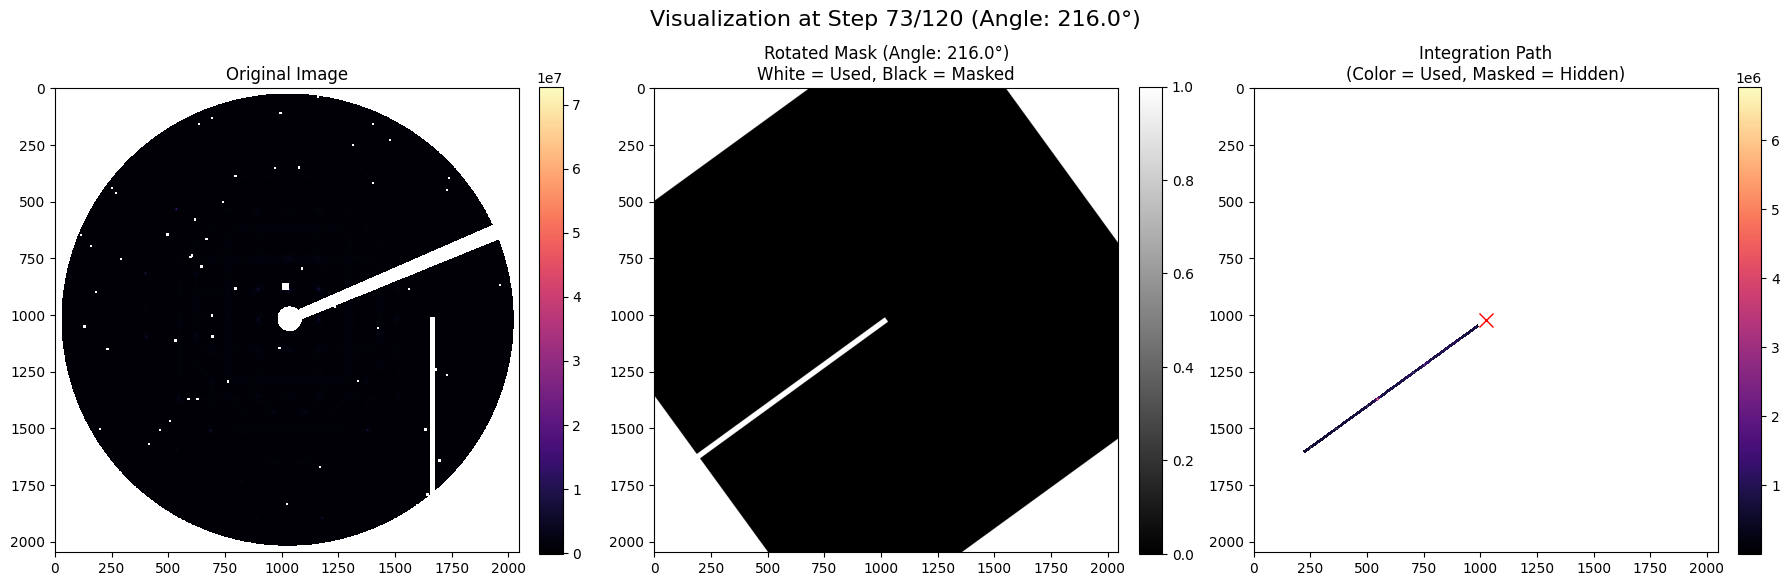


Processing angle 74/120: 219.000 degrees

Processing angle 75/120: 222.000 degrees

Processing angle 76/120: 225.000 degrees

Processing angle 77/120: 228.000 degrees

Processing angle 78/120: 231.000 degrees

Processing angle 79/120: 234.000 degrees

Processing angle 80/120: 237.000 degrees

Processing angle 81/120: 240.000 degrees

Processing angle 82/120: 243.000 degrees

Processing angle 83/120: 246.000 degrees

Processing angle 84/120: 249.000 degrees
Completed 84/120 integrations (70.0%)

Processing angle 85/120: 252.000 degrees


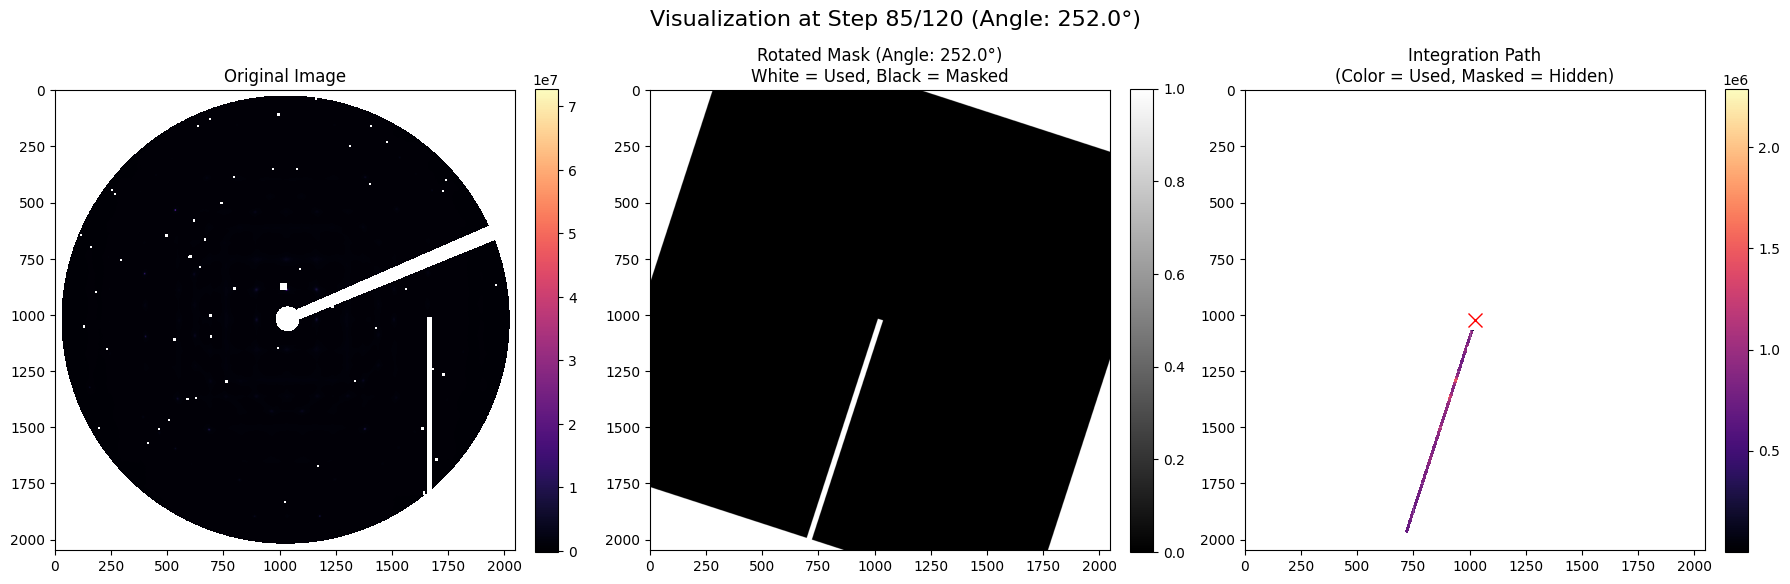


Processing angle 86/120: 255.000 degrees

Processing angle 87/120: 258.000 degrees

Processing angle 88/120: 261.000 degrees

Processing angle 89/120: 264.000 degrees

Processing angle 90/120: 267.000 degrees

Processing angle 91/120: 270.000 degrees

Processing angle 92/120: 273.000 degrees

Processing angle 93/120: 276.000 degrees

Processing angle 94/120: 279.000 degrees

Processing angle 95/120: 282.000 degrees

Processing angle 96/120: 285.000 degrees
Completed 96/120 integrations (80.0%)

Processing angle 97/120: 288.000 degrees


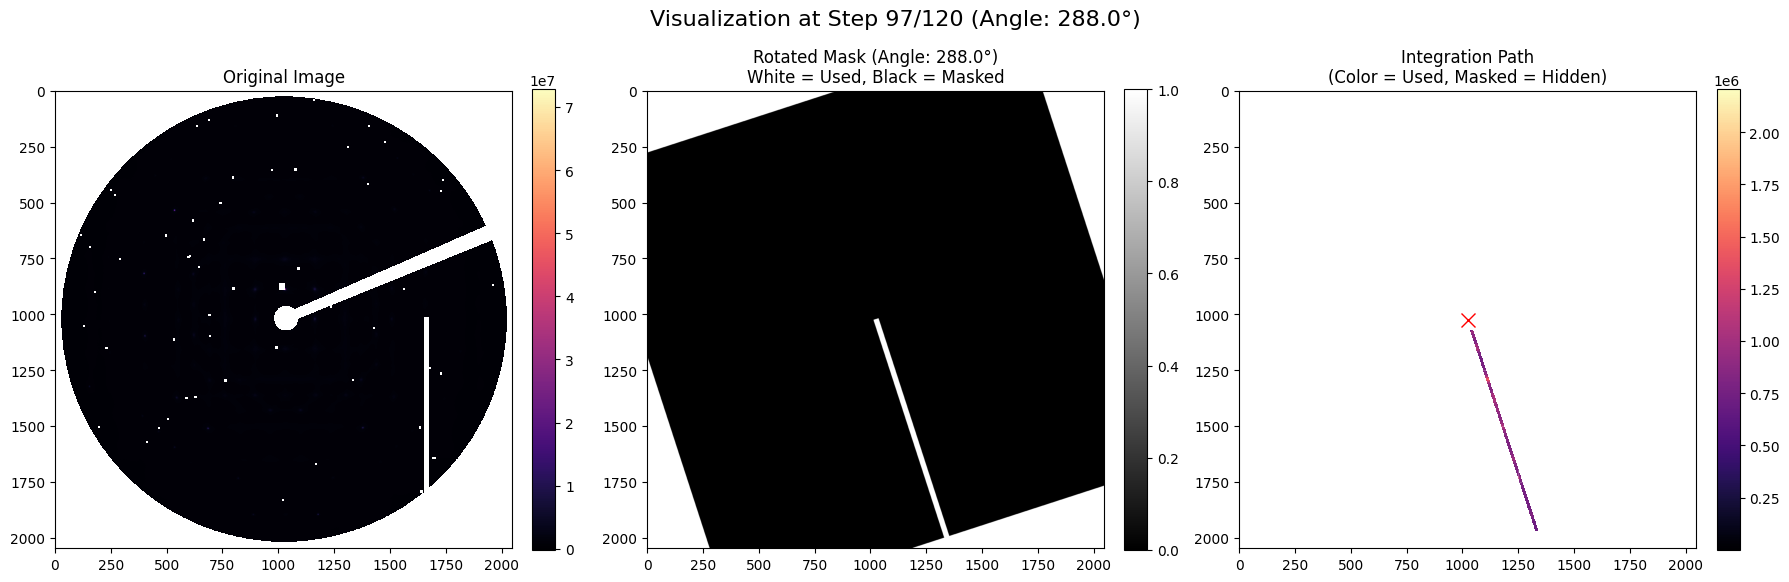


Processing angle 98/120: 291.000 degrees

Processing angle 99/120: 294.000 degrees

Processing angle 100/120: 297.000 degrees

Processing angle 101/120: 300.000 degrees

Processing angle 102/120: 303.000 degrees

Processing angle 103/120: 306.000 degrees

Processing angle 104/120: 309.000 degrees

Processing angle 105/120: 312.000 degrees

Processing angle 106/120: 315.000 degrees

Processing angle 107/120: 318.000 degrees

Processing angle 108/120: 321.000 degrees
Completed 108/120 integrations (90.0%)

Processing angle 109/120: 324.000 degrees


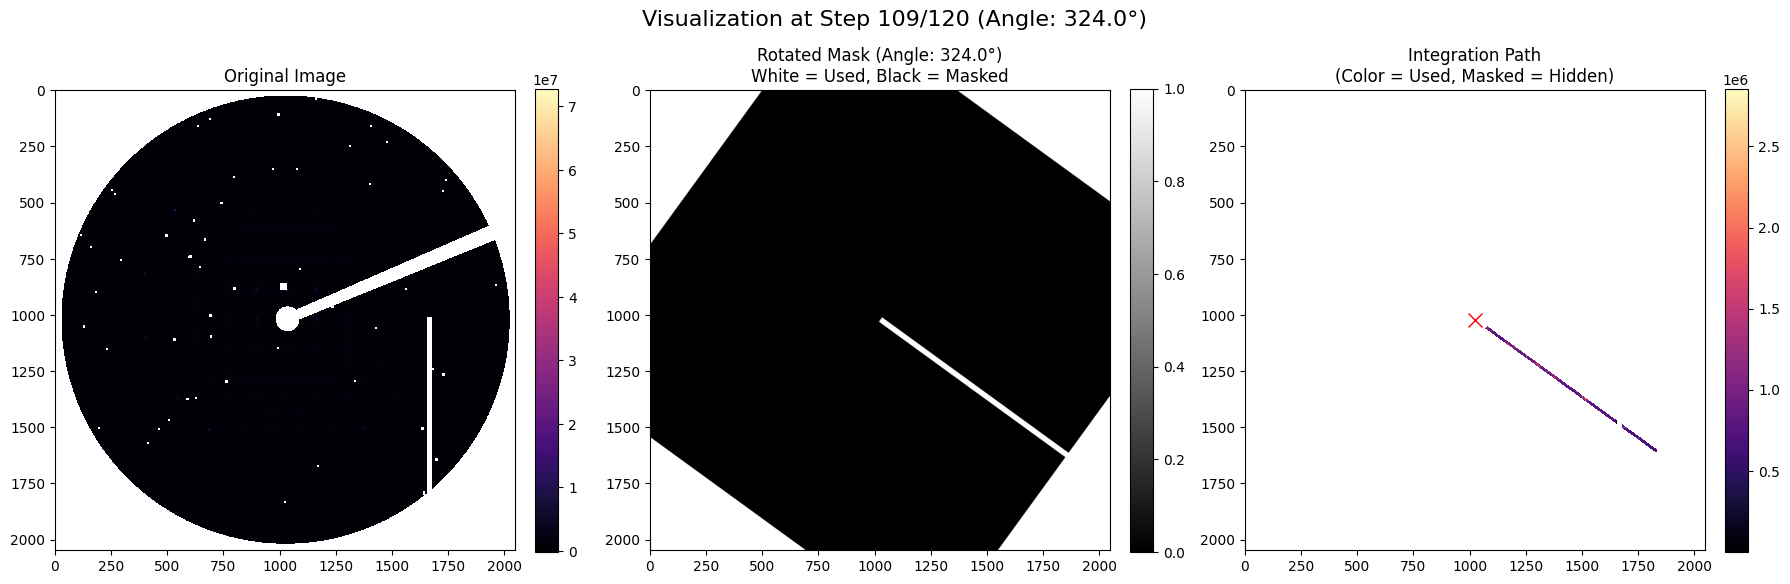


Processing angle 110/120: 327.000 degrees

Processing angle 111/120: 330.000 degrees

Processing angle 112/120: 333.000 degrees

Processing angle 113/120: 336.000 degrees

Processing angle 114/120: 339.000 degrees

Processing angle 115/120: 342.000 degrees

Processing angle 116/120: 345.000 degrees

Processing angle 117/120: 348.000 degrees

Processing angle 118/120: 351.000 degrees

Processing angle 119/120: 354.000 degrees

Processing angle 120/120: 357.000 degrees
Completed 120/120 integrations (100.0%)


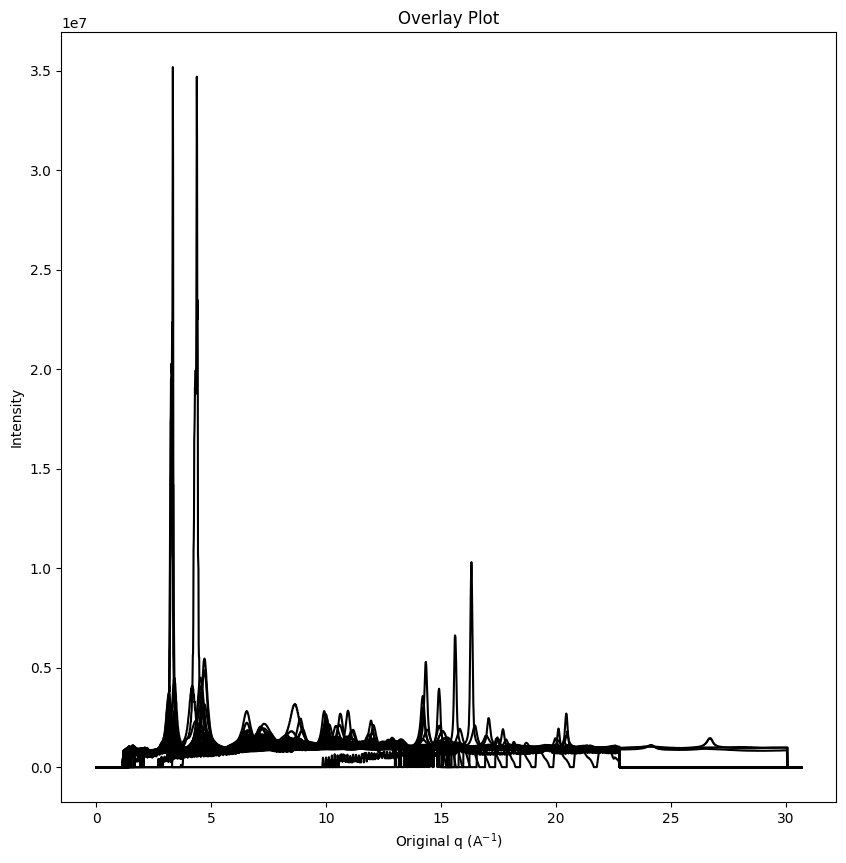

In [15]:
q, cryst_C_GST_Si_TM_mask = sim.rotate_and_integrate_mask_printout(tm_circle_sc, 3, .41794313, 1.22224e-11, resolution = 3000, mask = mask_12, intermediate_steps = 10)

Starting rotate_and_integrate function
Will show visualizations every 12 steps

Processing angle 1/120: 0.000 degrees


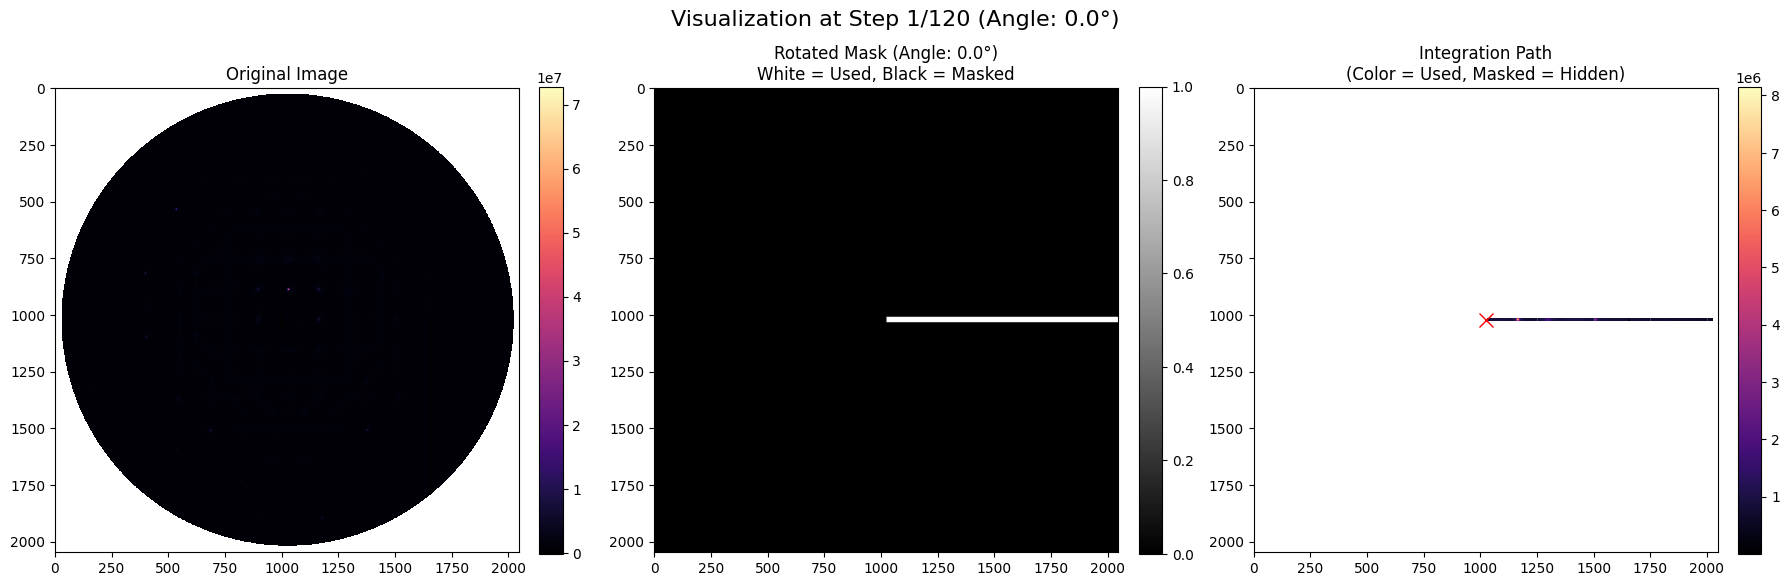


Processing angle 2/120: 3.000 degrees

Processing angle 3/120: 6.000 degrees

Processing angle 4/120: 9.000 degrees

Processing angle 5/120: 12.000 degrees

Processing angle 6/120: 15.000 degrees

Processing angle 7/120: 18.000 degrees

Processing angle 8/120: 21.000 degrees

Processing angle 9/120: 24.000 degrees

Processing angle 10/120: 27.000 degrees

Processing angle 11/120: 30.000 degrees

Processing angle 12/120: 33.000 degrees
Completed 12/120 integrations (10.0%)

Processing angle 13/120: 36.000 degrees


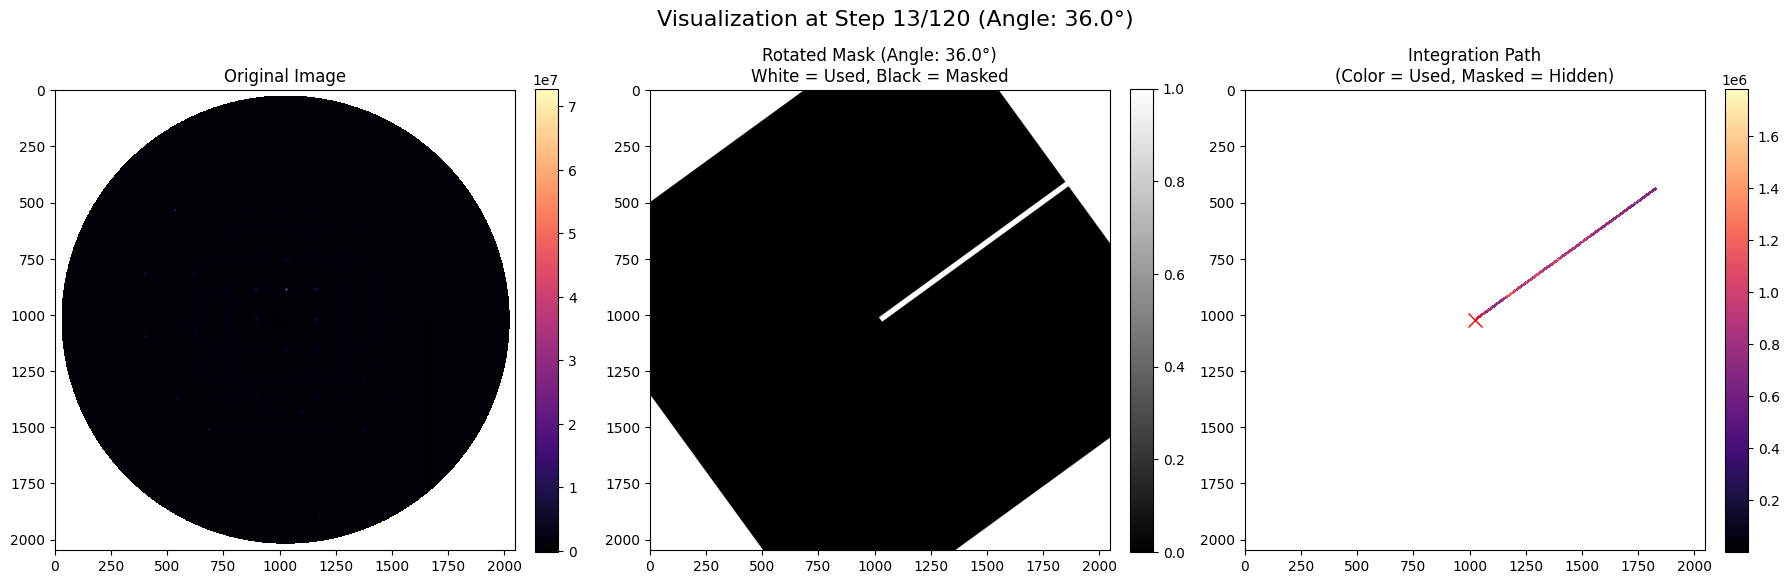


Processing angle 14/120: 39.000 degrees

Processing angle 15/120: 42.000 degrees

Processing angle 16/120: 45.000 degrees

Processing angle 17/120: 48.000 degrees

Processing angle 18/120: 51.000 degrees

Processing angle 19/120: 54.000 degrees

Processing angle 20/120: 57.000 degrees

Processing angle 21/120: 60.000 degrees

Processing angle 22/120: 63.000 degrees

Processing angle 23/120: 66.000 degrees

Processing angle 24/120: 69.000 degrees
Completed 24/120 integrations (20.0%)

Processing angle 25/120: 72.000 degrees


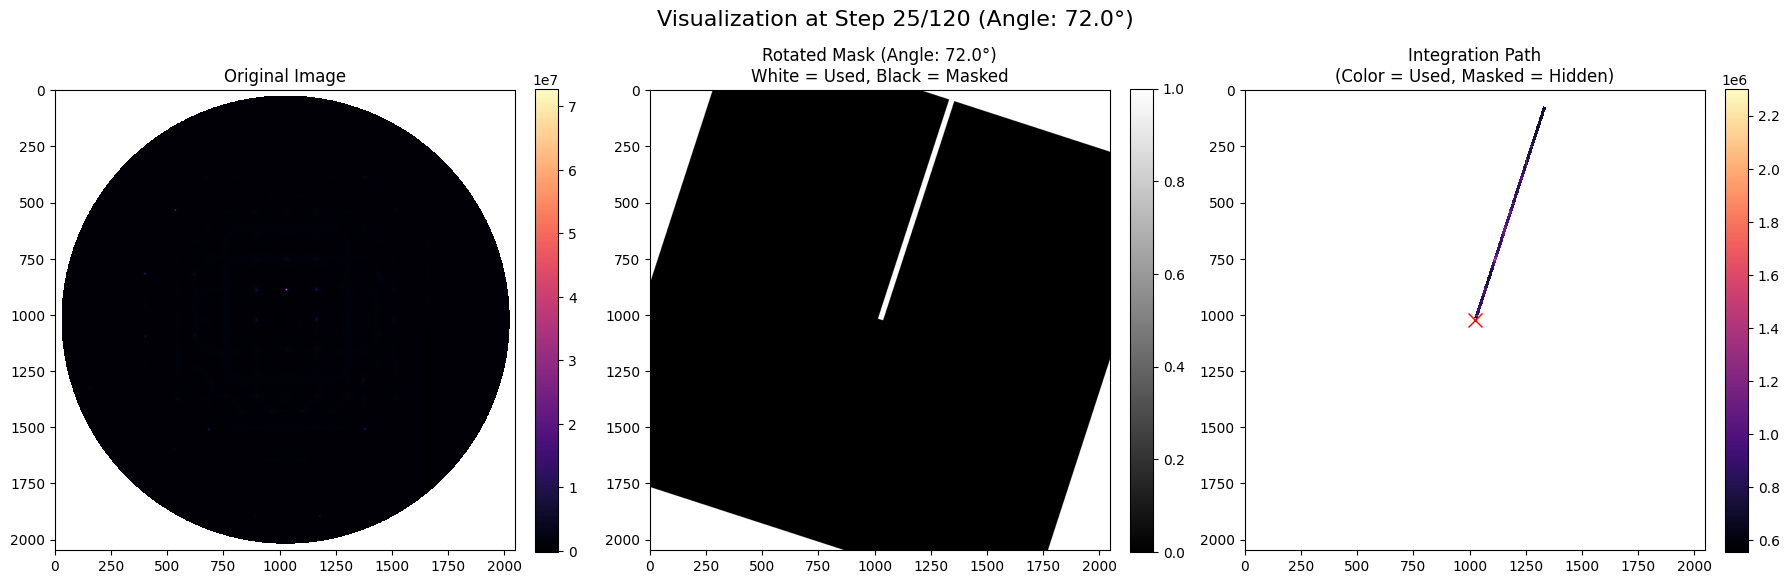


Processing angle 26/120: 75.000 degrees

Processing angle 27/120: 78.000 degrees

Processing angle 28/120: 81.000 degrees

Processing angle 29/120: 84.000 degrees

Processing angle 30/120: 87.000 degrees

Processing angle 31/120: 90.000 degrees

Processing angle 32/120: 93.000 degrees

Processing angle 33/120: 96.000 degrees

Processing angle 34/120: 99.000 degrees

Processing angle 35/120: 102.000 degrees

Processing angle 36/120: 105.000 degrees
Completed 36/120 integrations (30.0%)

Processing angle 37/120: 108.000 degrees


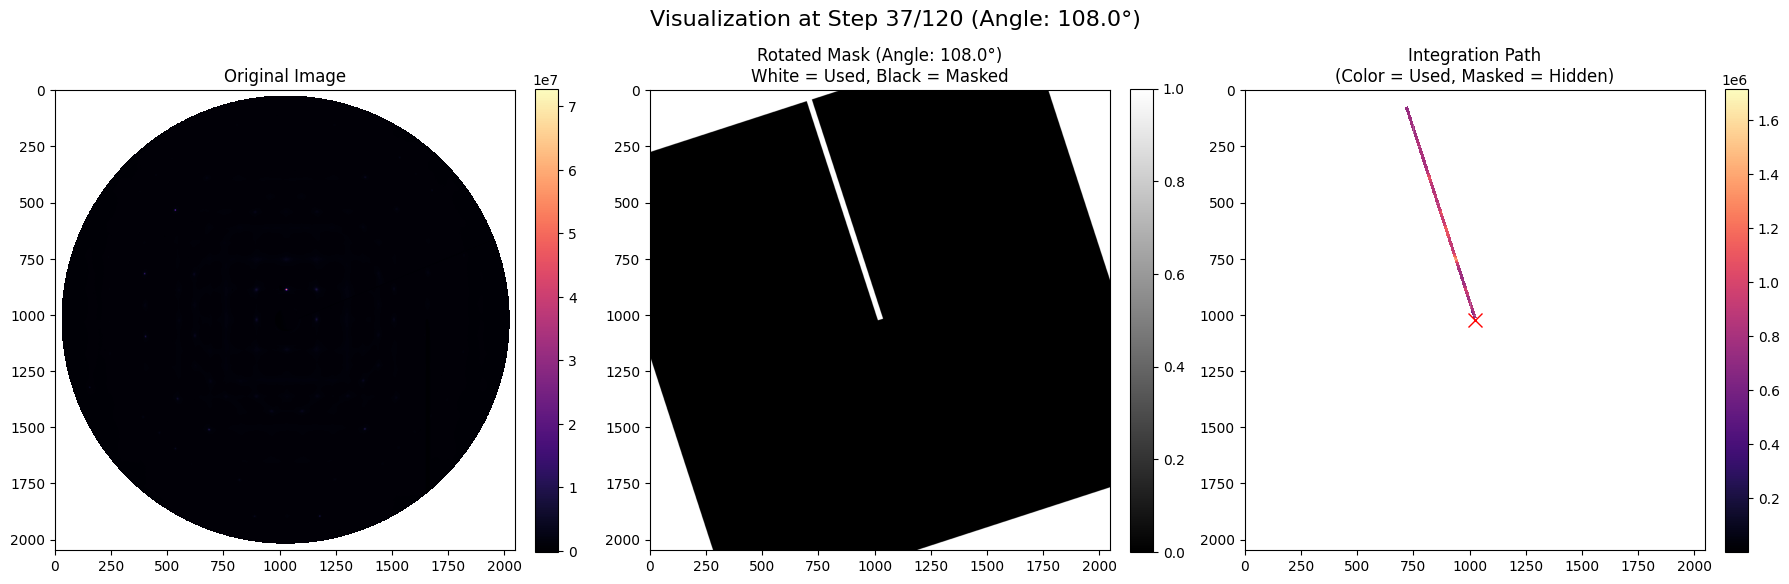


Processing angle 38/120: 111.000 degrees

Processing angle 39/120: 114.000 degrees

Processing angle 40/120: 117.000 degrees

Processing angle 41/120: 120.000 degrees

Processing angle 42/120: 123.000 degrees

Processing angle 43/120: 126.000 degrees

Processing angle 44/120: 129.000 degrees

Processing angle 45/120: 132.000 degrees

Processing angle 46/120: 135.000 degrees

Processing angle 47/120: 138.000 degrees

Processing angle 48/120: 141.000 degrees
Completed 48/120 integrations (40.0%)

Processing angle 49/120: 144.000 degrees


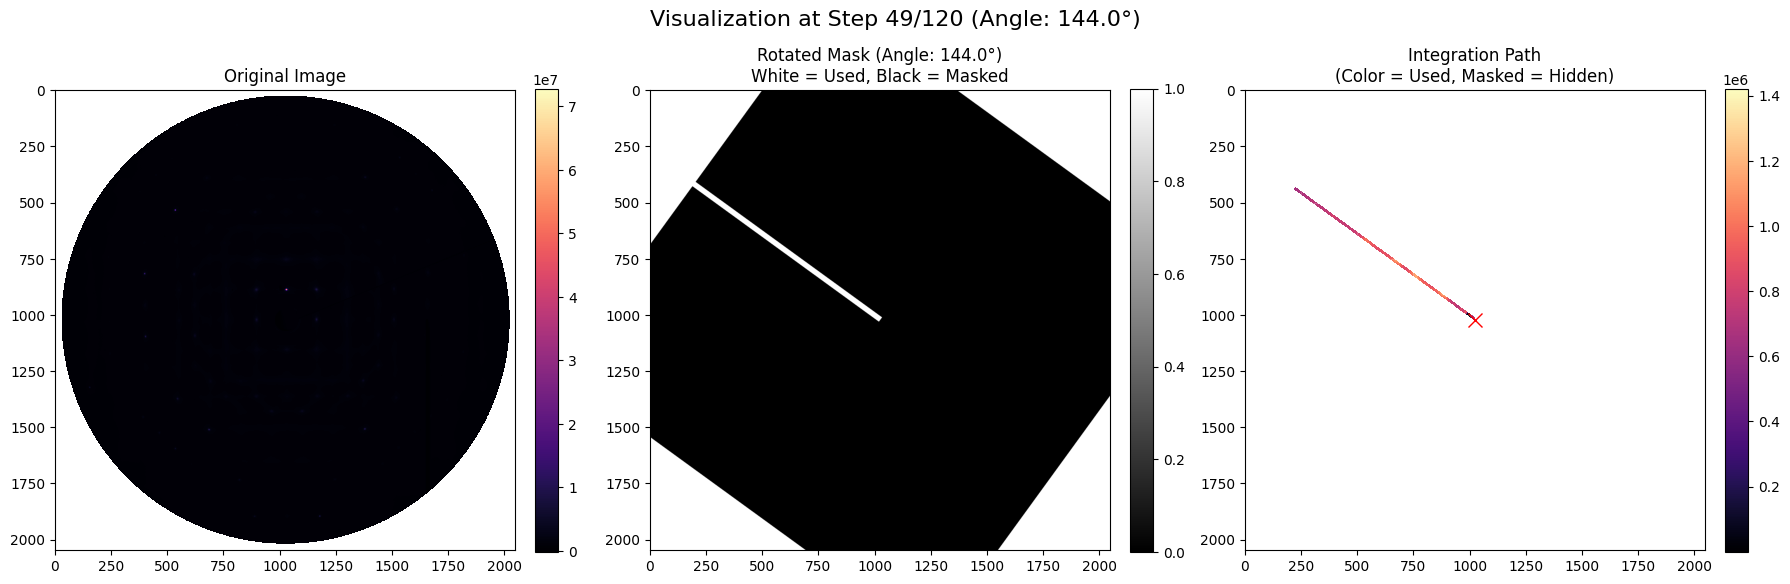


Processing angle 50/120: 147.000 degrees

Processing angle 51/120: 150.000 degrees

Processing angle 52/120: 153.000 degrees

Processing angle 53/120: 156.000 degrees

Processing angle 54/120: 159.000 degrees

Processing angle 55/120: 162.000 degrees

Processing angle 56/120: 165.000 degrees

Processing angle 57/120: 168.000 degrees

Processing angle 58/120: 171.000 degrees

Processing angle 59/120: 174.000 degrees

Processing angle 60/120: 177.000 degrees
Completed 60/120 integrations (50.0%)

Processing angle 61/120: 180.000 degrees


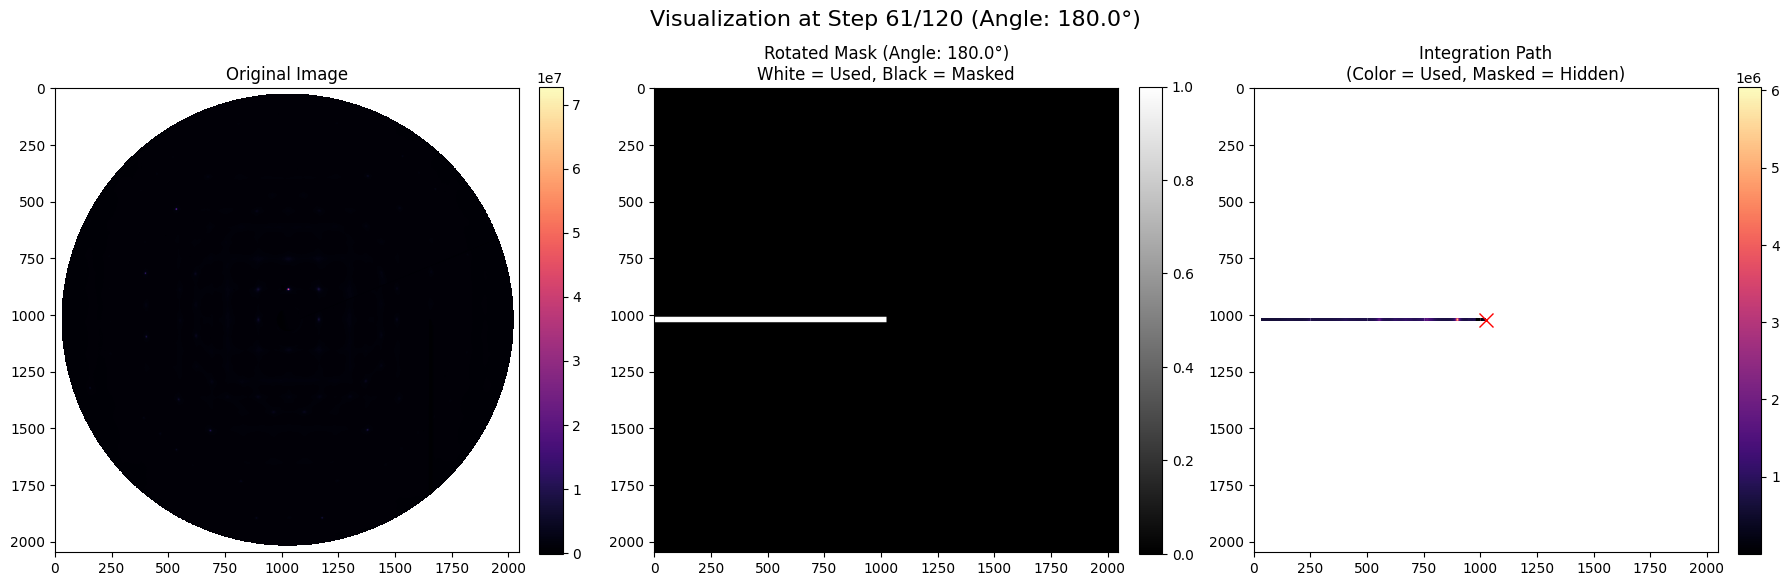


Processing angle 62/120: 183.000 degrees

Processing angle 63/120: 186.000 degrees

Processing angle 64/120: 189.000 degrees

Processing angle 65/120: 192.000 degrees

Processing angle 66/120: 195.000 degrees

Processing angle 67/120: 198.000 degrees

Processing angle 68/120: 201.000 degrees

Processing angle 69/120: 204.000 degrees

Processing angle 70/120: 207.000 degrees

Processing angle 71/120: 210.000 degrees

Processing angle 72/120: 213.000 degrees
Completed 72/120 integrations (60.0%)

Processing angle 73/120: 216.000 degrees


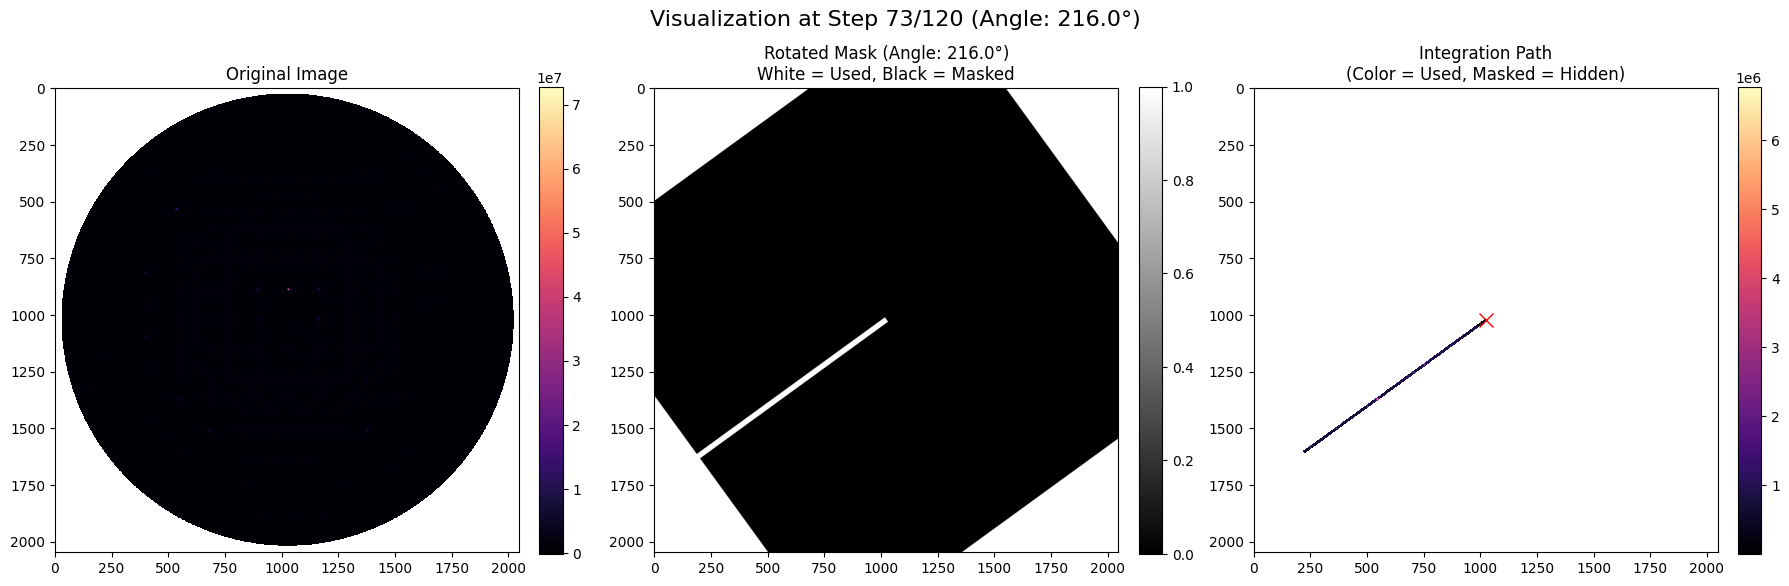


Processing angle 74/120: 219.000 degrees

Processing angle 75/120: 222.000 degrees

Processing angle 76/120: 225.000 degrees

Processing angle 77/120: 228.000 degrees

Processing angle 78/120: 231.000 degrees

Processing angle 79/120: 234.000 degrees

Processing angle 80/120: 237.000 degrees

Processing angle 81/120: 240.000 degrees

Processing angle 82/120: 243.000 degrees

Processing angle 83/120: 246.000 degrees

Processing angle 84/120: 249.000 degrees
Completed 84/120 integrations (70.0%)

Processing angle 85/120: 252.000 degrees


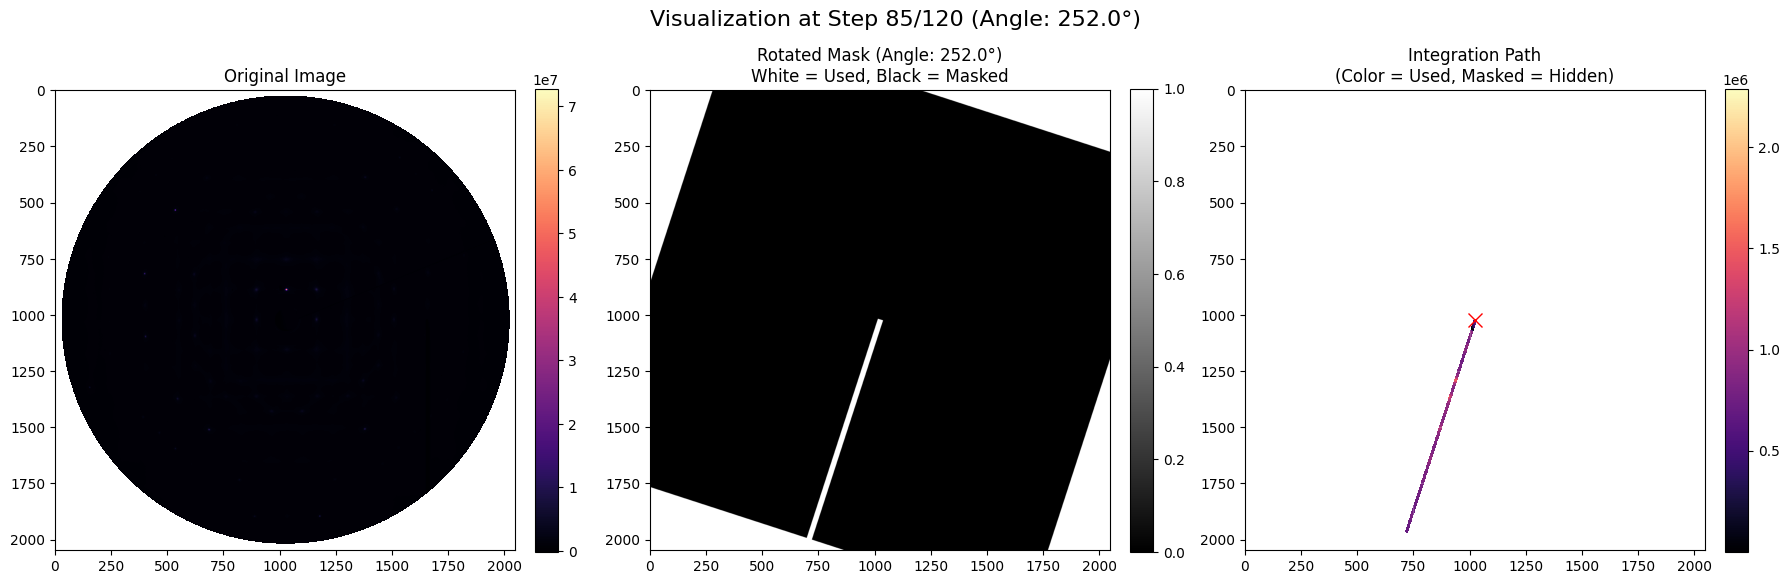


Processing angle 86/120: 255.000 degrees

Processing angle 87/120: 258.000 degrees

Processing angle 88/120: 261.000 degrees

Processing angle 89/120: 264.000 degrees

Processing angle 90/120: 267.000 degrees

Processing angle 91/120: 270.000 degrees

Processing angle 92/120: 273.000 degrees

Processing angle 93/120: 276.000 degrees

Processing angle 94/120: 279.000 degrees

Processing angle 95/120: 282.000 degrees

Processing angle 96/120: 285.000 degrees
Completed 96/120 integrations (80.0%)

Processing angle 97/120: 288.000 degrees


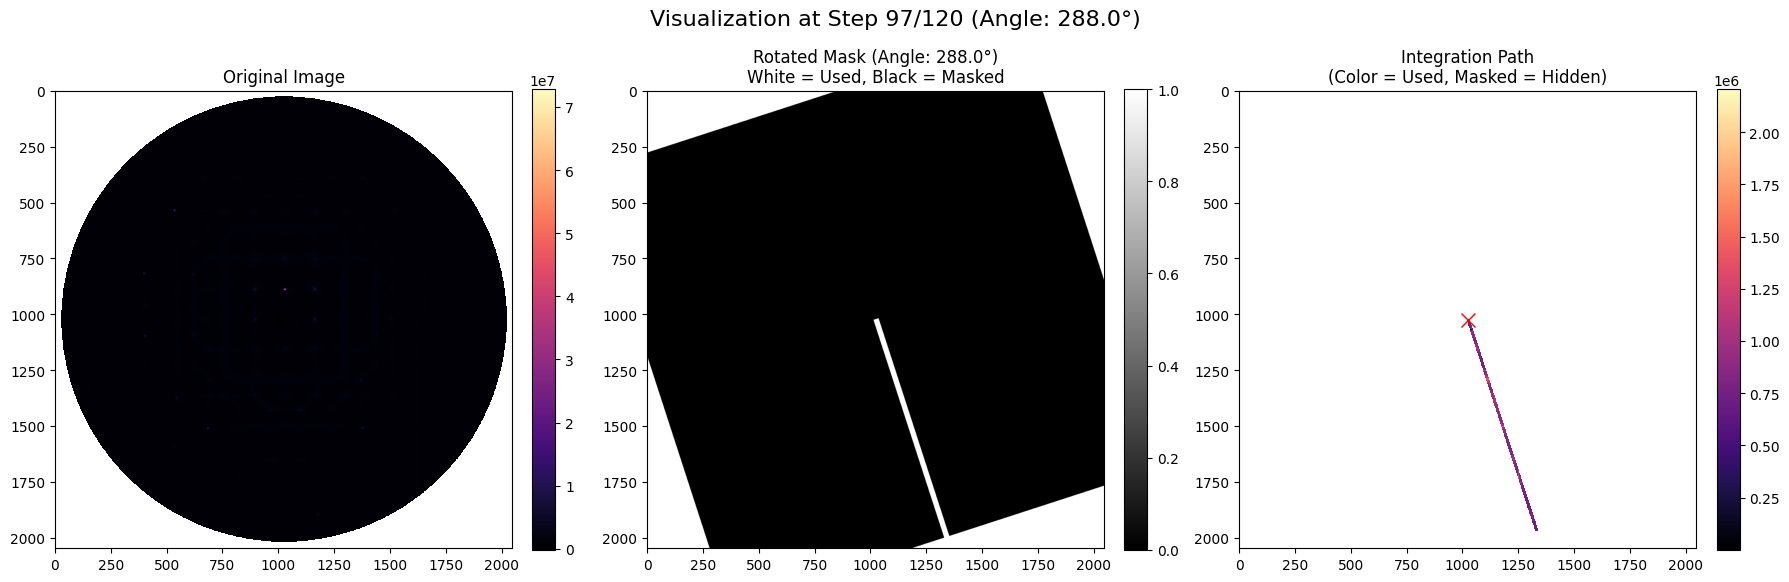


Processing angle 98/120: 291.000 degrees

Processing angle 99/120: 294.000 degrees

Processing angle 100/120: 297.000 degrees

Processing angle 101/120: 300.000 degrees

Processing angle 102/120: 303.000 degrees

Processing angle 103/120: 306.000 degrees

Processing angle 104/120: 309.000 degrees

Processing angle 105/120: 312.000 degrees

Processing angle 106/120: 315.000 degrees

Processing angle 107/120: 318.000 degrees

Processing angle 108/120: 321.000 degrees
Completed 108/120 integrations (90.0%)

Processing angle 109/120: 324.000 degrees


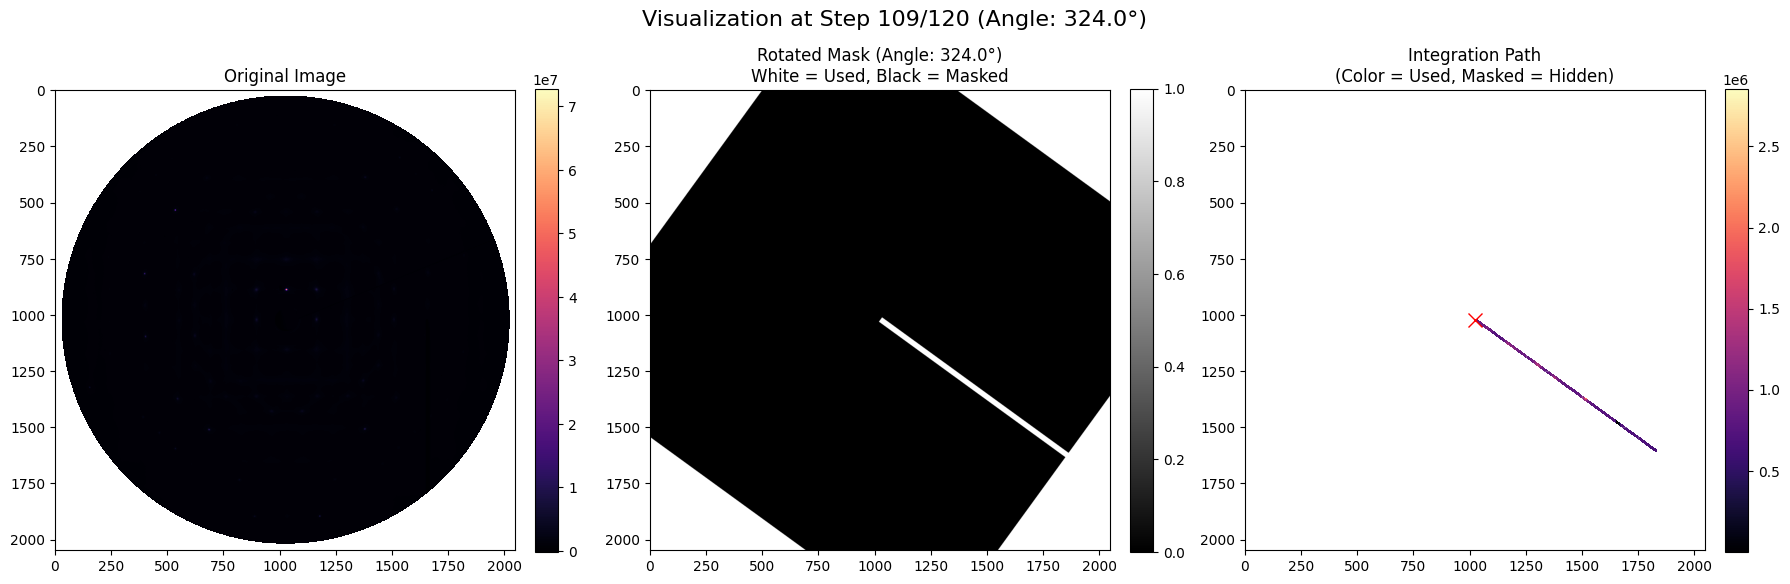


Processing angle 110/120: 327.000 degrees

Processing angle 111/120: 330.000 degrees

Processing angle 112/120: 333.000 degrees

Processing angle 113/120: 336.000 degrees

Processing angle 114/120: 339.000 degrees

Processing angle 115/120: 342.000 degrees

Processing angle 116/120: 345.000 degrees

Processing angle 117/120: 348.000 degrees

Processing angle 118/120: 351.000 degrees

Processing angle 119/120: 354.000 degrees

Processing angle 120/120: 357.000 degrees
Completed 120/120 integrations (100.0%)


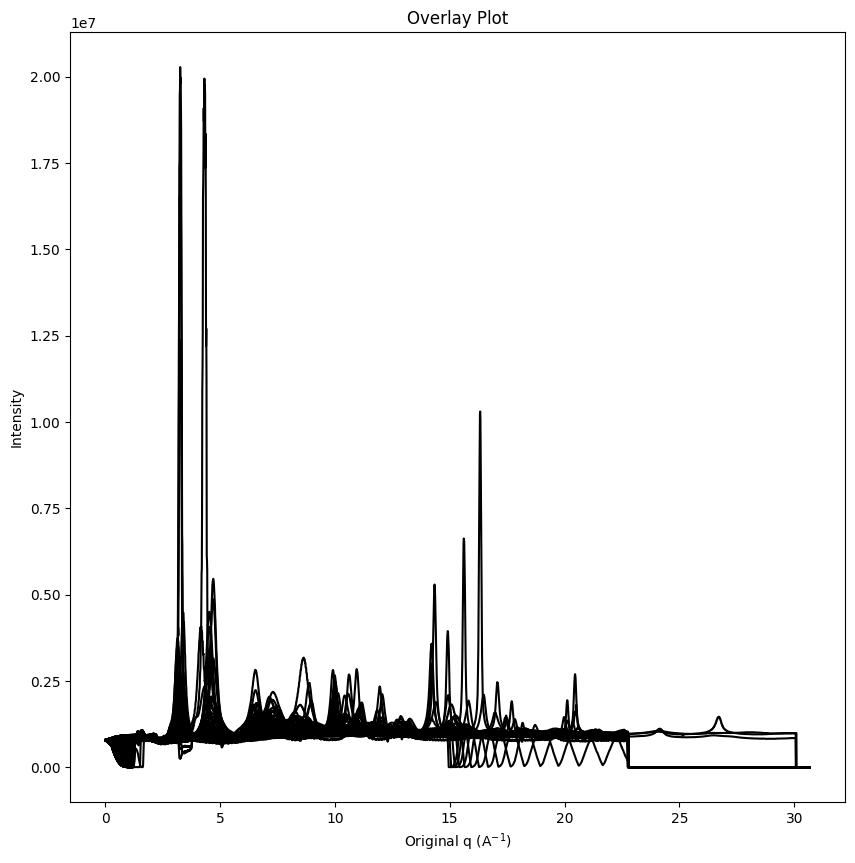

In [16]:
q, cryst_C_GST_Si_TM_mask_fill = sim.rotate_and_integrate_mask_printout(tm_circle_filled_sc, 3, .41794313, 1.22224e-11, resolution = 3000, mask = mask_12, intermediate_steps = 10)

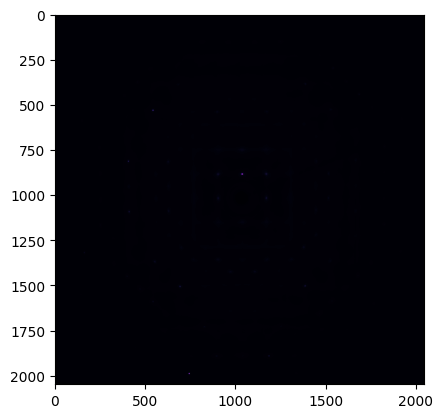

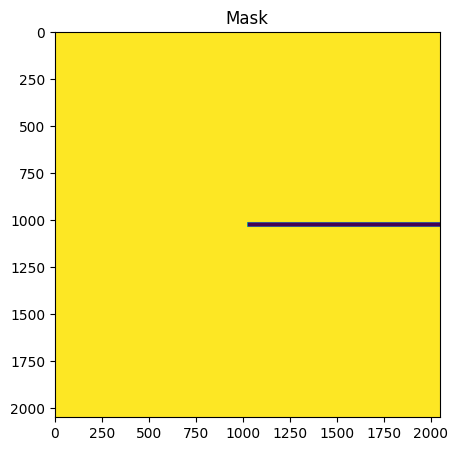

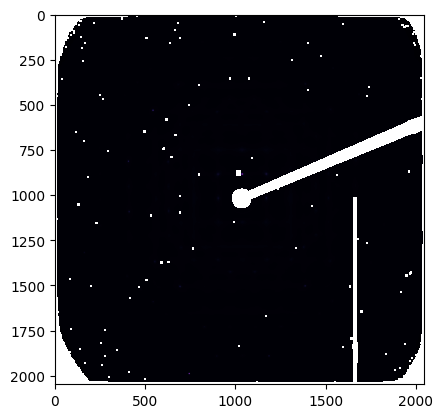

In [17]:
tm_masksc_path = r'C:\Users\kelleymarisa\UFL Dropbox\Marisa Kelley\DNA&MDKShare\copy_data_isodat\perkin\masks\tm_mask_sc.npy'
tm_mask_sc = np.load(tm_masksc_path)
tm_inverted_mask_sc = 1 - tm_mask_sc
plt.imshow(tm_inverted_mask_sc, cmap = 'magma')

tm_cryst_C_GST_Si = r'C:\Users\kelleymarisa\UFL Dropbox\Marisa Kelley\DNA&MDKShare\copy_data_isodat\perkin\da_2_cryst_C_GST_Si-00002\da_2_cryst_C_GST_Si-00002.tiff'
tm_cryst_C_GST_Si_image = imread(tm_cryst_C_GST_Si)
plt.imshow(tm_cryst_C_GST_Si_image, cmap = 'magma')
plt.show()

#create integration mask
mask_12 = sim.create_mask_for_tiff(tm_cryst_C_GST_Si, 12)

tm_mask_with_nan = tm_inverted_mask_sc.astype(float)
tm_mask_with_nan[tm_inverted_mask_sc == 0] = np.nan
plt.imshow(tm_mask_with_nan, cmap = 'magma')

tm_combined_image_sc = tm_cryst_C_GST_Si_image + tm_mask_with_nan
plt.imshow(tm_combined_image_sc, cmap = 'magma')
plt.show() 

Found NaN values in original image, replacing with 0
Cleaned image:
Shape: (2048, 2048)
Min value: -158509.0
Max value: 89801305.0
Number of non-zero pixels: 3995593

Shifted image:
Shape: (2048, 2048)
Min value: -158509.0
Max value: 89801305.0
Number of non-zero pixels: 3994866


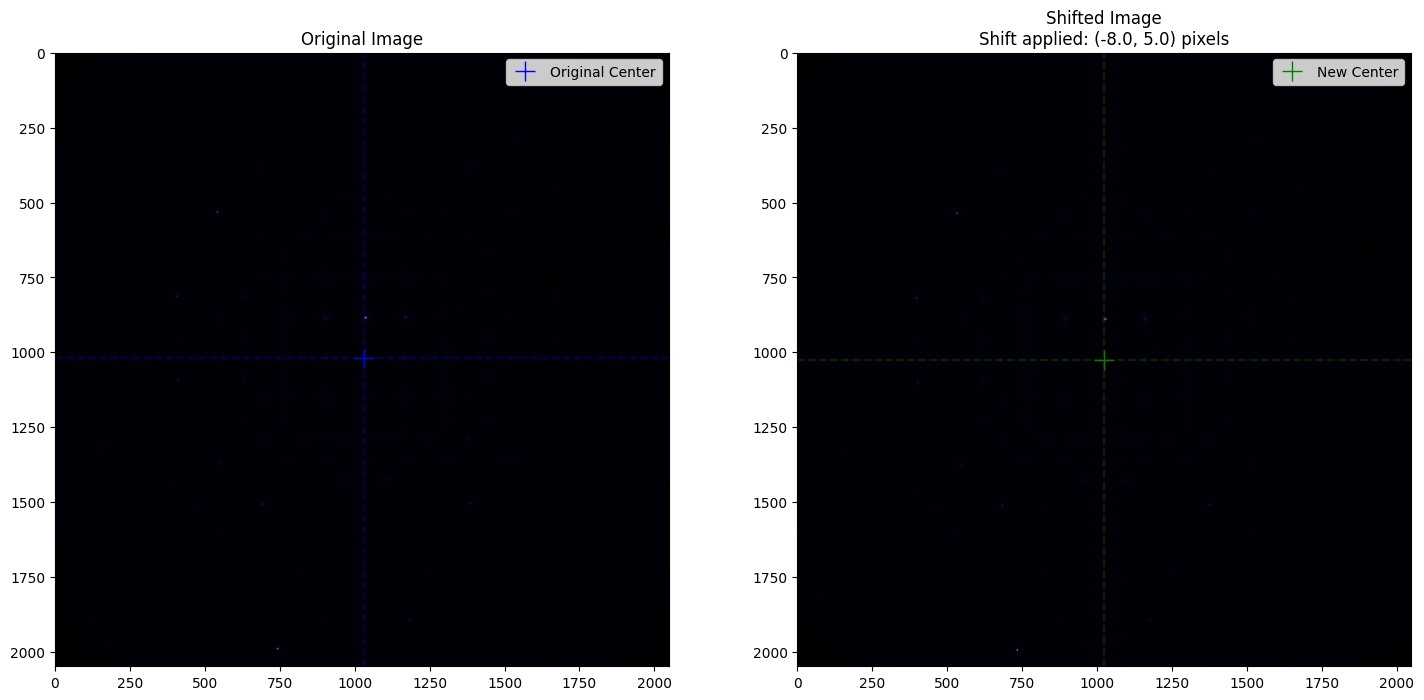

Shift applied: dx=-8.0, dy=5.0 pixels
(2048, 2048)


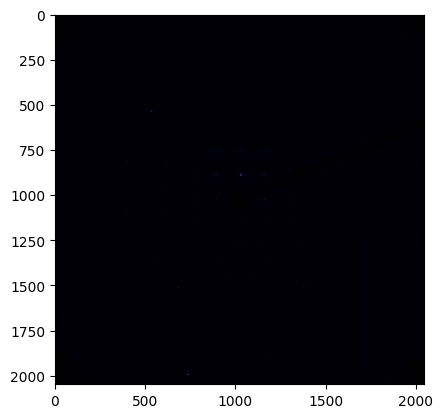

In [18]:
# Define current beam center
current_center = (1032, 1019)  
# Apply the shift
tm_shifted_image_sc, shift_applied_sc = sim.center_shift_image(image=tm_combined_image_sc, current_center=current_center, target_center=(1024, 1024))
print(tm_combined_image_sc.shape)
plt.imshow(tm_shifted_image_sc, cmap = 'magma')
plt.show()

(2048, 2048)


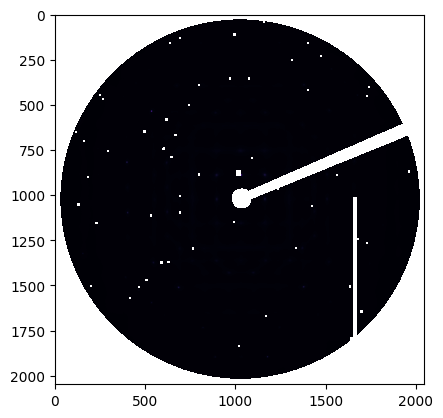

(2048, 2048)


In [19]:
print(tm_shifted_image_sc.shape)
tm_shifted_image_masked_sc = tm_shifted_image_sc + + tm_mask_with_nan
tm_circle_sc = sim.mask_circle_nan_edge(tm_shifted_image_masked_sc, radius = 1000, center = (1024, 1024))
plt.imshow(tm_circle_sc, cmap = 'magma')
plt.show()
print(tm_circle_sc.shape)

(2048, 2048)


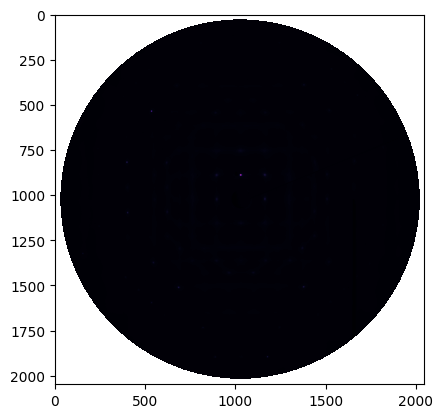

(2048, 2048)


In [20]:
print(tm_shifted_image.shape)
tm_shifted_image_masked_sc = tm_shifted_image_sc + + tm_mask_with_nan
tm_circle_filled_sc = sim.fill_nan_with_neighbor_mean_circle(tm_shifted_image_masked_sc, radius = 1000, center = (1024, 1024))
plt.imshow(tm_circle_filled_sc, cmap = 'magma')
plt.show()
print(tm_circle_filled_sc.shape)

NMF & HAC on centered data in transmission mode

mask rotated data:

The beta-divergence is:  8623512000.0 %
 The final number of components used were 18 

Components shape: (1000, 17)


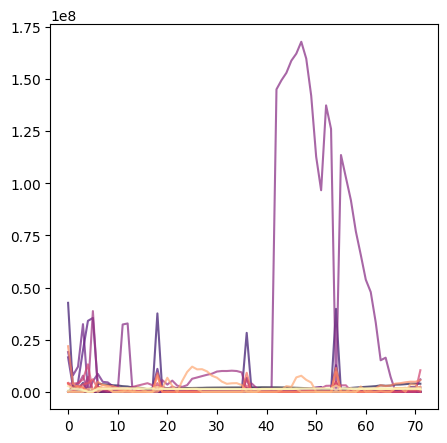

In [21]:
# Run NMF & HAC separately
# Mask rotated Si02 NMF
weights_SiO2mask, components_SiO2mask, beta_SiO2mask = iso.Run_NMF(cryst_C_GST_SiO2_TM_mask, init=None, solver='cd', beta_loss='frobenius', itear=3000, show=True)
print(f"Components shape: {components_SiO2mask.shape}")

The beta-divergence is:  10328152000.0 %
 The final number of components used were 17 

Components shape: (1000, 16)


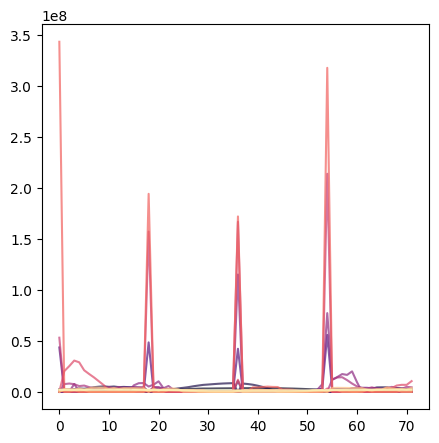

In [22]:
# Run NMF & HAC separately
# Mask rotated Si NMF
weights_SiO2_mask_fill, components_SiO2_mask_fill, beta_SiO2_mask_fill = iso.Run_NMF(cryst_C_GST_SiO2_TM_mask_fill, init=None, solver='cd', beta_loss='frobenius', itear=3000, show=True)
print(f"Components shape: {components_SiO2_mask_fill.shape}")

The beta-divergence is:  10233539000.0 %
 The final number of components used were 96 

Components shape: (3000, 95)


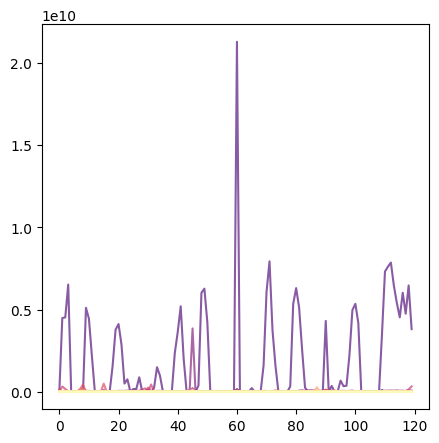

In [23]:
# Run NMF & HAC separately
# Mask rotated Si NMF
weights_Si_mask, components_Si_mask, beta_Si_mask = iso.Run_NMF(cryst_C_GST_Si_TM_mask, init=None, solver='cd', beta_loss='frobenius', itear=3000, show=True)
print(f"Components shape: {components_Si_mask.shape}")

The beta-divergence is:  8965717000.0 %
 The final number of components used were 48 

Components shape: (3000, 47)


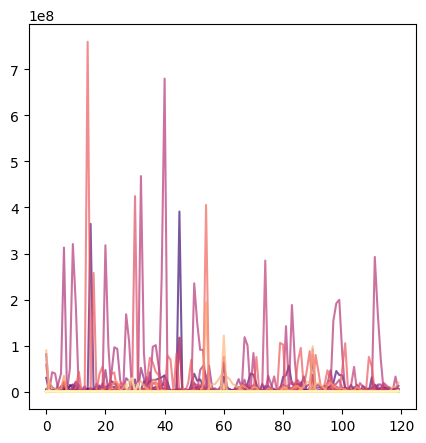

In [24]:
# Run NMF & HAC separately
# Mask rotated Si NMF
weights_Si_mask_fill, components_Si_mask_fill, beta_Si_mask_fill = iso.Run_NMF(cryst_C_GST_Si_TM_mask_fill, init=None, solver='cd', beta_loss='frobenius', itear=3000, show=True)
print(f"Components shape: {components_Si_mask_fill.shape}")

Starting NMF algorithm with the following parameters:

Max components: 20
Max iterations: 600
Init: random
Solver: cd
Tolerance: 0.0001
Patience: 5
Random
Random initializers completed
Continuing with best run parameters that are init: nndsvdar, solver: cd, tol: 1e-05
Run with 1 components has been completed
Run with 2 components has been completed
Run with 3 components has been completed
Run with 4 components has been completed
Run with 5 components has been completed
Run with 6 components has been completed
Run with 7 components has been completed
Run with 8 components has been completed
Run with 9 components has been completed
Run with 10 components has been completed
Run with 11 components has been completed
Run with 12 components has been completed
Run with 13 components has been completed
Run with 14 components has been completed
Run with 15 components has been completed
Run with 16 components has been completed
Run with 17 components has been completed
Run with 18 components has

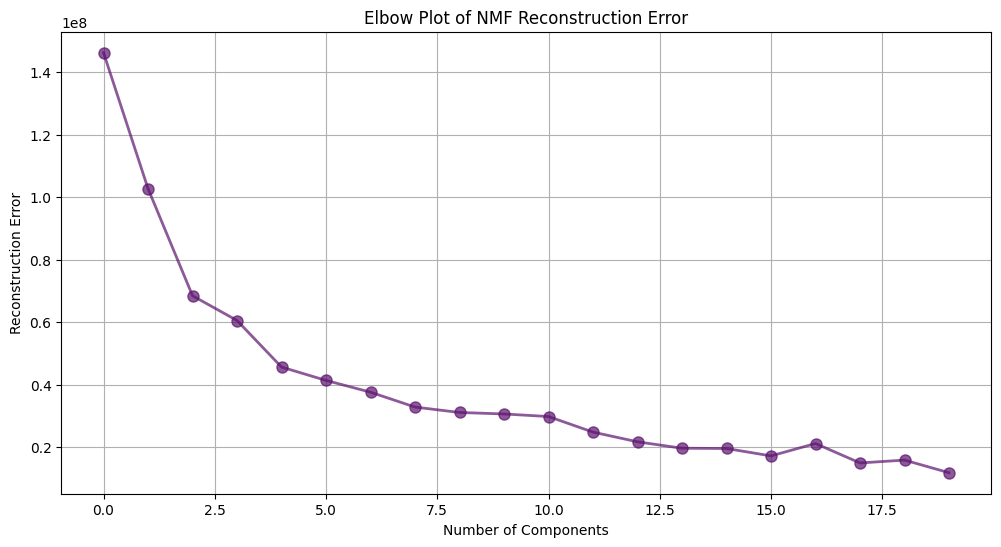

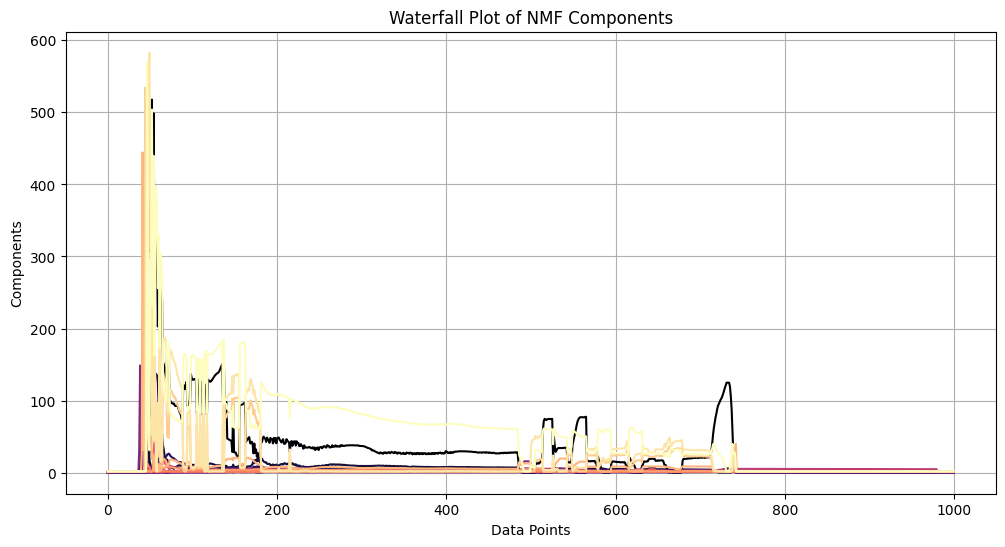

The best number of components is 20


In [29]:
best_W_SiO2_mask, best_H_SiO2_mask, best_reconstruction_err_SiO2_mask = iso.run_sklearn_nmf(cryst_C_GST_SiO2_TM_mask, max_components = 20, max_iter = 600, init = 'random', solver = 'cd', tol = 1e-4, patience = 5, randomize_init = True)

Starting NMF algorithm with the following parameters:

Max components: 20
Max iterations: 600
Init: random
Solver: cd
Tolerance: 0.0001
Patience: 5
Random
Random initializers completed
Continuing with best run parameters that are init: nndsvda, solver: mu, tol: 0.0001
Run with 1 components has been completed
Run with 2 components has been completed
Run with 3 components has been completed
Run with 4 components has been completed
Run with 5 components has been completed
Run with 6 components has been completed
Run with 7 components has been completed
Run with 8 components has been completed
Run with 9 components has been completed
Run with 10 components has been completed
Run with 11 components has been completed
Run with 12 components has been completed
Run with 13 components has been completed
Run with 14 components has been completed
Run with 15 components has been completed
Run with 16 components has been completed
Run with 17 components has been completed
Run with 18 components has

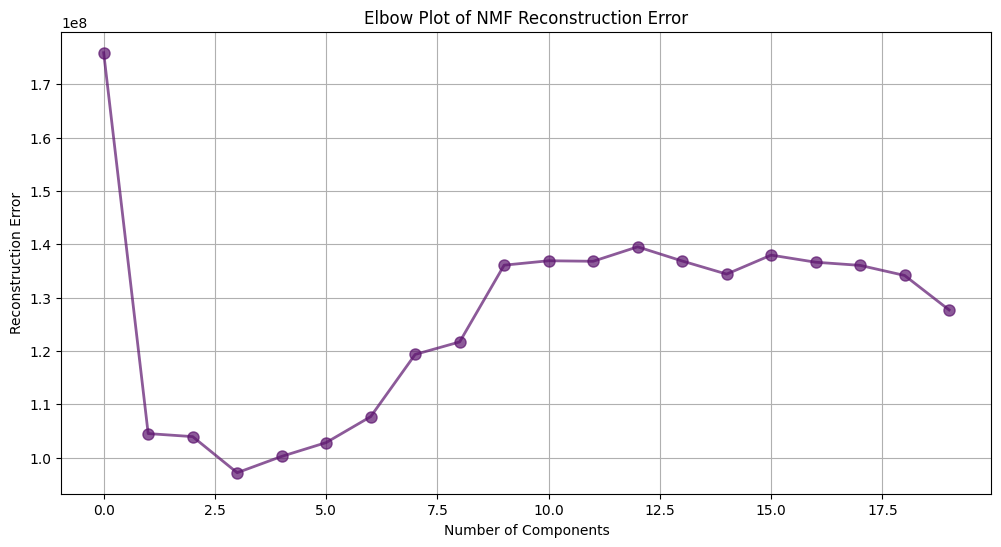

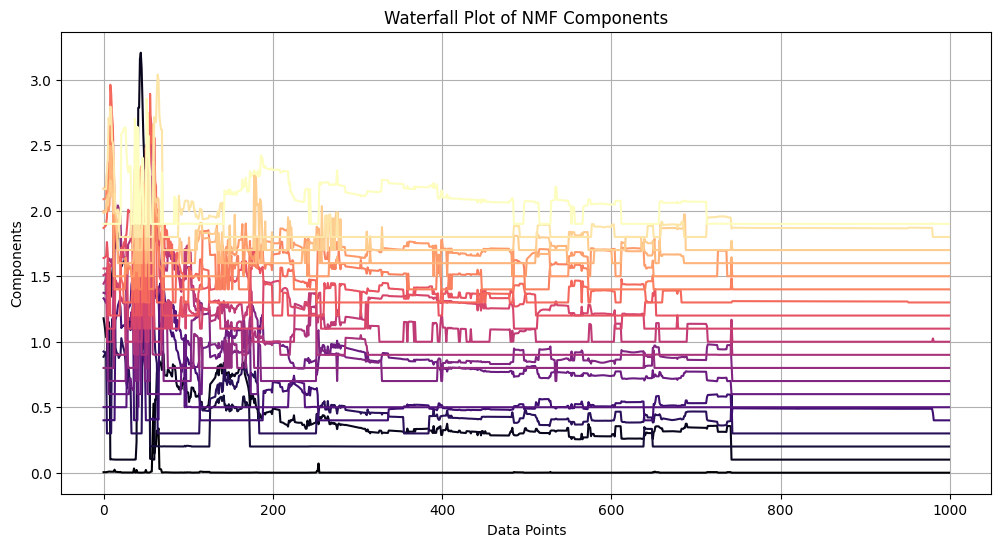

The best number of components is 20


In [30]:
best_W_SiO2_mask_fill, best_H_SiO2_mask_fill, best_reconstruction_err_SiO2_mask_fill = iso.run_sklearn_nmf(cryst_C_GST_SiO2_TM_mask_fill, max_components = 20, max_iter = 600, init = 'random', solver = 'cd', tol = 1e-4, patience = 5, randomize_init = True)

Starting NMF algorithm with the following parameters:

Max components: 20
Max iterations: 600
Init: random
Solver: cd
Tolerance: 0.0001
Patience: 5
Random
Random initializers completed
Continuing with best run parameters that are init: random, solver: cd, tol: 1e-05
Run with 1 components has been completed
Run with 2 components has been completed
Run with 3 components has been completed
Run with 4 components has been completed
Run with 5 components has been completed
Run with 6 components has been completed
Run with 7 components has been completed
Run with 8 components has been completed
Run with 9 components has been completed
Run with 10 components has been completed
Run with 11 components has been completed
Run with 12 components has been completed
Run with 13 components has been completed
Run with 14 components has been completed
Run with 15 components has been completed
Run with 16 components has been completed
Run with 17 components has been completed
Run with 18 components has b

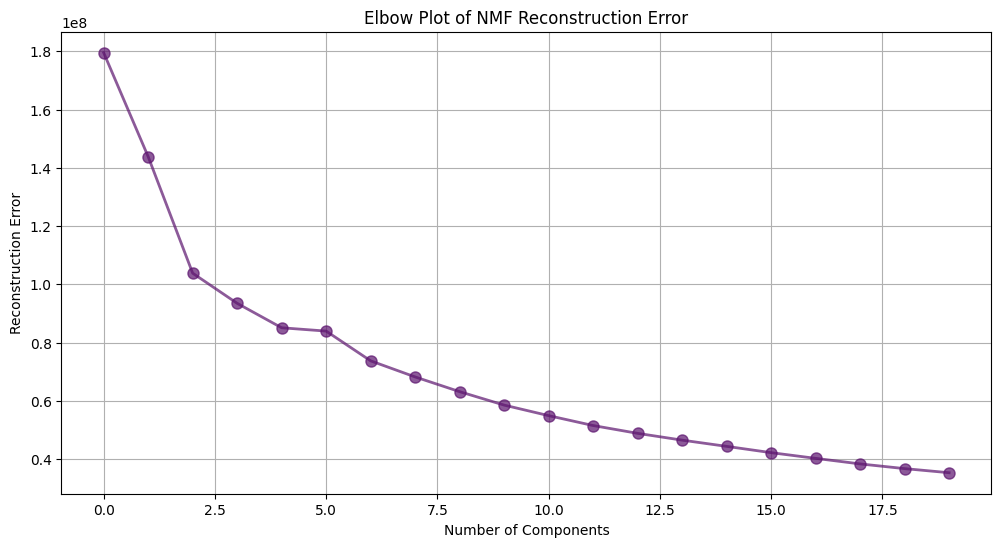

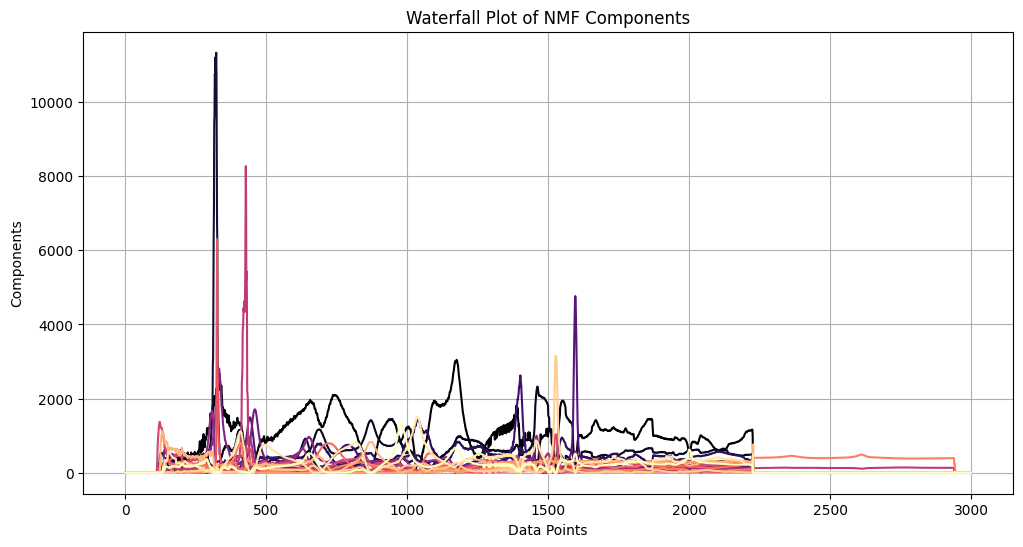

The best number of components is 20


In [31]:
best_W_Si_mask, best_H_Si_mask, best_reconstruction_err_Si_mask = iso.run_sklearn_nmf(cryst_C_GST_Si_TM_mask, max_components = 20, max_iter = 600, init = 'random', solver = 'cd', tol = 1e-4, patience = 5, randomize_init = True)

Starting NMF algorithm with the following parameters:

Max components: 20
Max iterations: 600
Init: random
Solver: cd
Tolerance: 0.0001
Patience: 5
Random
Random initializers completed
Continuing with best run parameters that are init: nndsvd, solver: mu, tol: 0.0001
Run with 1 components has been completed
Run with 2 components has been completed
Run with 3 components has been completed
Run with 4 components has been completed
Run with 5 components has been completed
Run with 6 components has been completed
Run with 7 components has been completed
Run with 8 components has been completed
Run with 9 components has been completed
Run with 10 components has been completed
Run with 11 components has been completed
Run with 12 components has been completed
Run with 13 components has been completed
Run with 14 components has been completed
Run with 15 components has been completed
Run with 16 components has been completed
Run with 17 components has been completed
Run with 18 components has 

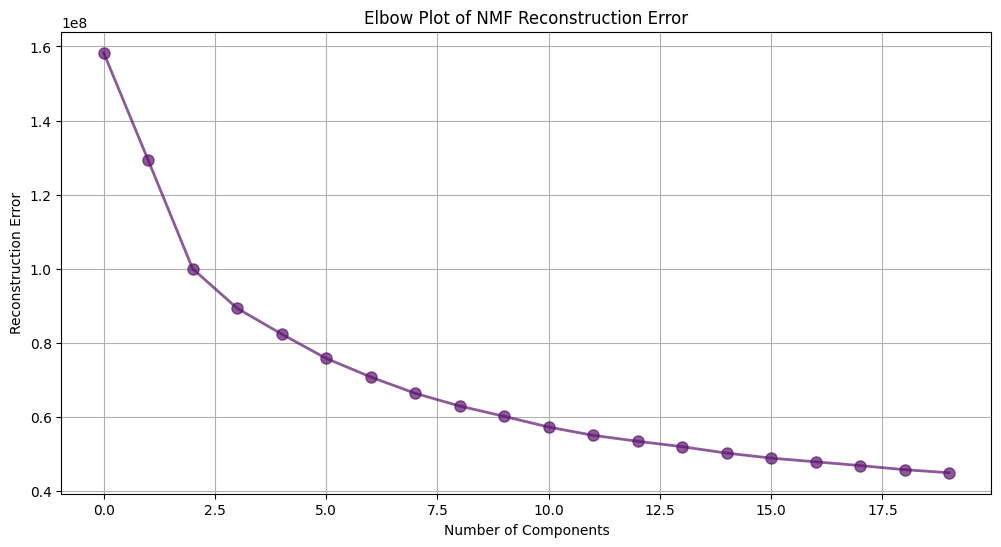

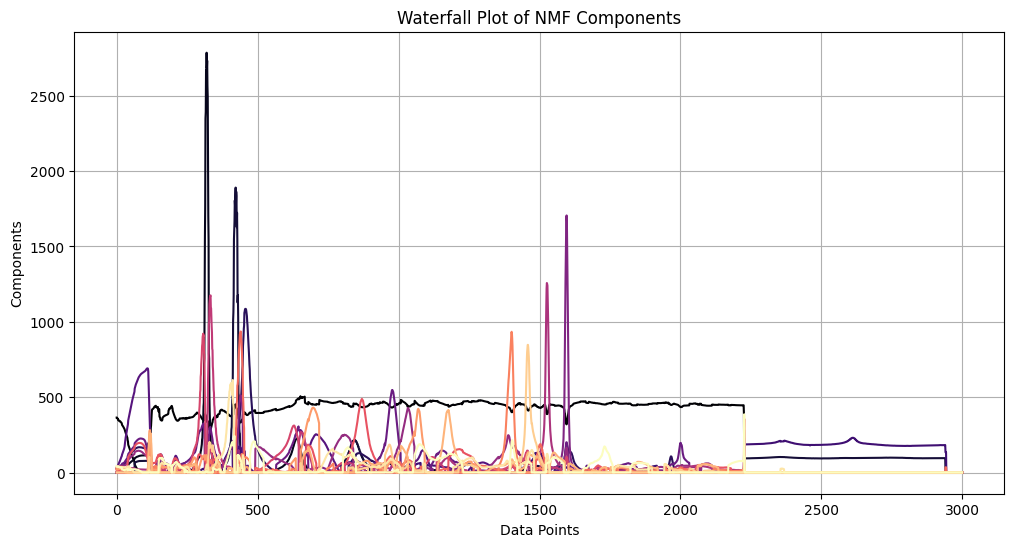

The best number of components is 20


In [32]:
best_W_Si_mask_fill, best_H_Si_mask_fill, best_reconstruction_err_Si_mask_fill = iso.run_sklearn_nmf(cryst_C_GST_Si_TM_mask_fill, max_components = 20, max_iter = 600, init = 'random', solver = 'cd', tol = 1e-4, patience = 5, randomize_init = True)